In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!gdown --id 1dTE9xqu5Sae3FIa8TIWJyvQ6FOv_HrRz
!gdown --id 1hALkGO30T6V5mx1CjSAmp-UsK5WS-YAO

train=pd.read_csv('public-train.csv',delimiter='|')
test=pd.read_csv('public-test.csv',delimiter='|')

Downloading...
From: https://drive.google.com/uc?id=1dTE9xqu5Sae3FIa8TIWJyvQ6FOv_HrRz
To: /content/public-test.csv
100% 682k/682k [00:00<00:00, 10.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hALkGO30T6V5mx1CjSAmp-UsK5WS-YAO
To: /content/public-train.csv
4.65MB [00:00, 21.2MB/s]


##Check duls 

note ngubah laxile karena laxile harusnya gak ada huruf depannya coba cari di google

In [ ]:
# unique di columns lexile_measure 
#  [nan 'HL740L' '760L' '880L' '710L' '930' 'HL720L' '690' 'HL590L' 'HL700L'
#  '990L' 'AD460L' '740L' '950L' '770L' '790L' 'HL750L' 'GN370L' '860L'
#  'GN400L' '730L' 'AD300L' '850L' '1170L' '930L' 'AD510L' 'HL710L' 'AD380L'
#  'HL780L' 'NP' '570L' '690L' '980L' 'HL730L' 'AD600L' '640L' '230L' '130L'
#  '800L' '840L' 'HL600L' '970' '940L' 'AD490L' '920L' 'HL580L' '1010L'
#  '630L' 'HL680L' 'HL790L' '710' 'AD450L' '960L' '360L' '1100L' 'AD650L'
#  'AD550L' 'AD660L' '720L' '670'] 
 

# unique di columns grade_level 
#  [nan '9 - 12' '3 - 7' '7 - 9' '10 - 12' '10 and up'
#  'Preschool - Kindergarten' '7 - 12' '5 - 6' 'Kindergarten - 3' '6 - 9'
#  '5 - 9' '4 - 7' 'Preschool - 1' 'Preschool - 3' '8 - 12' '8 - 9'
#  '8 and up' '9 and up' '1 - 2' 'Preschool - 2' '4 - 6' '7 and up' '5 - 8'
#  '5 - 7'] 

 
# unique di columns reading_age 
#  [nan '14 years and up' '8 - 12 years' '12 - 17 years' '13 - 17 years'
#  '15 years and up' '12 - 15 years' '18 years and up' '13 years and up'
#  '3 - 5 years' '12 - 18 years' '4 - 8 years' '10 - 13 years' '5 - 8 years'
#  '11 years and up' '10 - 14 years' '14 - 17 years' '12 years and up'
#  '9 - 12 years' '4 - 6 years' '10 years' '2 - 5 years' '6 - 11 years'
#  '3 - 6 years' '4 - 7 years' '10 years and up' '8 - 11 years'
#  '13 - 18 years' '16 years and up' '3 - 8 years' '3 - 7 years'
#  '10 - 12 years'] 

In [ ]:
eksplor=train[['reading_age','lexile_measure','grade_level']]
eksplor[eksplor.grade_level=='Preschool - Kindergarten']

reading_age lexile_measure               grade_level
332  3 - 5 years            NaN  Preschool - Kindergarten
998  3 - 5 years         AD300L  Preschool - Kindergarten

In [ ]:
train.head(10)

author_id  ...    price
0  author2106  ...      NaN
1  author1018  ...      NaN
2  author1087  ...      NaN
3  author1295  ...      NaN
4  author2622  ...      NaN
5  author2076  ...      NaN
6  author1914  ...      NaN
7  author1818  ...      NaN
8  author1478  ...      NaN
9  author0932  ...  98172.0

[10 rows x 39 columns]

In [ ]:
train.sample(30)

author_id  ...     price
912   author2643  ...       NaN
2615  author2440  ...       NaN
3419  author0054  ...  201974.0
1494  author0344  ...       NaN
2984  author1929  ...       NaN
3141  author1065  ...       NaN
2690  author1228  ...       NaN
1783  author2538  ...       NaN
1537  author1479  ...  216411.0
1260  author0621  ...       NaN
2453  author2480  ...       NaN
518   author2296  ...       NaN
199   author2430  ...       NaN
3088  author1908  ...       NaN
3335  author1815  ...       NaN
1023  author0039  ...       NaN
2653  author2672  ...       NaN
3049  author0291  ...       NaN
2657  author0735  ...       NaN
289   author2843  ...       NaN
1592  author2411  ...       NaN
451   author2464  ...       NaN
1247  author1707  ...       NaN
1441  author1795  ...       NaN
1649  author1328  ...       NaN
172   author1076  ...       NaN
495   author1690  ...       NaN
1516  author0201  ...       NaN
2612  author2263  ...       NaN
1342  author2448  ...       NaN

[30 rows x 39 columns]

In [ ]:
train.shape

(3550, 39)

## Eksplorasi tipis2

In [ ]:
#Eksplor Rating value
traincp = train.copy()
traincp['rating_value_1'].fillna(0.0,inplace=True)
print(f"Rating Value 1 :\n{traincp['rating_value_1'].unique()}")
print(f"Rating Value 0 :\n{traincp['rating_value_0'].unique()}")

Rating Value 1 :
[0.  4.6 4.5 4.3 3.6 4.7 4.1 4.8 5.  4.4 4.2 3.9 3.8 4.9 4.  3.5 3.7 3.2
 3.4 3.3]
Rating Value 0 :
[3.76 4.48 4.56 4.39 3.93 3.79 3.97 3.91 4.07 4.29 3.96 4.32 4.03 3.92
 4.2  4.89 4.37 4.31 4.28 4.23 4.27 4.02 4.16 4.51 0.   4.11 3.99 3.83
 3.9  3.68 3.51 4.42 4.05 4.46 3.95 4.01 4.   3.81 4.3  4.26 4.1  3.8
 4.25 3.62 3.77 3.82 4.12 3.84 4.14 4.5  4.09 3.69 4.22 3.75 4.06 4.38
 4.18 4.54 5.   3.54 4.21 3.73 4.47 3.67 4.13 4.19 3.89 4.4  4.66 3.65
 4.45 3.61 3.74 4.64 4.24 3.86 4.04 4.49 4.41 4.17 4.44 4.35 4.43  nan
 4.15 3.98 3.59 3.52 4.52 4.6  4.33 4.34 3.58 3.66 3.48 4.36 3.88 3.78
 3.38 4.62 4.58 3.72 4.08 4.68 3.43 3.94 3.45 4.57 3.87 3.7  4.88 3.44
 3.85 4.53 4.61 4.55 3.39 3.42 3.6  3.33 3.71 3.56 3.63 3.26 3.57 3.64
 4.71 3.27 3.25 4.67 3.46 3.17 3.41 4.69 4.59 3.35 4.63 3.55 3.28 4.73
 4.65 4.7  4.78 2.   3.15 3.5  3.49 3.53 4.8  3.21 3.29 3.32 4.76 3.18
 3.13 3.31 3.4  3.03 4.77 3.47 4.72 4.79 4.75 4.86 3.24 4.91 3.3  4.87
 1.   4.81 3.22 3.36]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'rating_value_0 With Respect to Price')

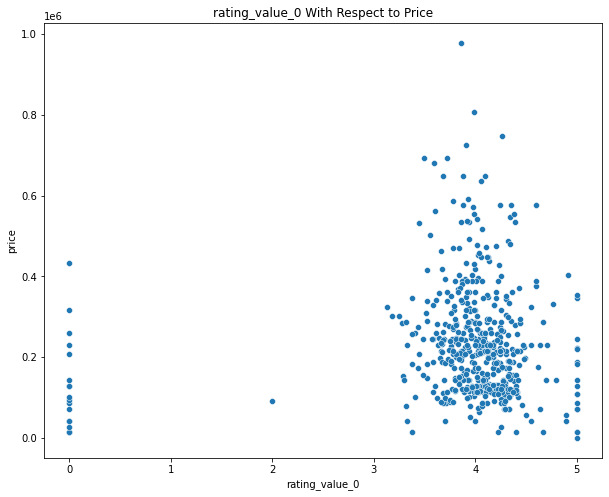

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(traincp["rating_value_0"],traincp["price"])
plt.title("rating_value_0 With Respect to Price")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'rating_value_1 With Respect to Price')

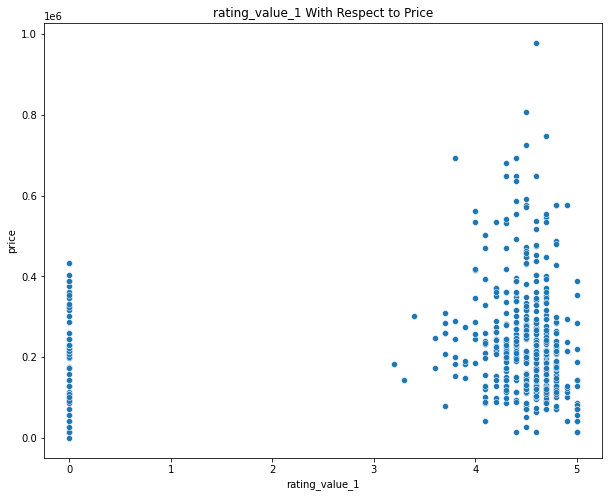

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(traincp["rating_value_1"],traincp["price"])
plt.title("rating_value_1 With Respect to Price")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


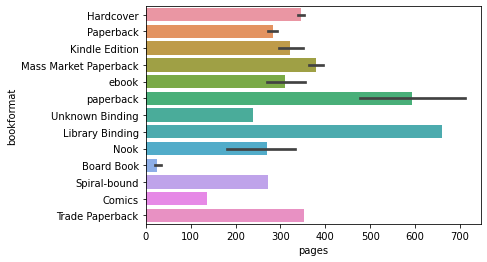

In [ ]:
#Check BookFormat
sns.barplot(traincp["pages"],traincp["bookformat"] )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


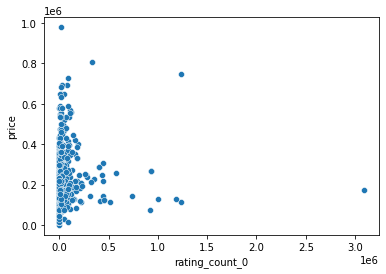

In [ ]:
sns.scatterplot(traincp["rating_count_0"],traincp["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


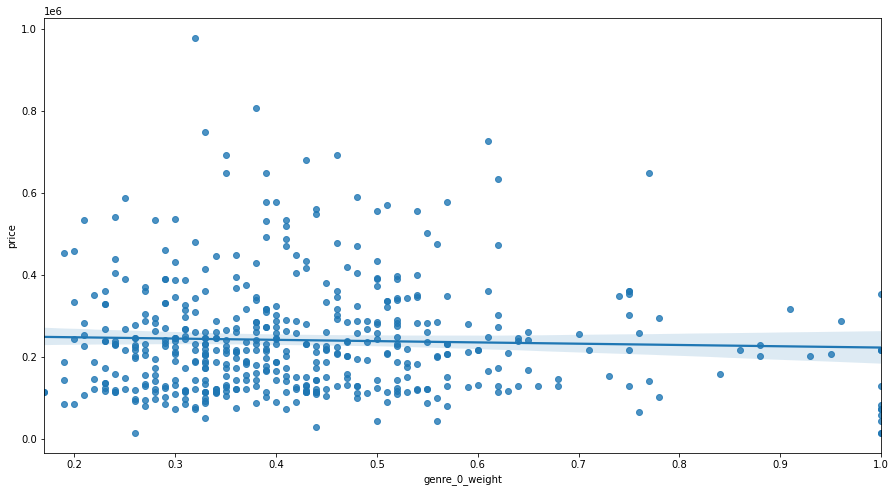

In [ ]:
plt.figure(figsize=(15,8))
ratingValue = traincp[(traincp["price"]  > 0) & (traincp["genre_0_weight"] > 0)]

sns.regplot(ratingValue["genre_0_weight"],ratingValue["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


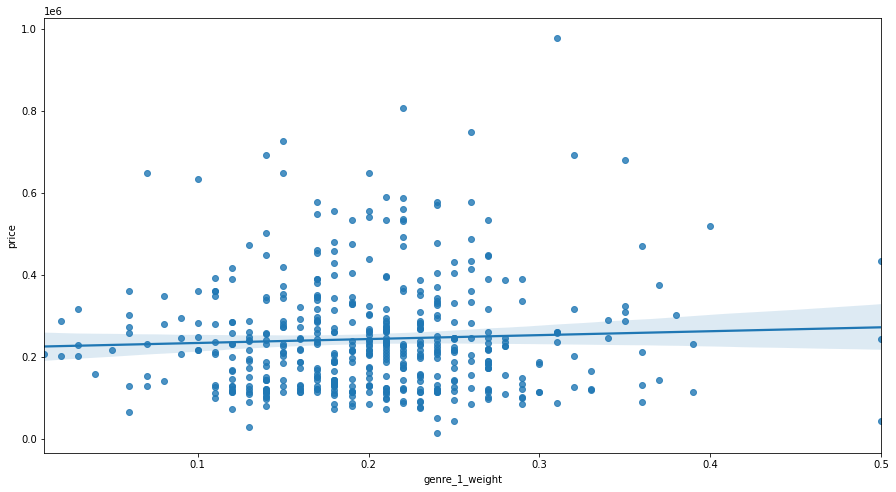

In [ ]:
plt.figure(figsize=(15,8))
ratingValue = traincp[(traincp["price"]  > 0) & (traincp["genre_1_weight"] > 0)]
sns.regplot(ratingValue["genre_1_weight"],ratingValue["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


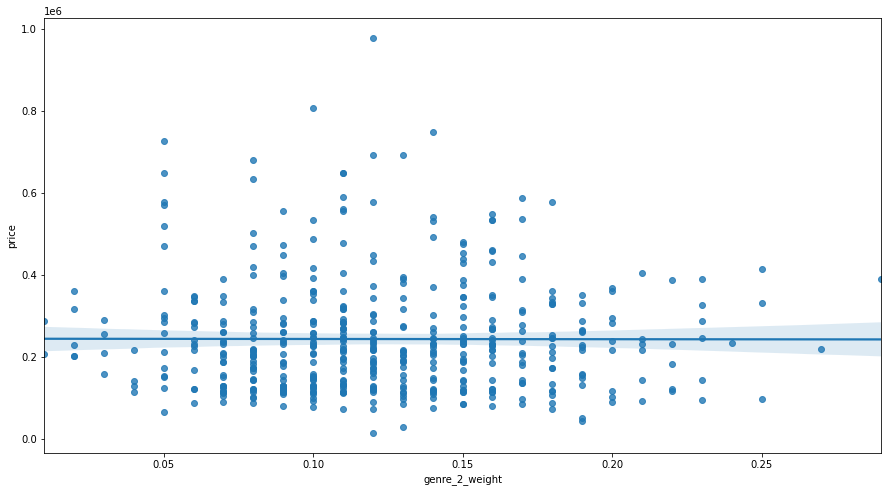

In [ ]:
plt.figure(figsize=(15,8))
ratingValue = traincp[(traincp["price"]  > 0) & (traincp["genre_2_weight"] > 0)]
sns.regplot(ratingValue["genre_2_weight"],ratingValue["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


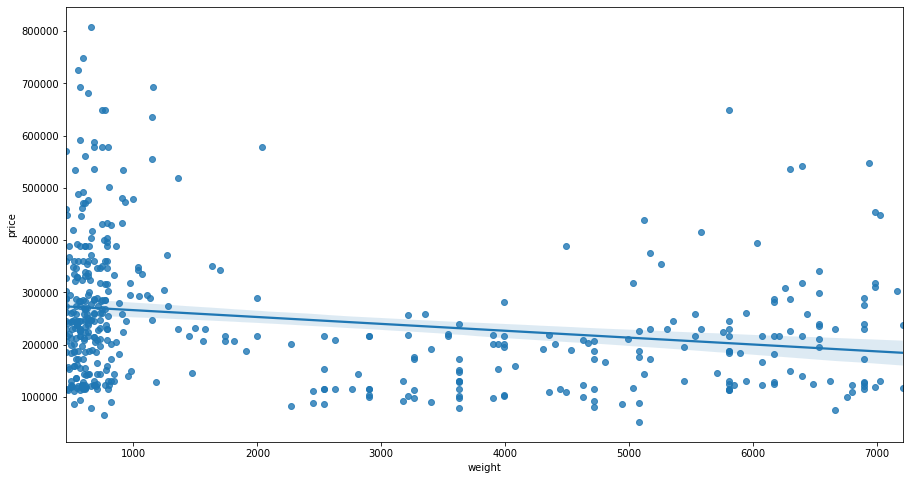

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(traincp["weight"],traincp["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text major ticklabel objects>)

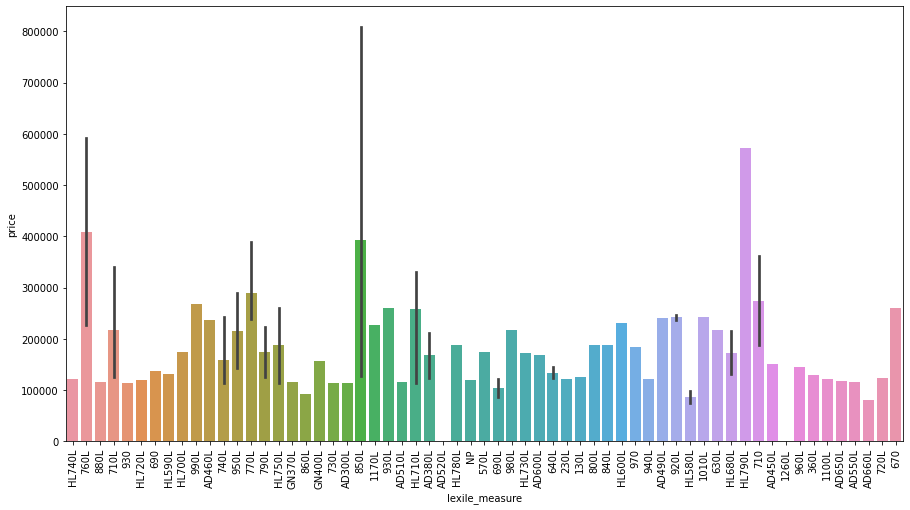

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(traincp["lexile_measure"],traincp["price"])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

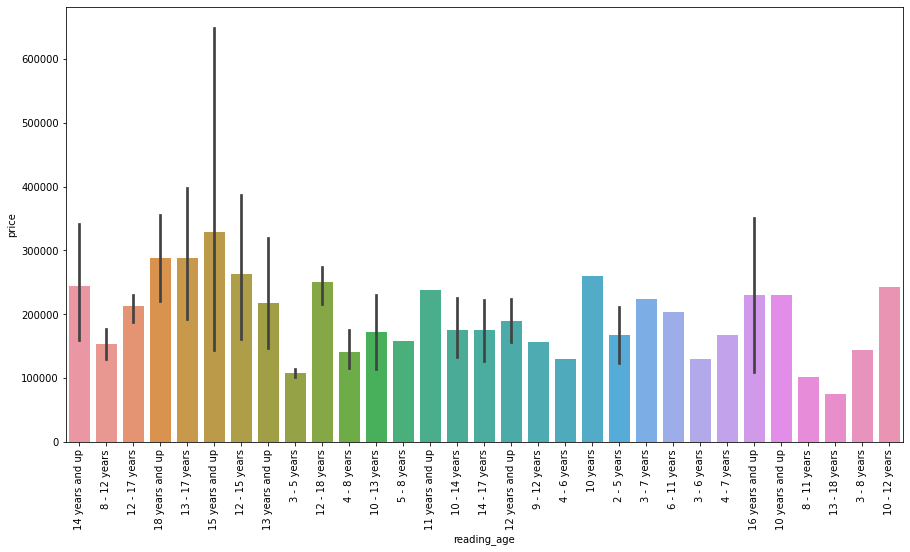

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(traincp["reading_age"],traincp["price"])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

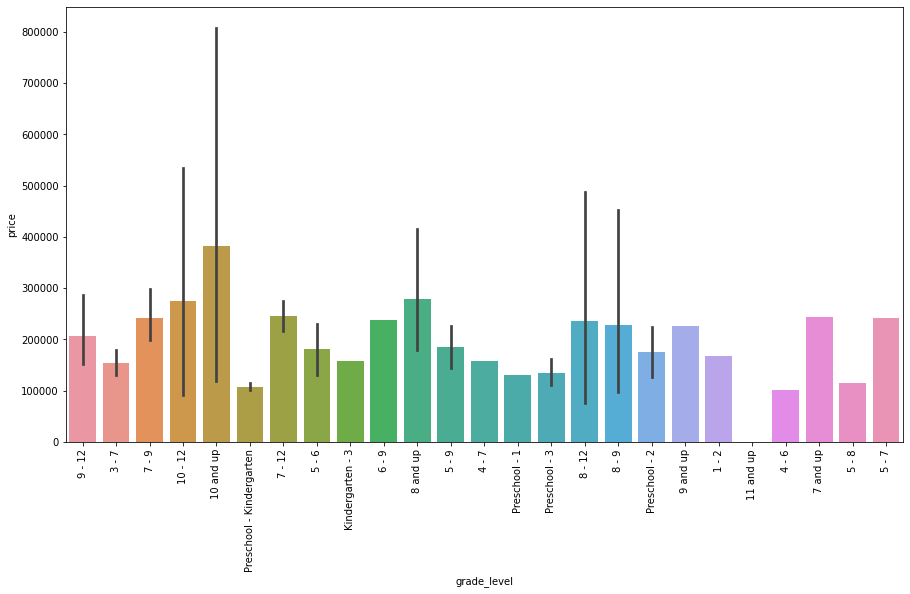

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(traincp["grade_level"],traincp["price"])
plt.xticks(rotation=90)

In [ ]:
traincp

author_id  ... price
0     author2106  ...   NaN
1     author1018  ...   NaN
2     author1087  ...   NaN
3     author1295  ...   NaN
4     author2622  ...   NaN
...          ...  ...   ...
3545  author1144  ...   NaN
3546  author2852  ...   NaN
3547  author1309  ...   NaN
3548  author1816  ...   NaN
3549  author0882  ...   NaN

[3550 rows x 39 columns]

In [ ]:
traincp = traincp[traincp["price"].notna()]
numerics = ["pages","weight","rating_value_0","rating_value_1",
            "rating_count_0","rating_count_1","genre_0_weight",
            "genre_1_weight","genre_2_weight","genre_3_weight",
            "genre_4_weight","genre_5_weight","genre_6_weight",
            "genre_6_weight","genre_7_weight","genre_9_weight",
            "price"]
categorical = ["bookformat","bookedition",]

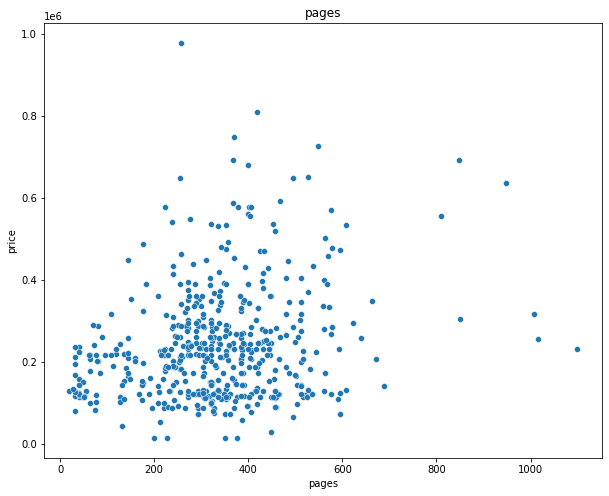

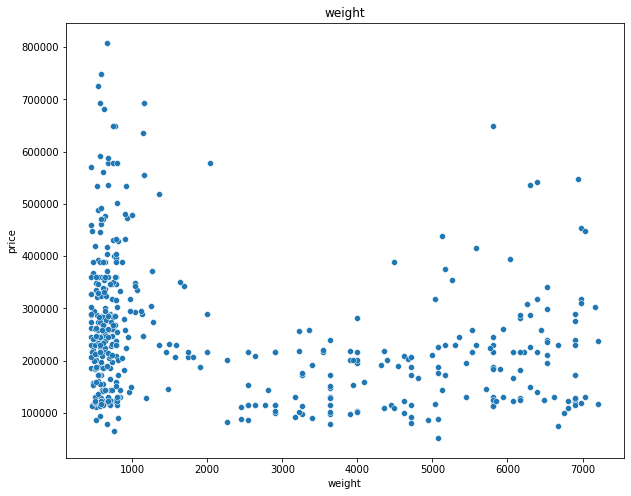

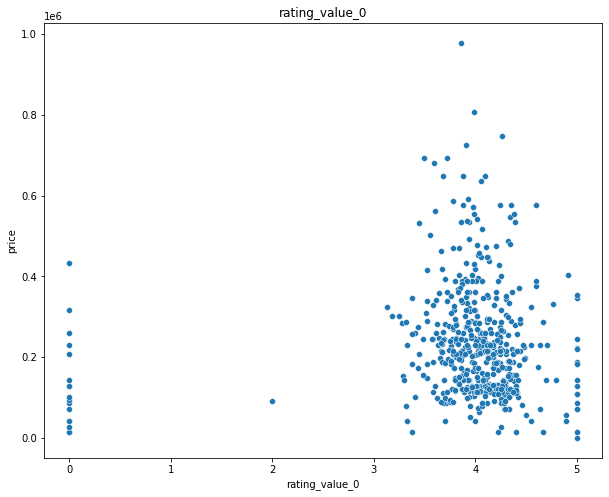

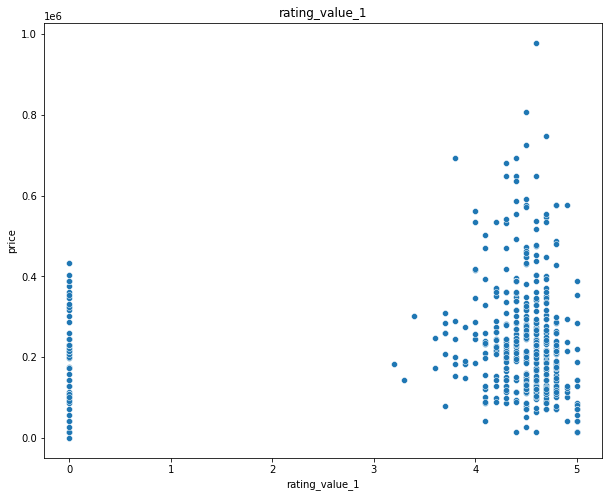

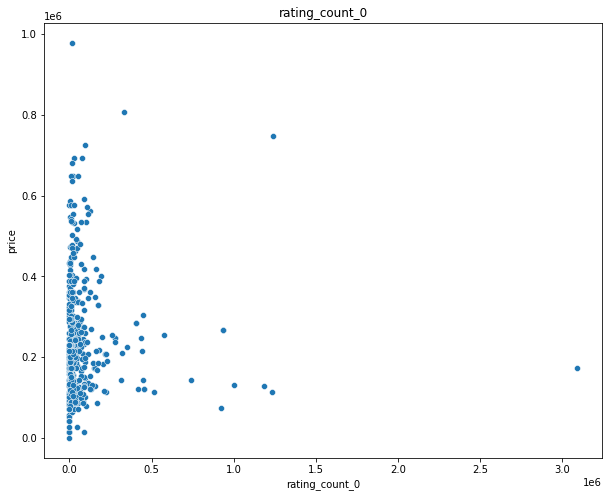

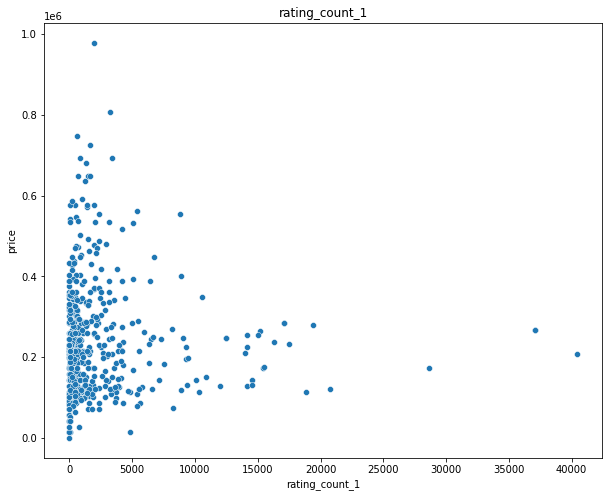

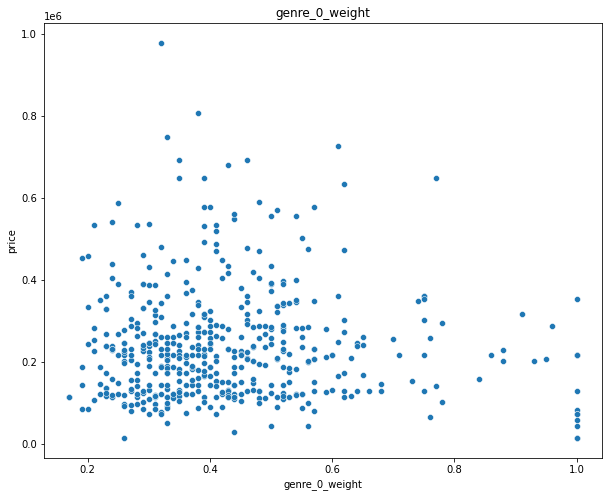

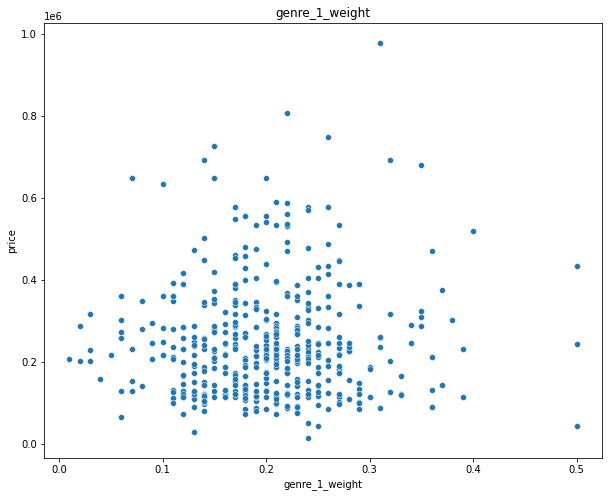

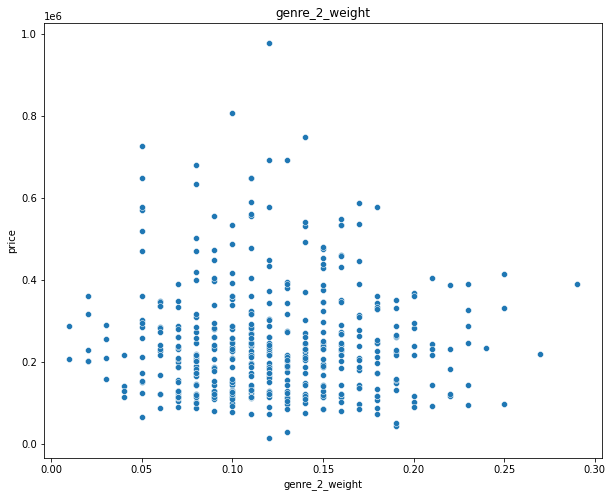

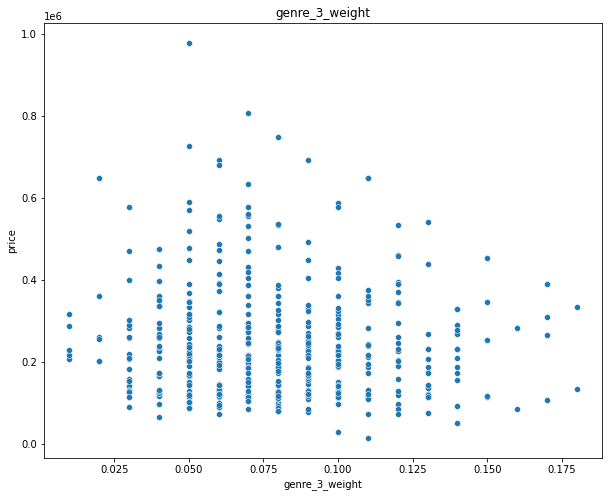

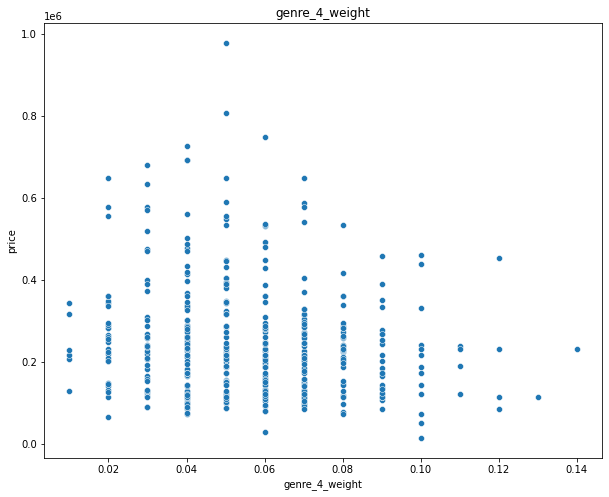

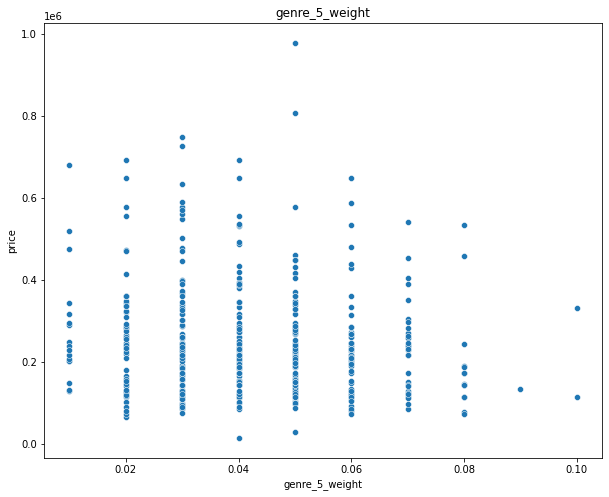

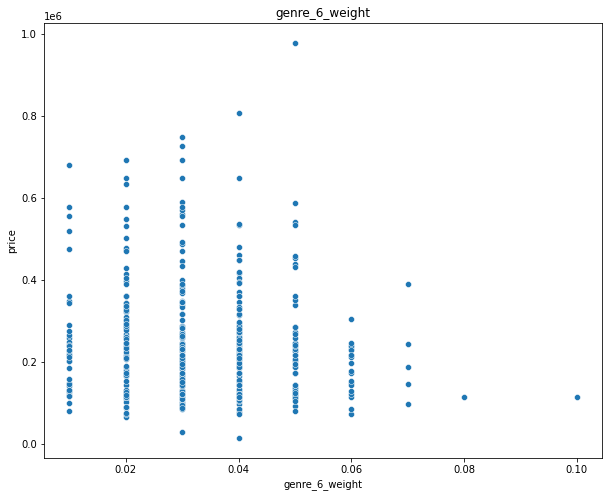

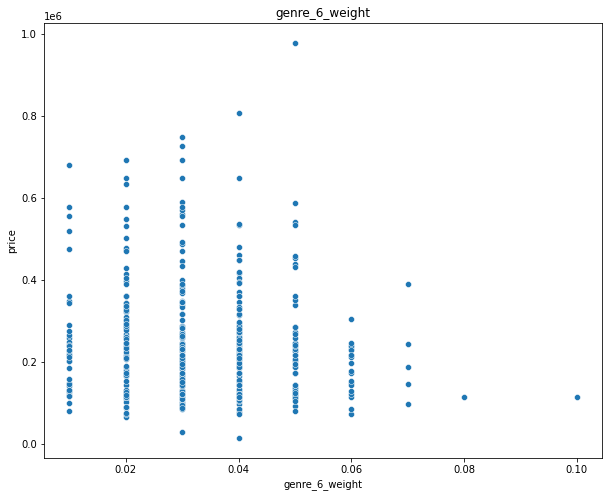

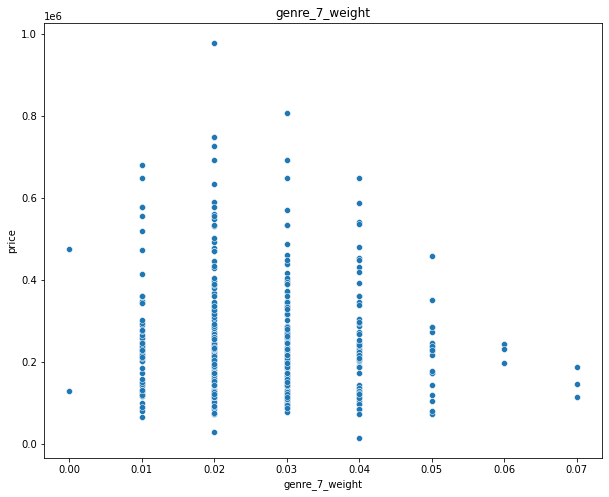

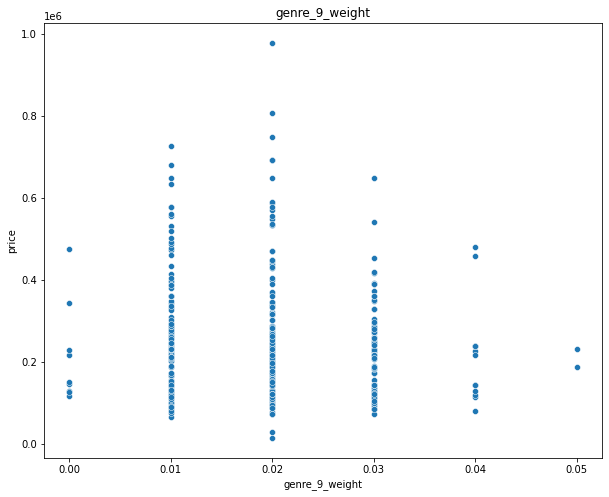

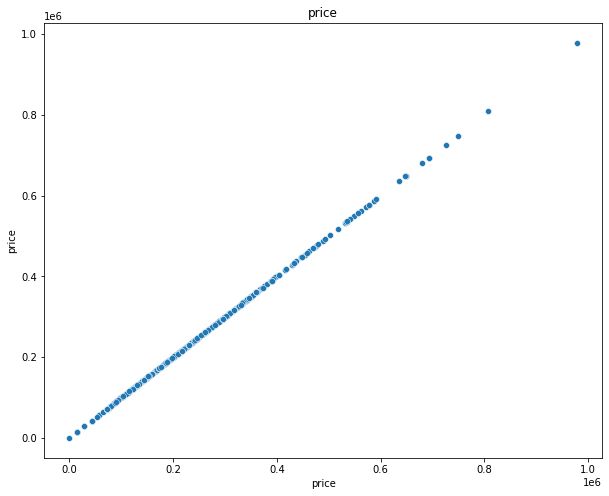

In [ ]:

for i in numerics:
    plt.figure(figsize=(10,8))
    sns.scatterplot(x = traincp[i],y = traincp['price'])
    plt.title(i)
    plt.show()

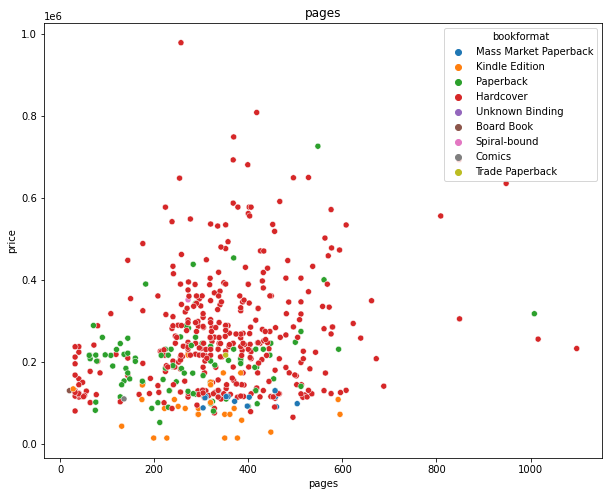

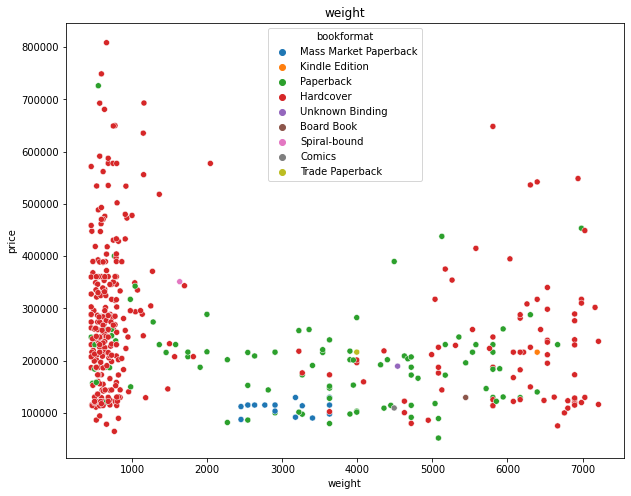

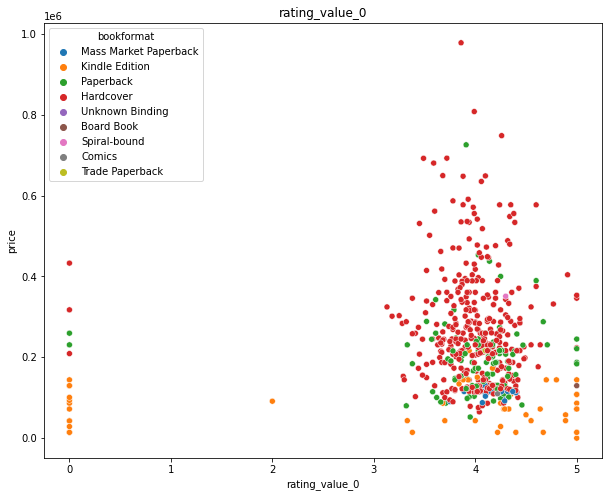

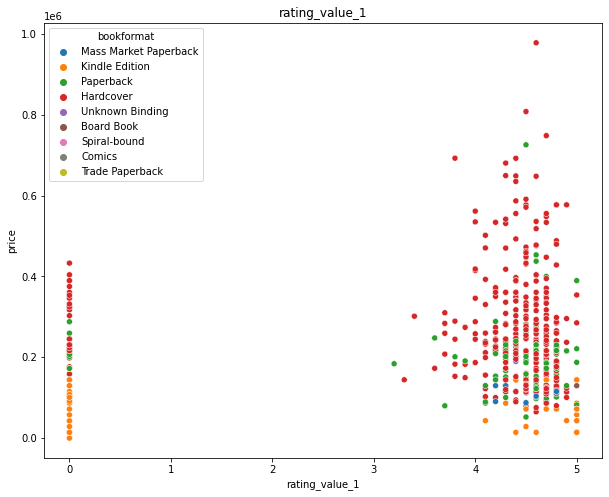

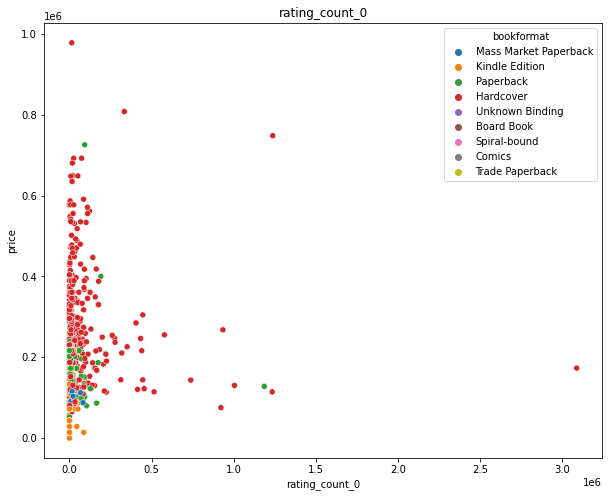

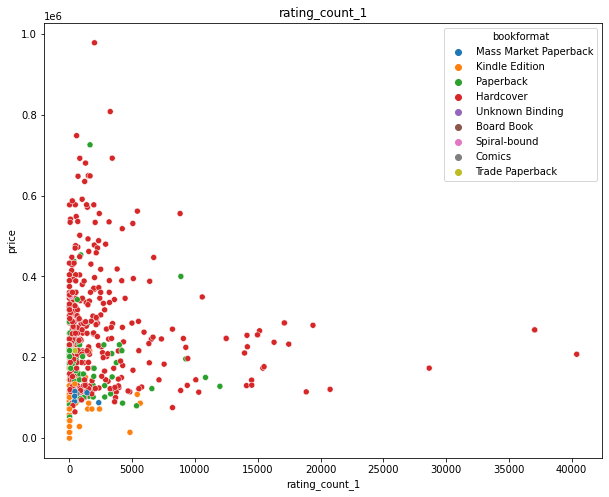

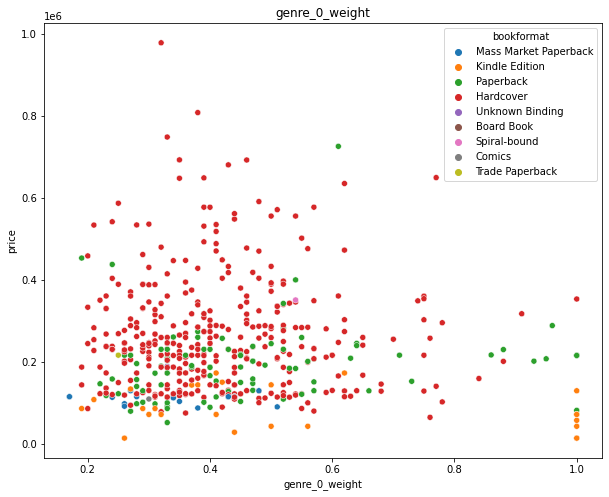

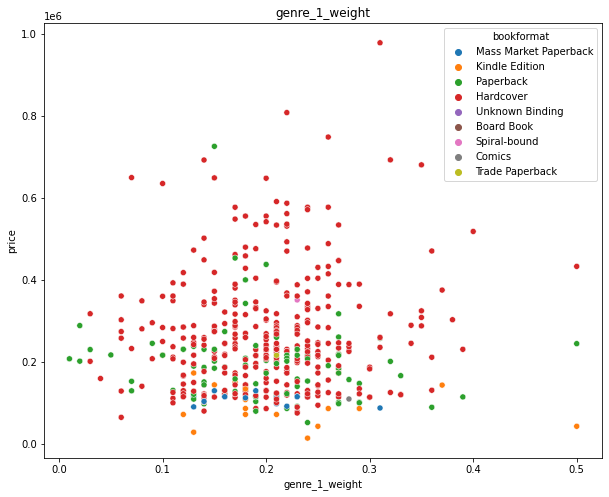

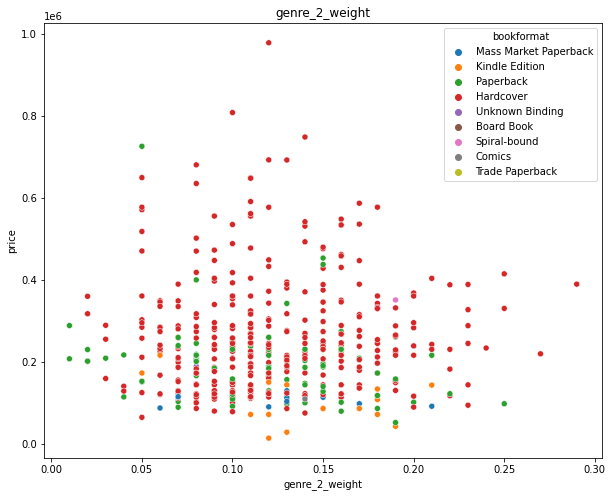

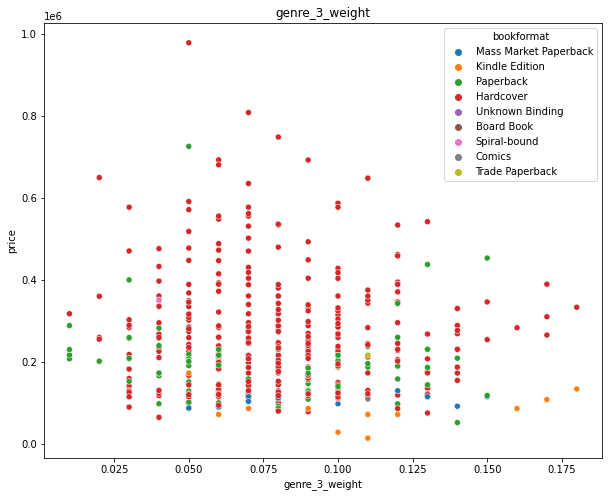

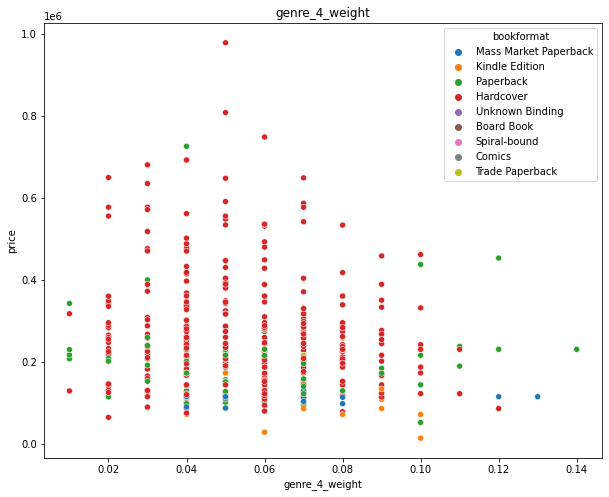

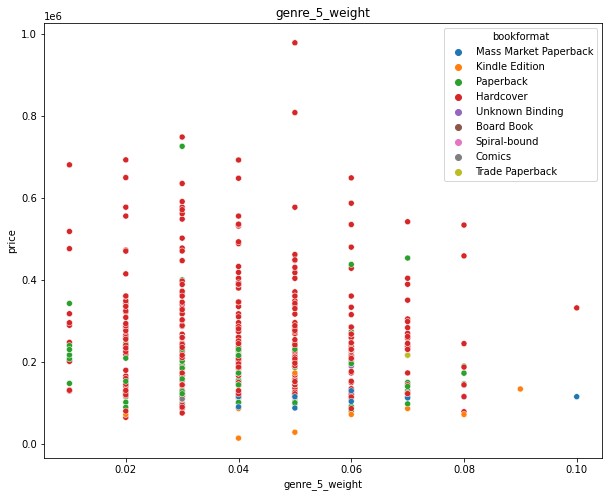

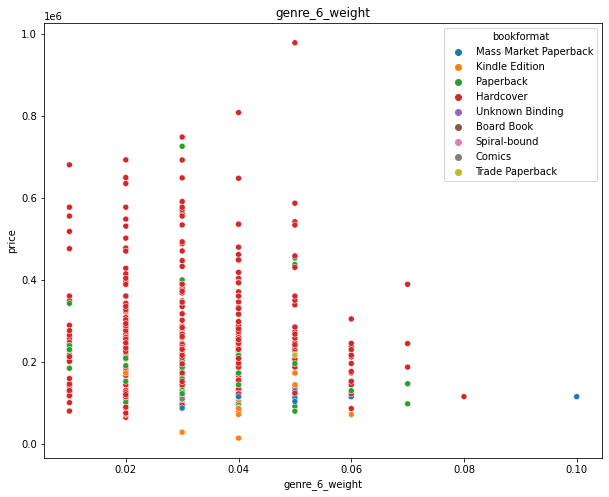

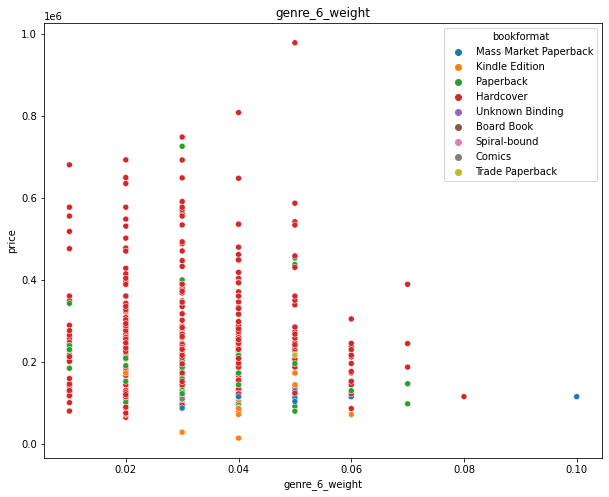

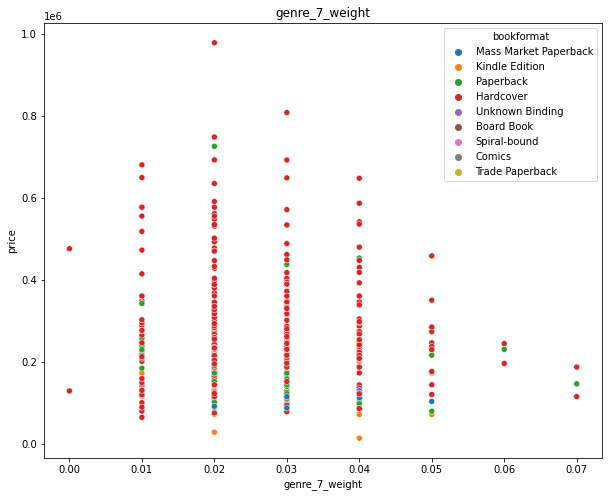

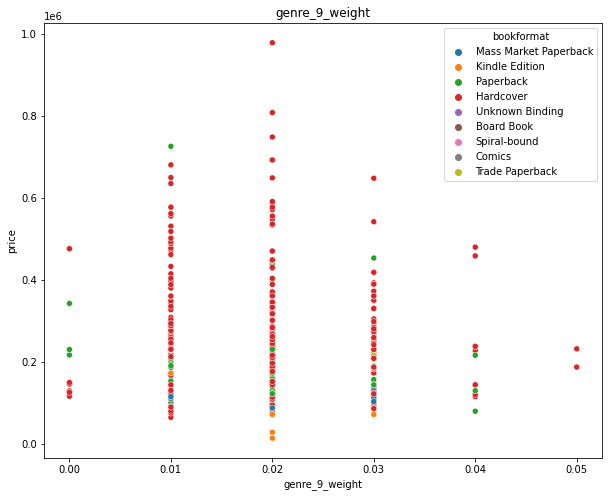

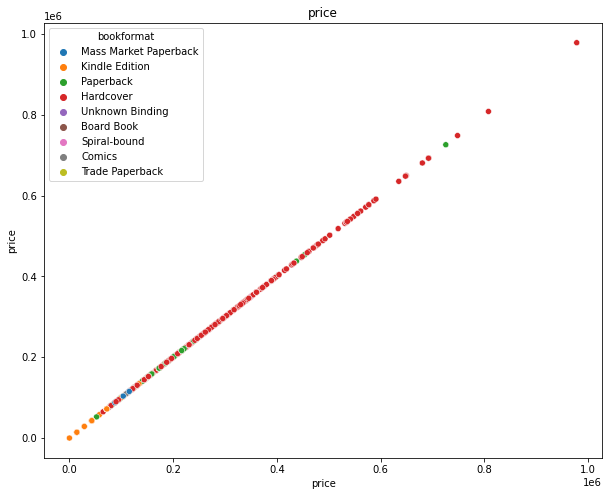

In [ ]:

for i in numerics:
    plt.figure(figsize=(10,8))
    sns.scatterplot(x = traincp[i],y = traincp['price'],hue=traincp["bookformat"])
    plt.title(i)
    plt.show()

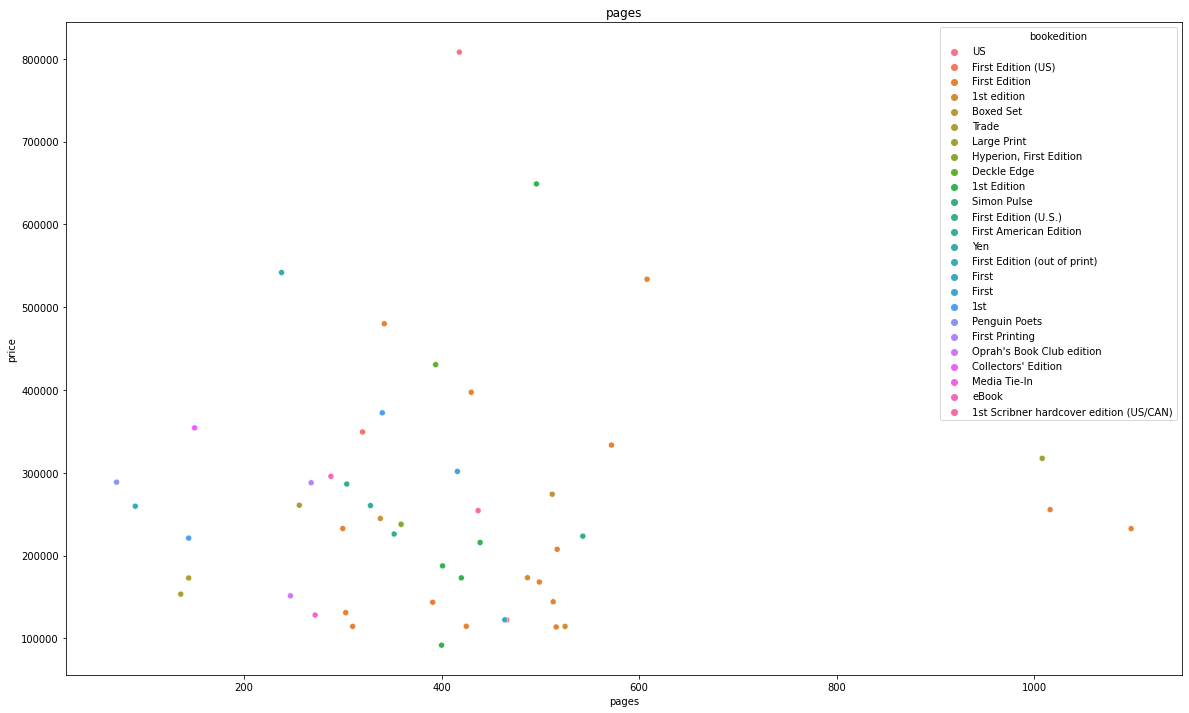

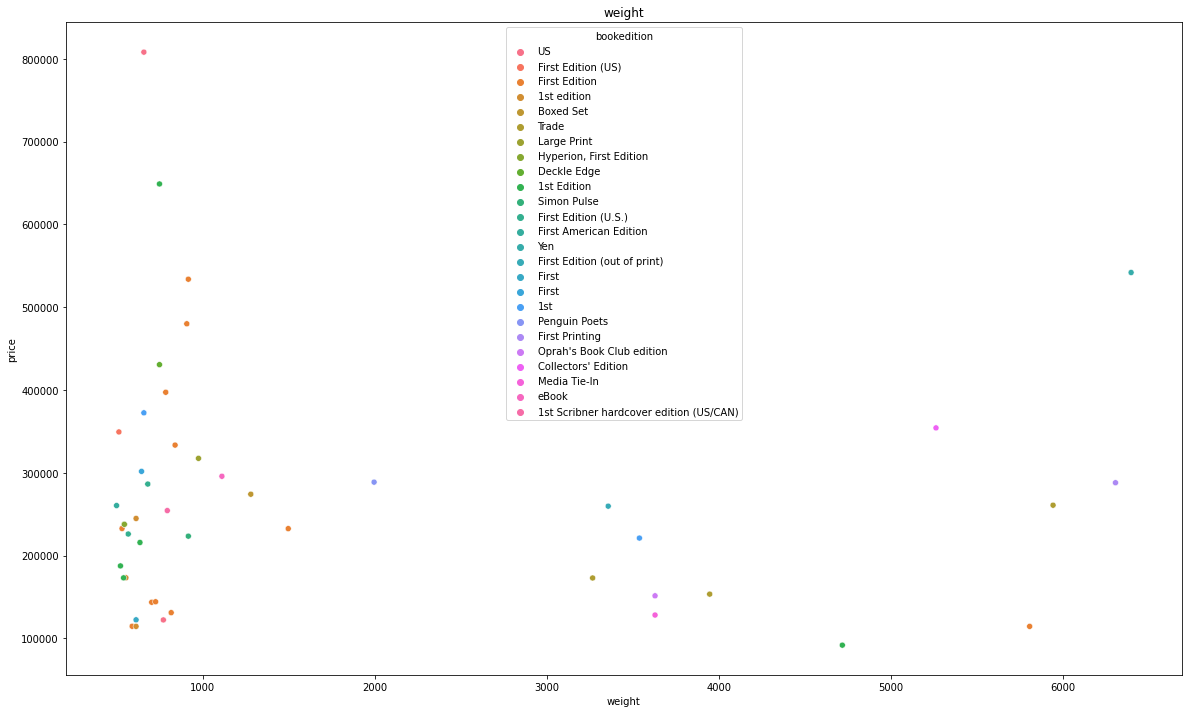

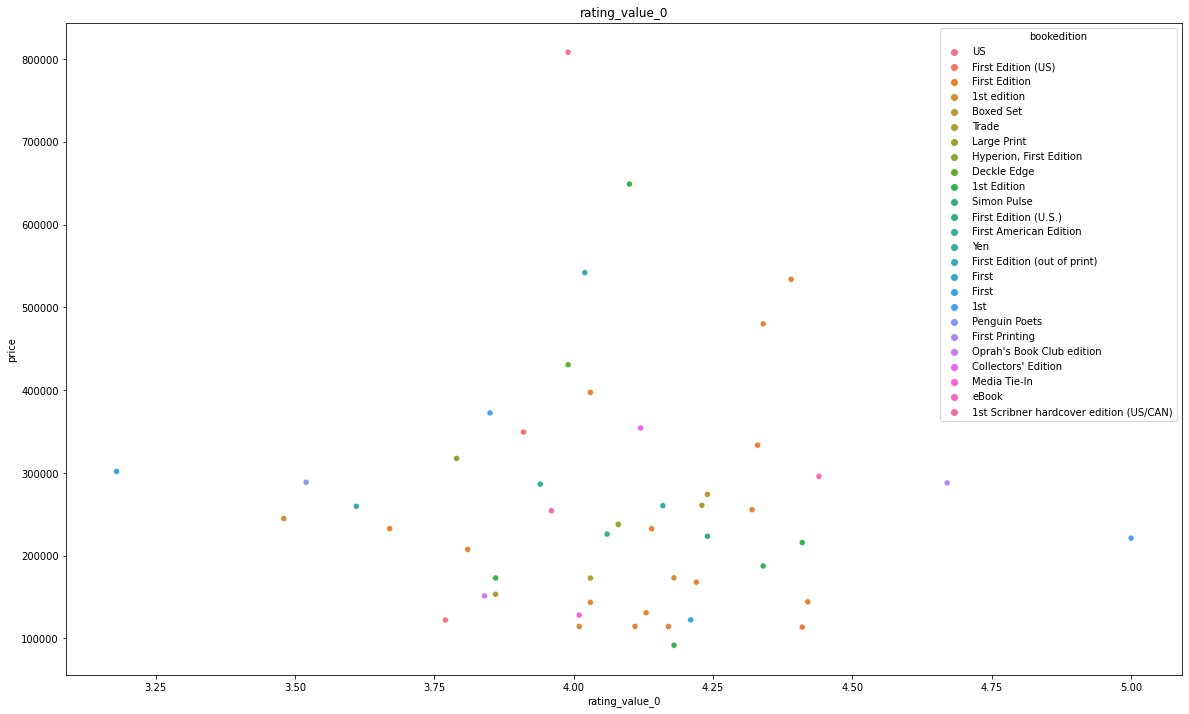

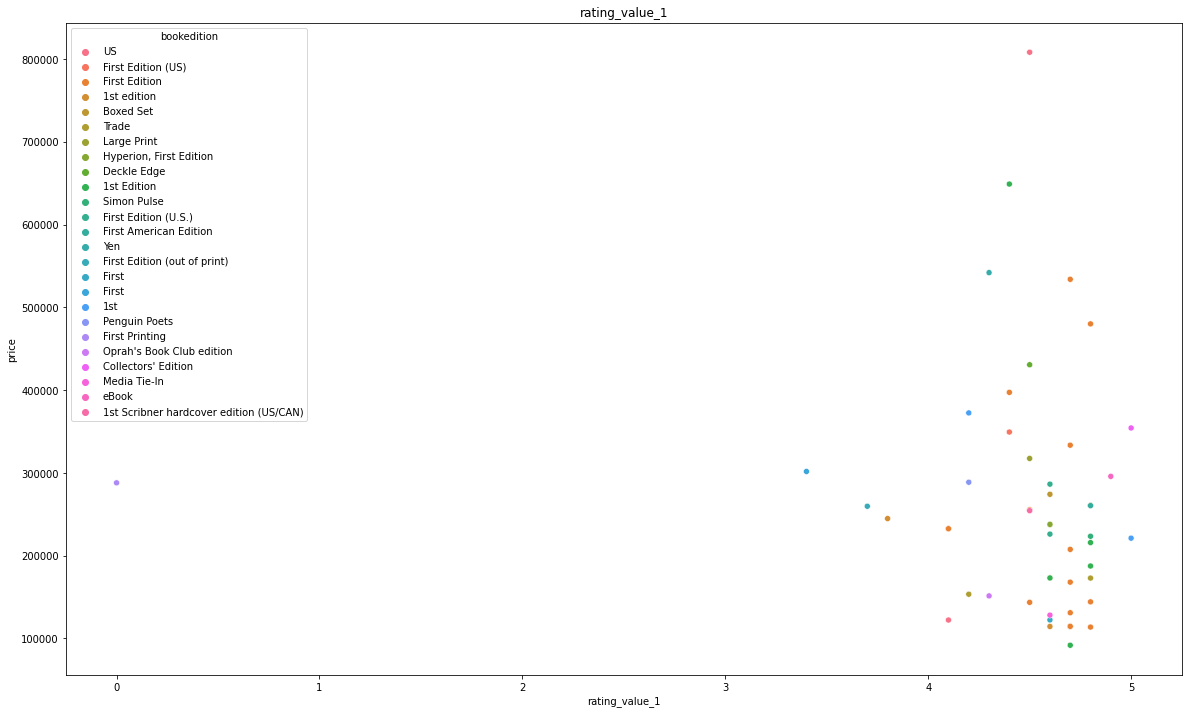

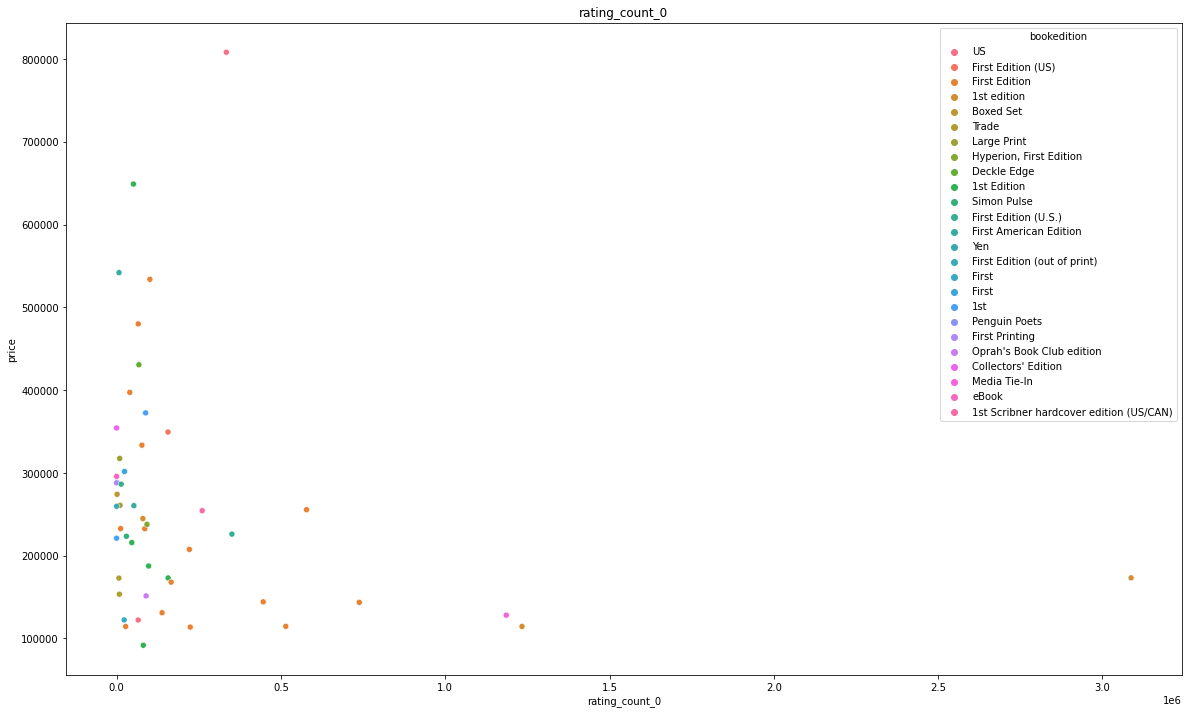

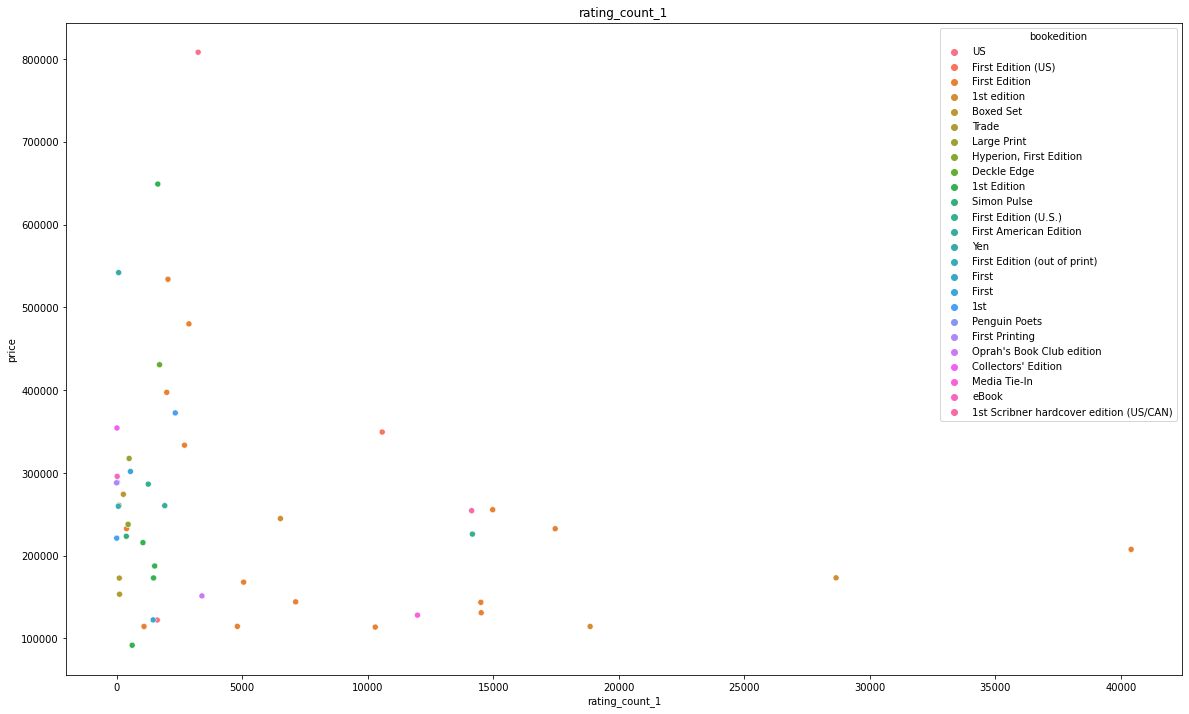

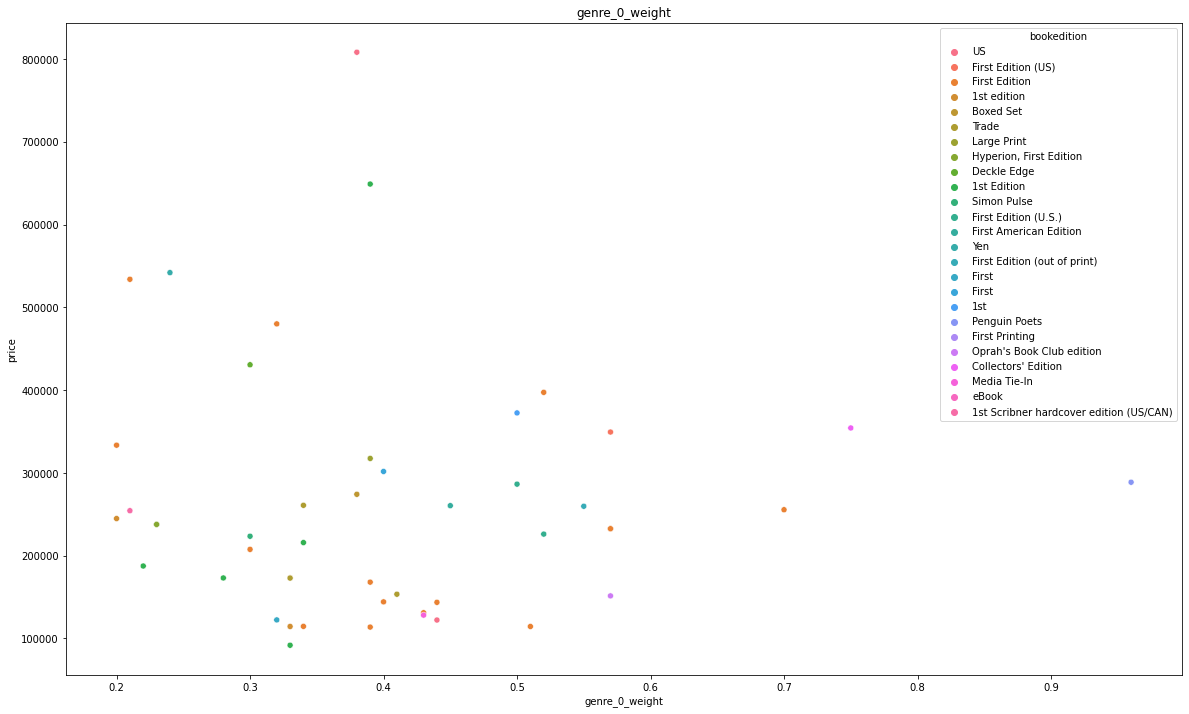

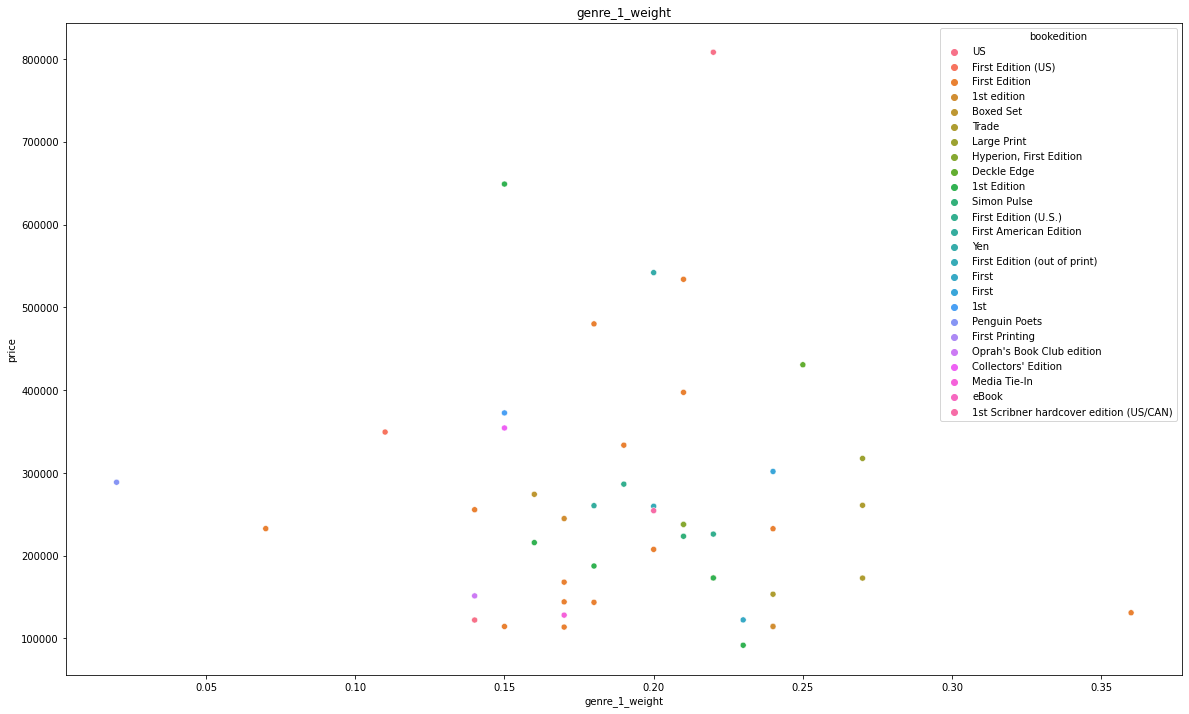

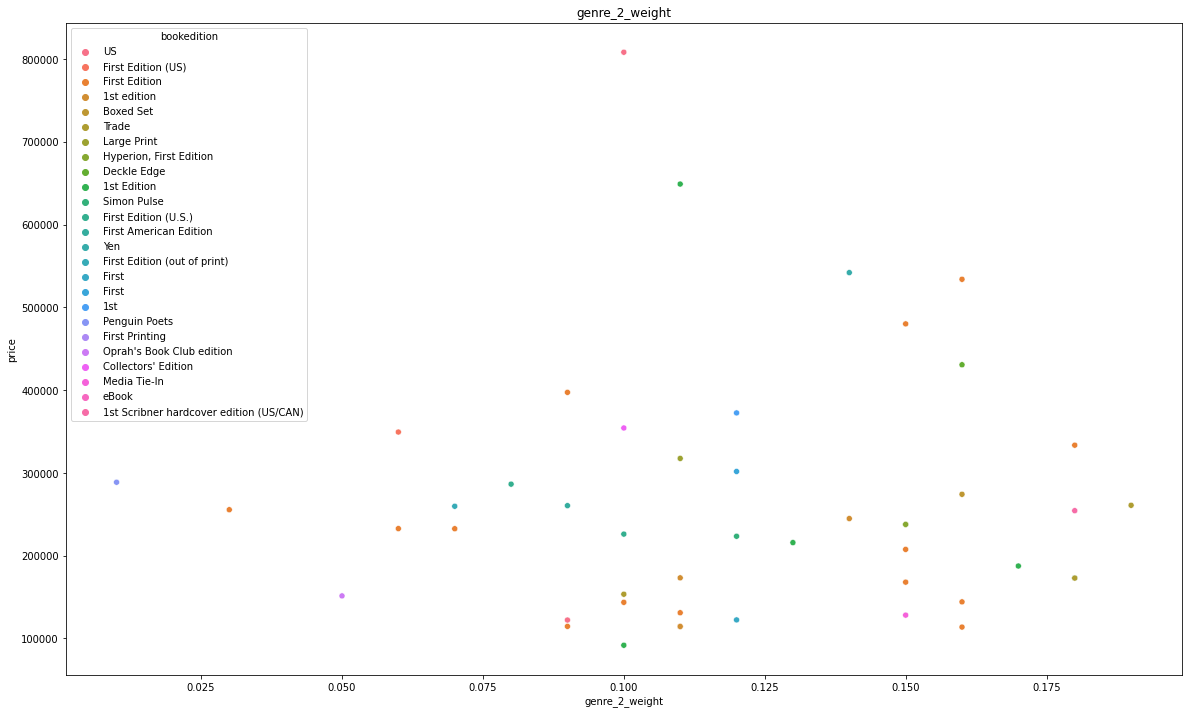

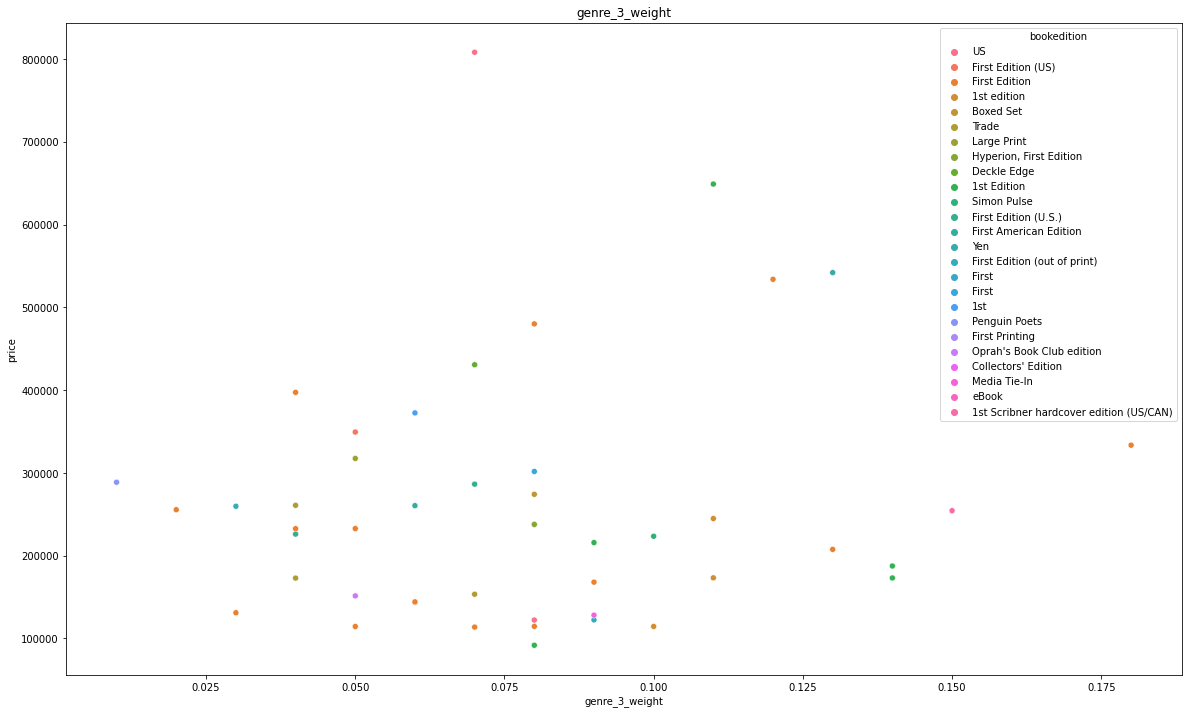

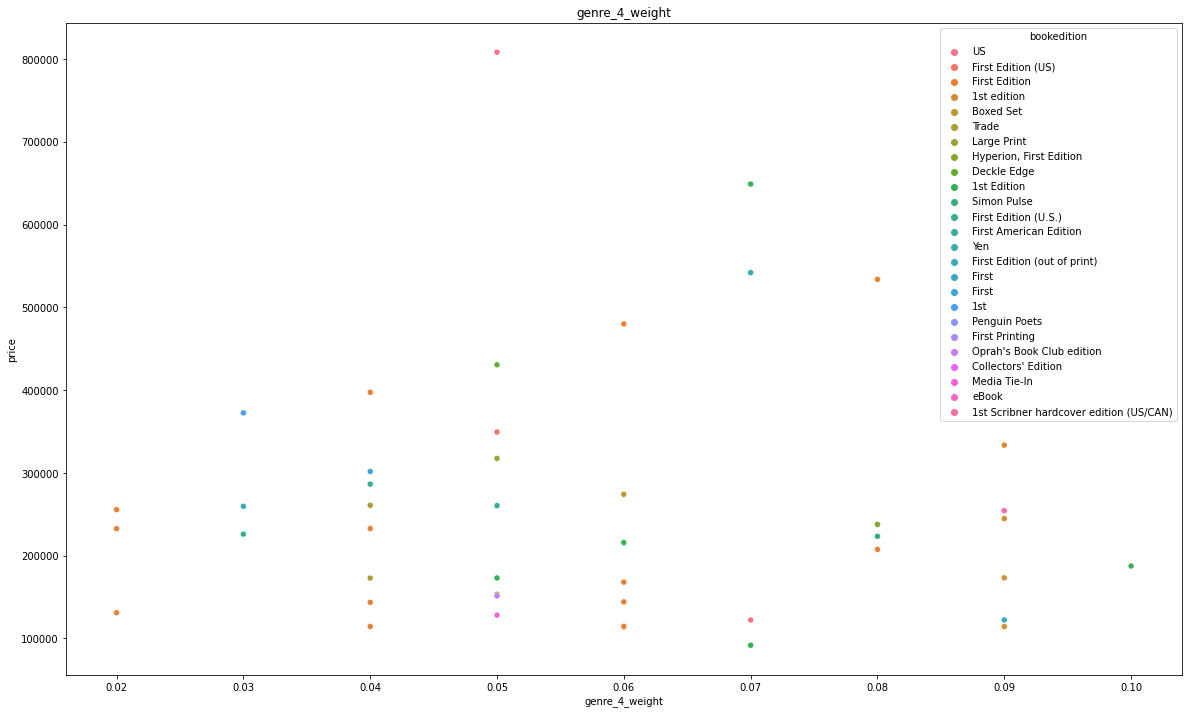

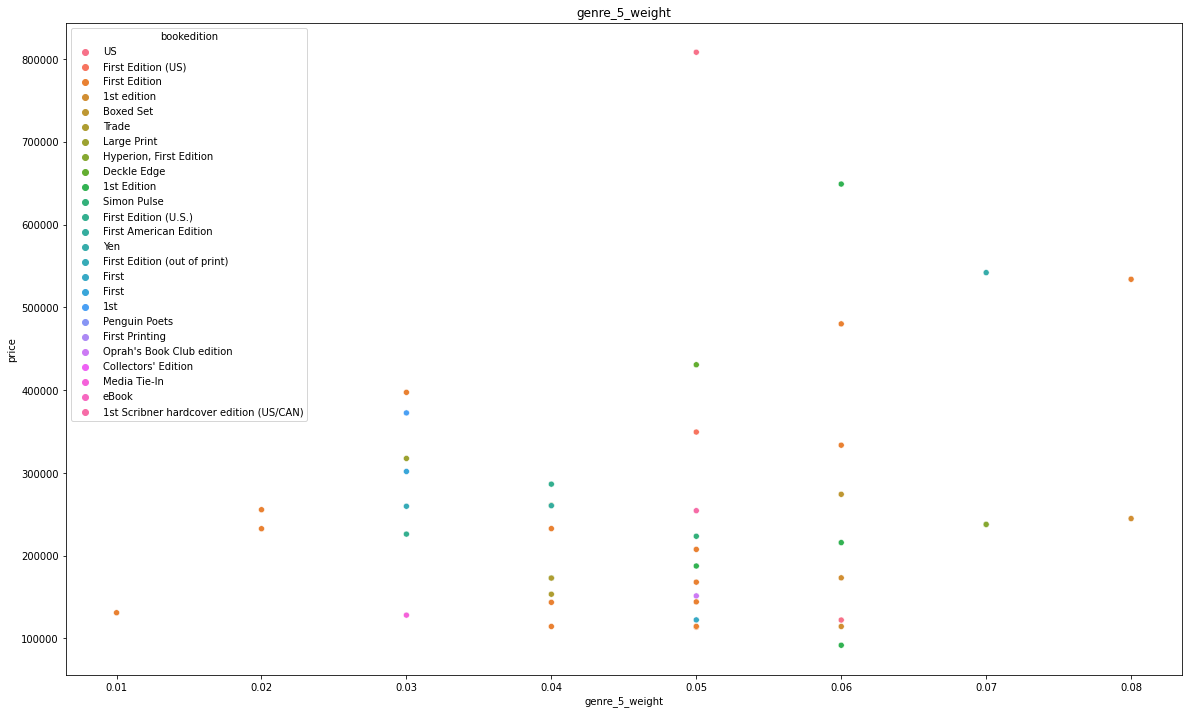

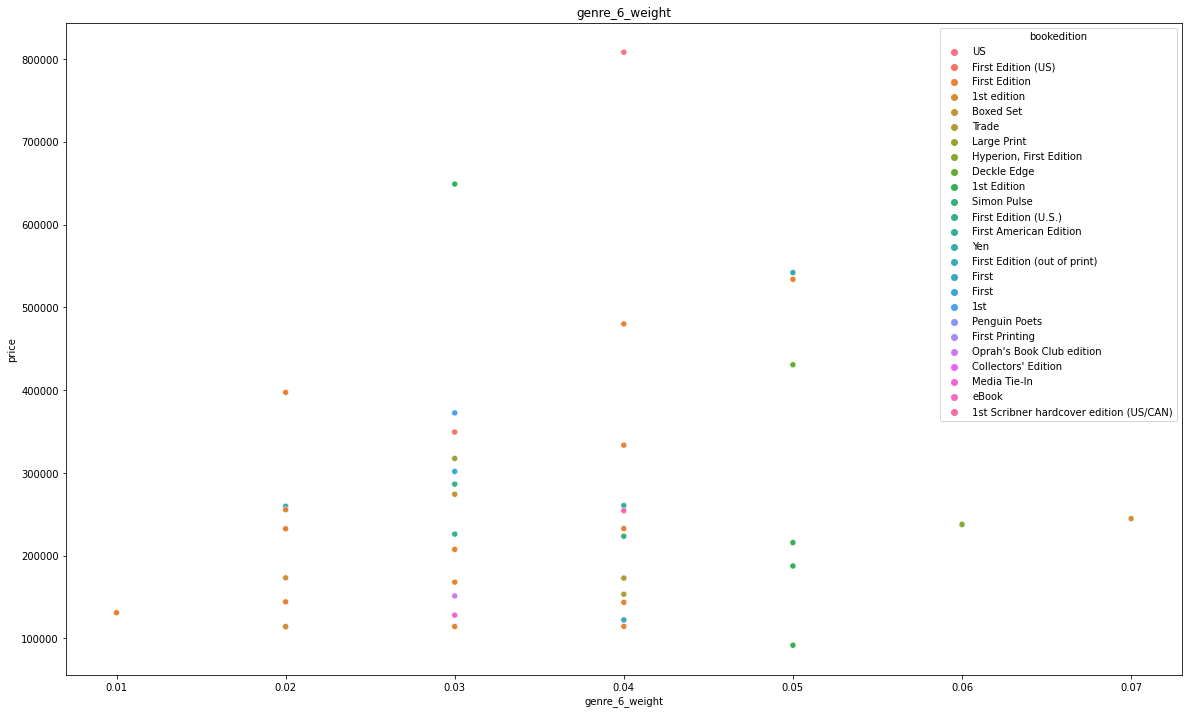

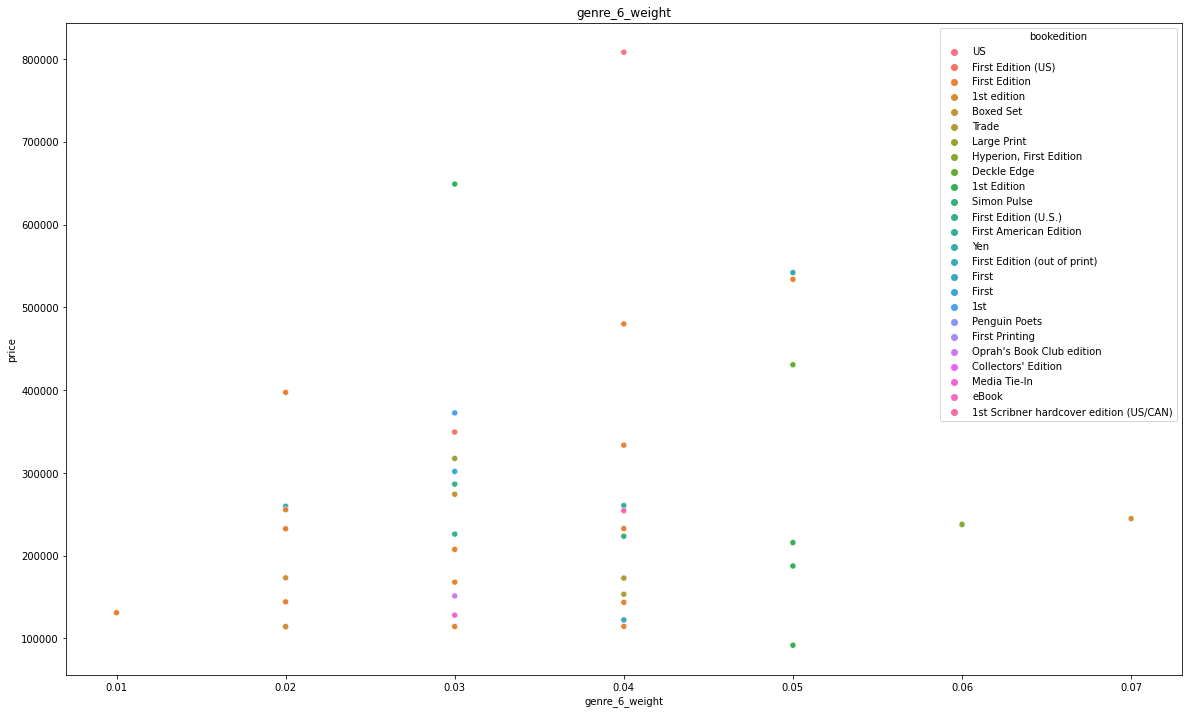

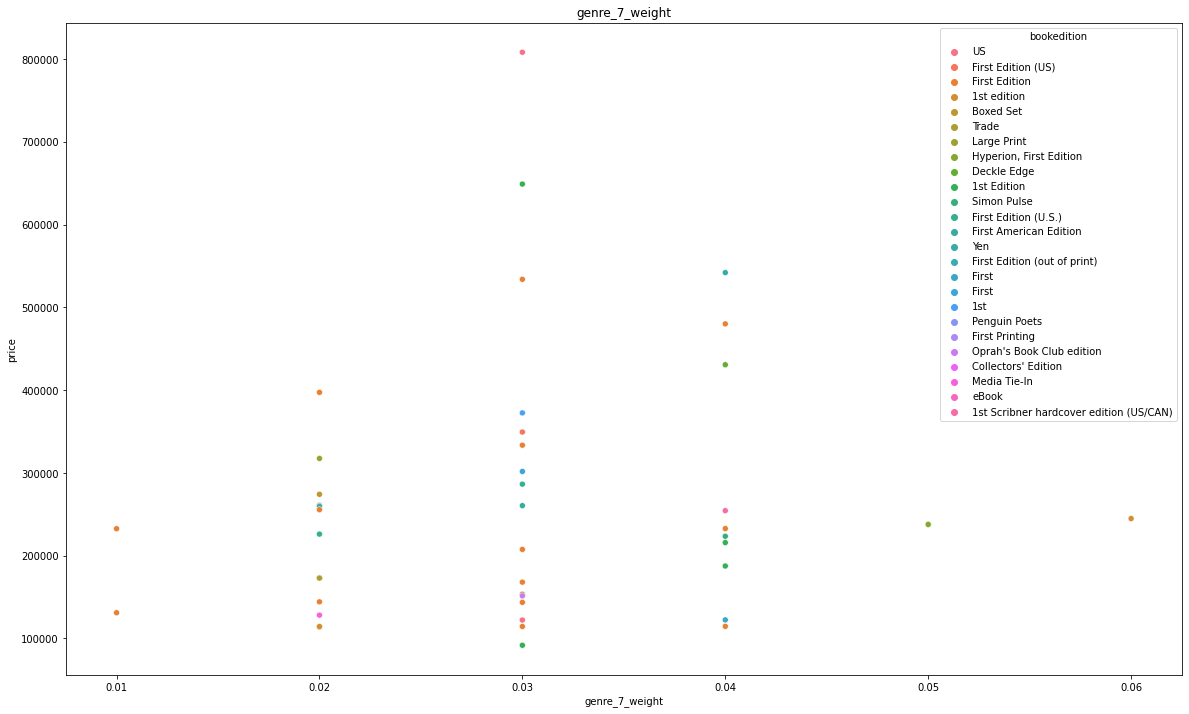

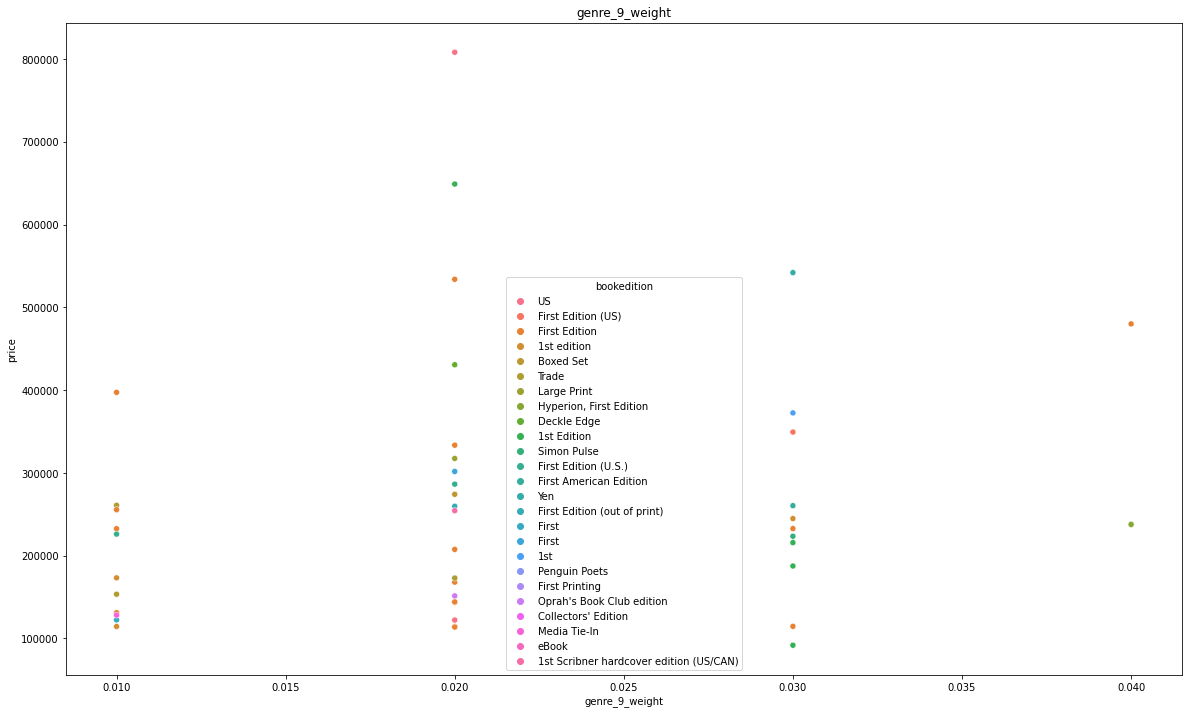

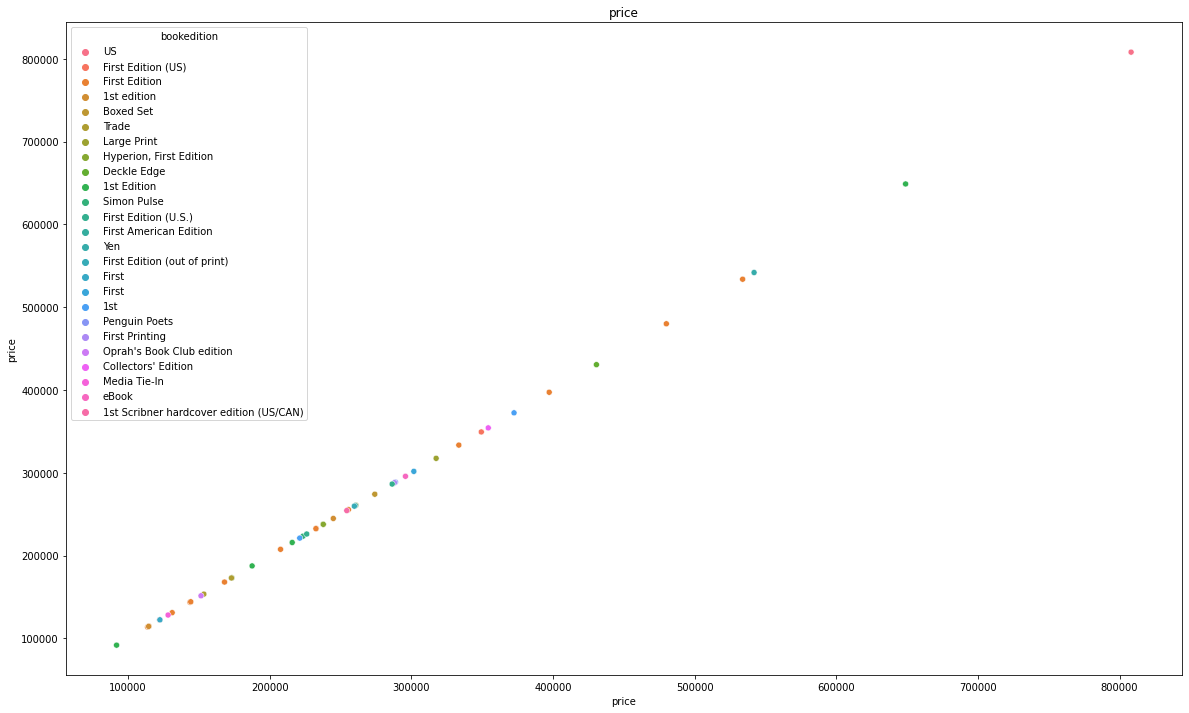

In [ ]:

for i in numerics:
    plt.figure(figsize=(20,12))
    sns.scatterplot(x = traincp[i],y = traincp['price'],hue=traincp["bookedition"])
    plt.title(i)
    plt.show()

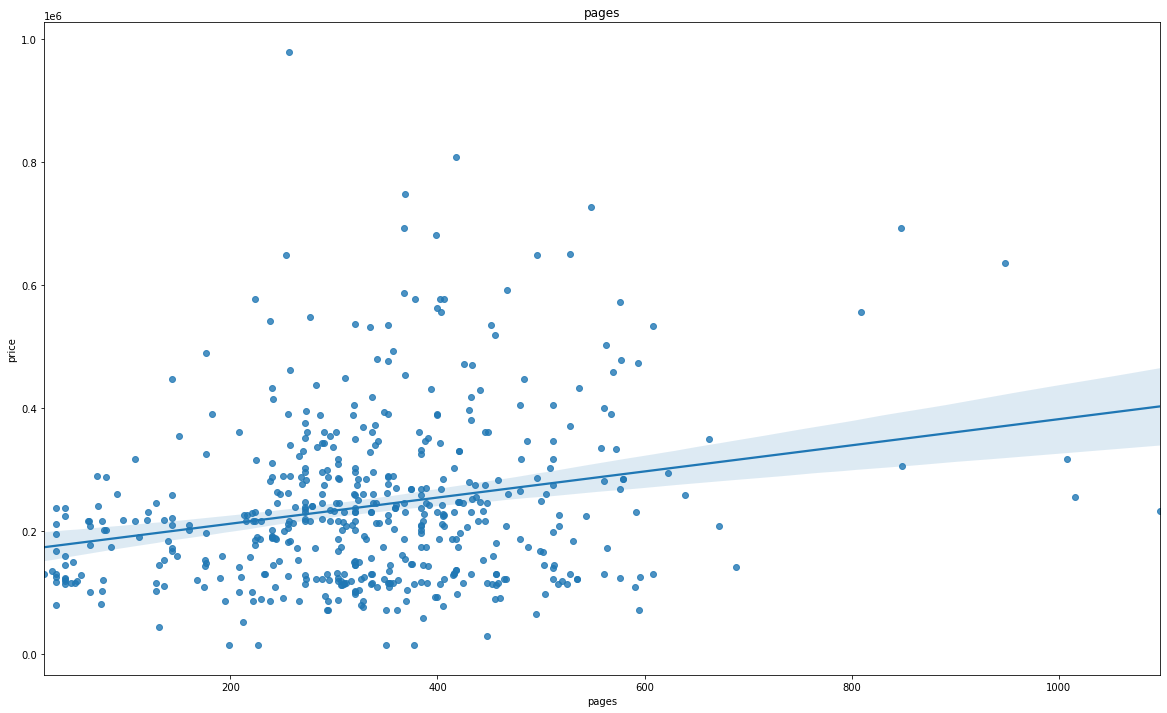

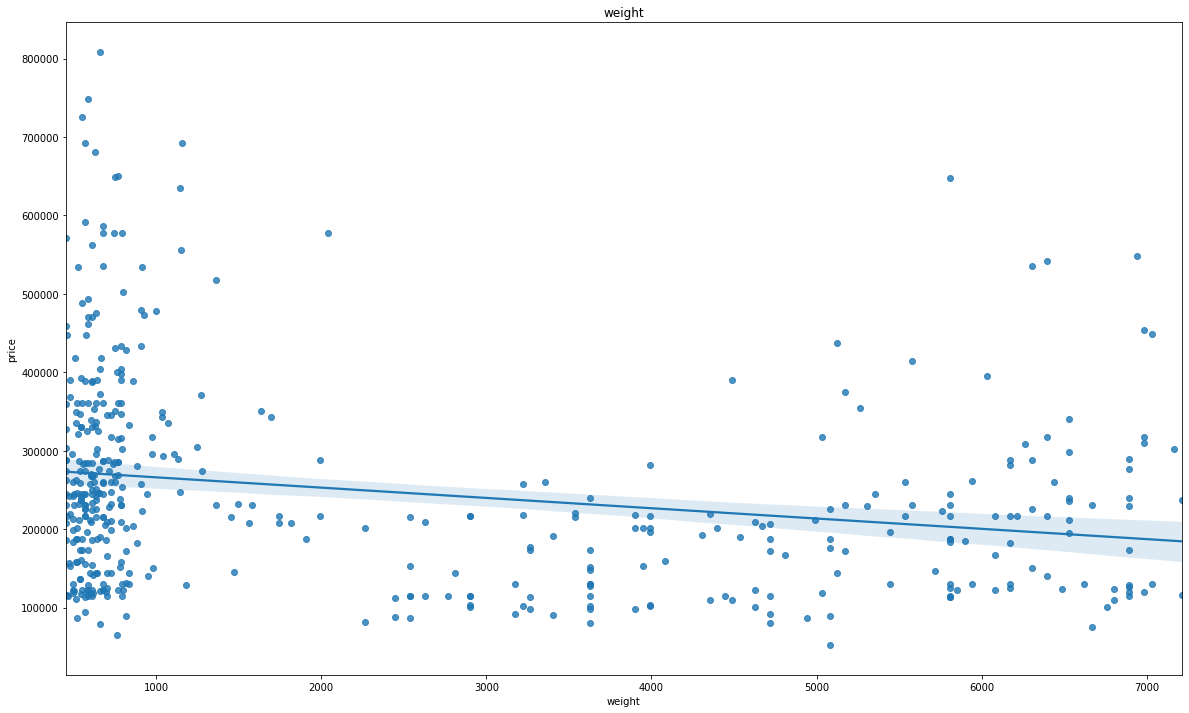

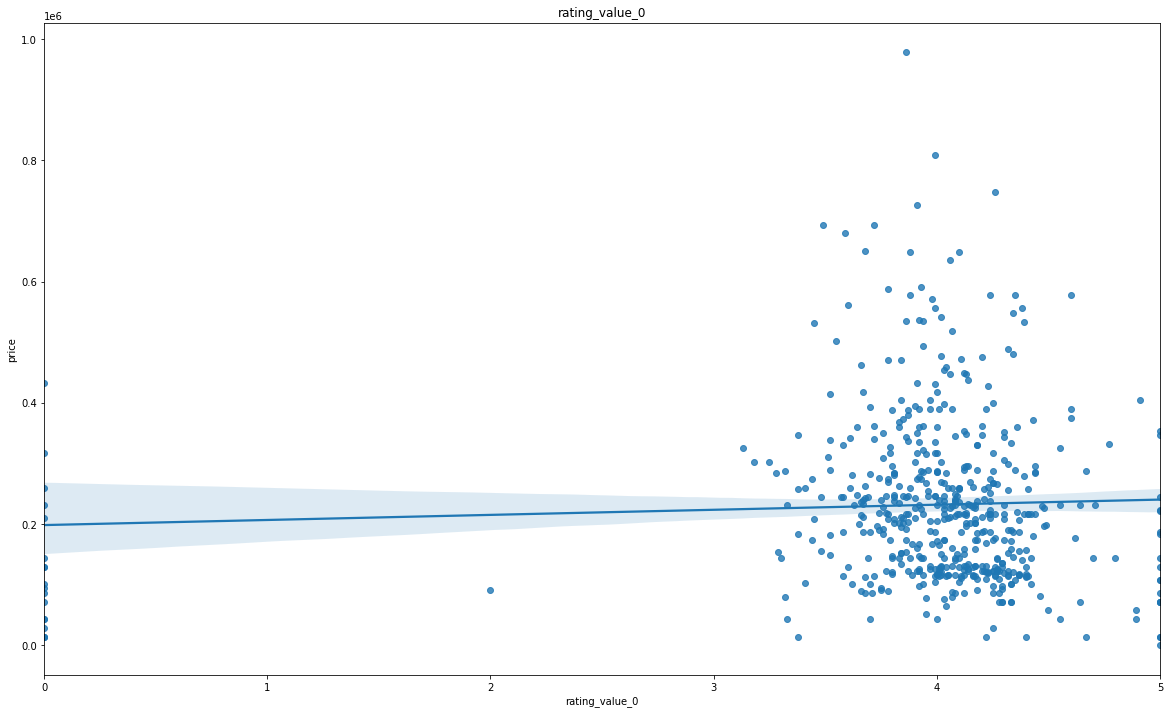

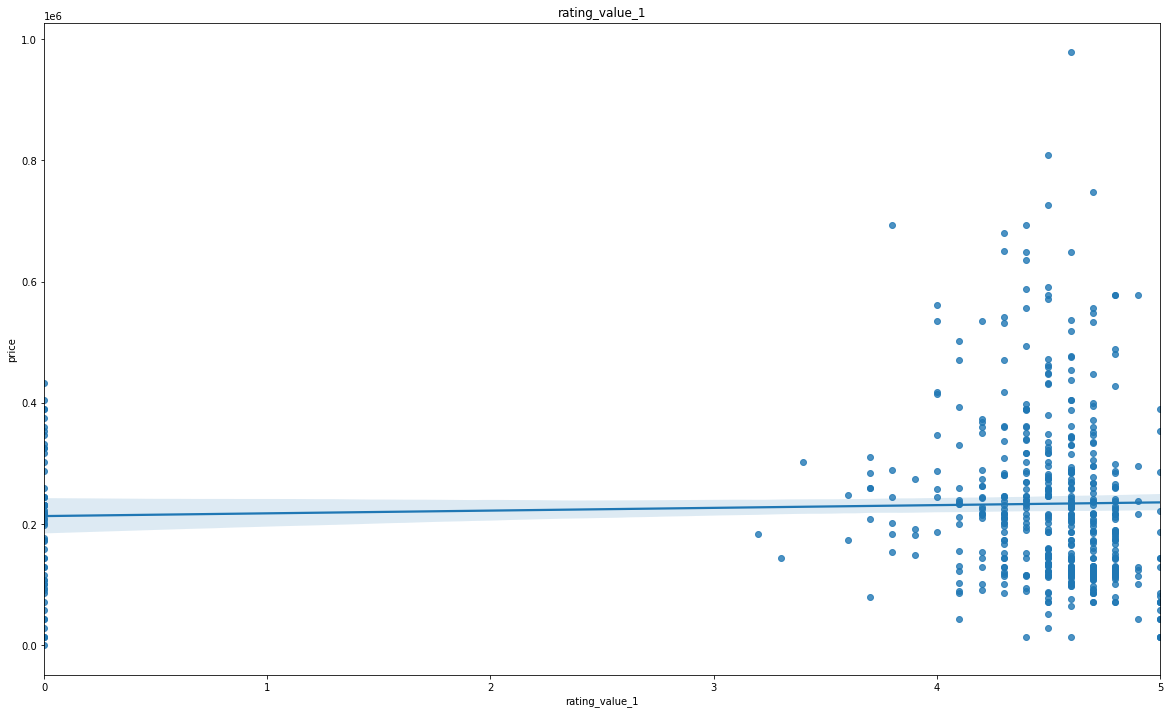

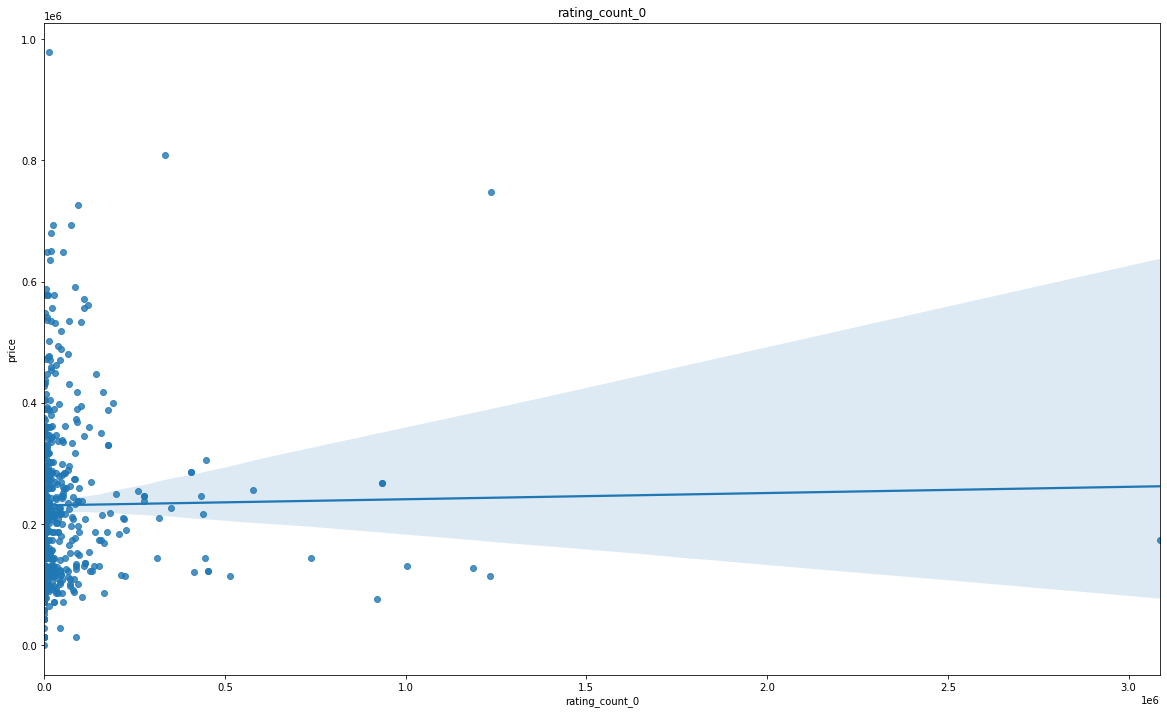

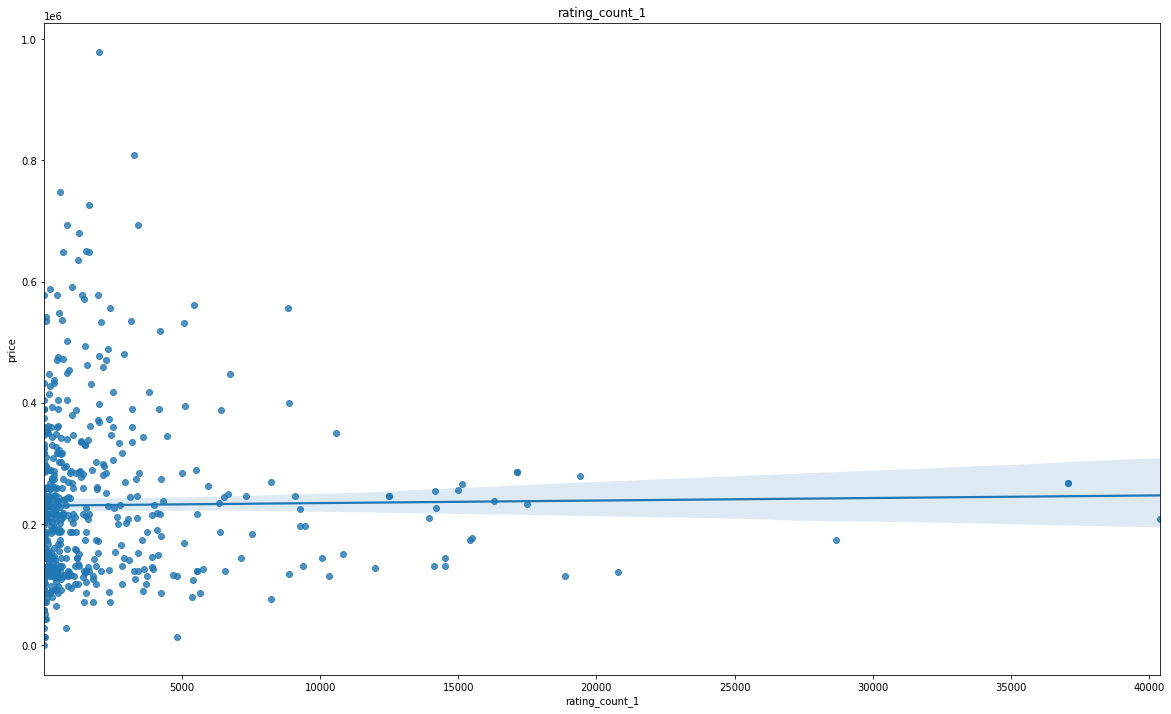

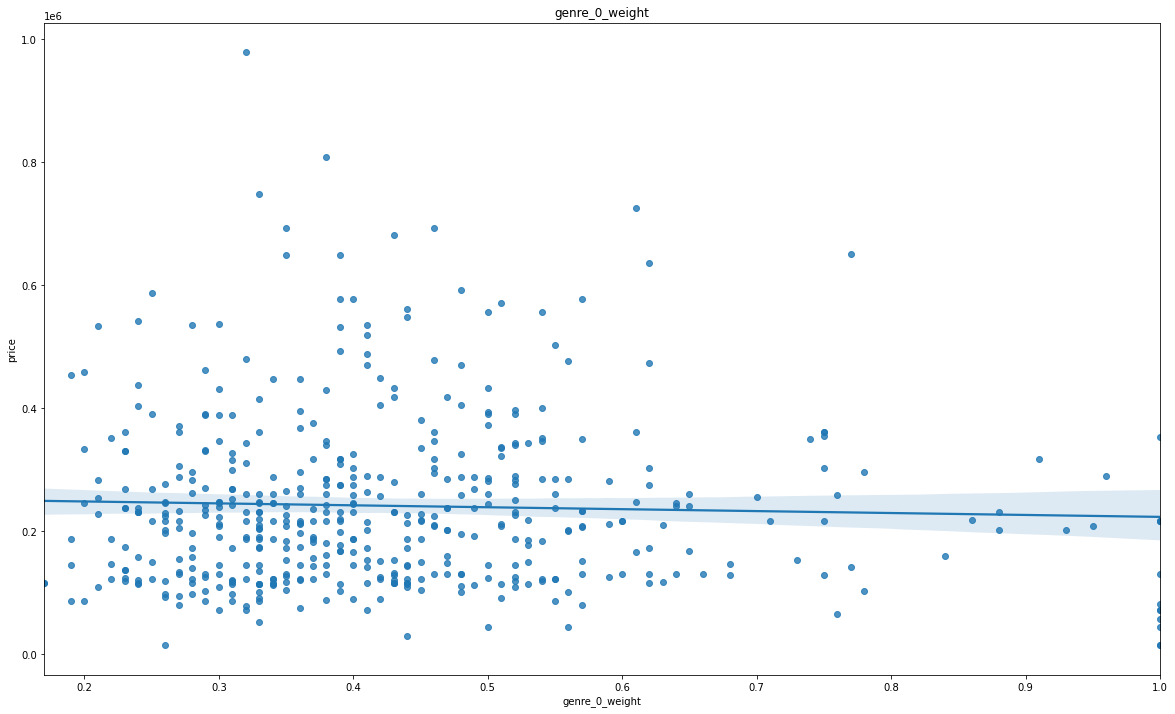

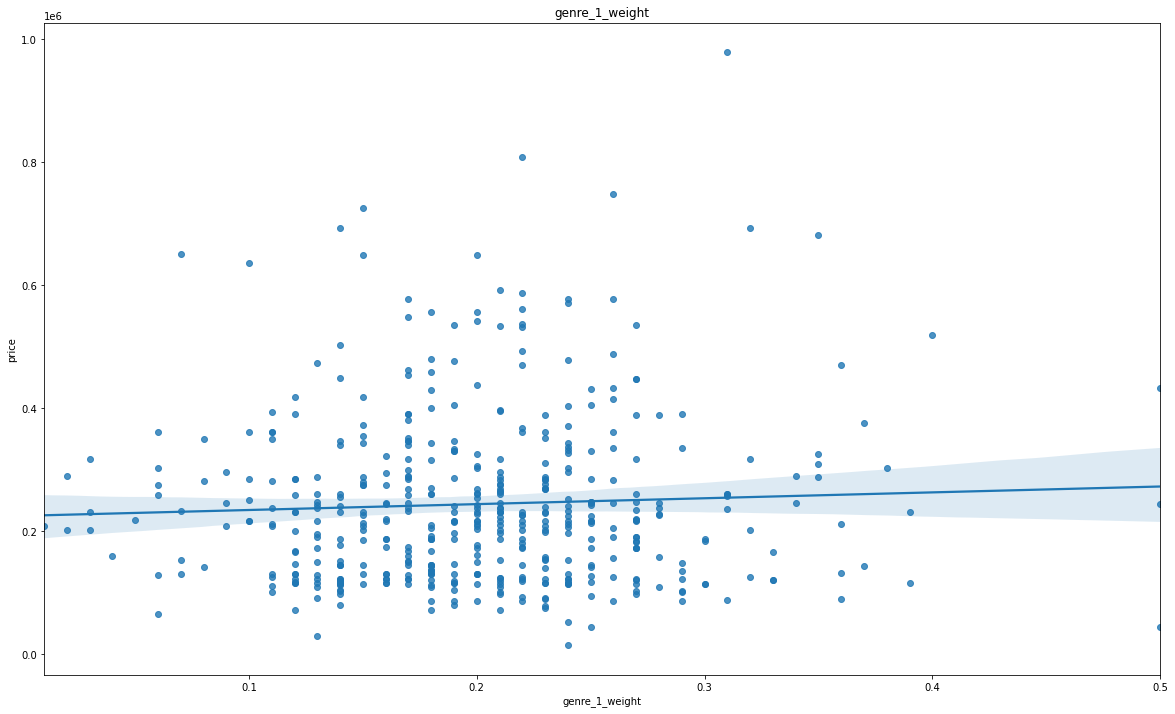

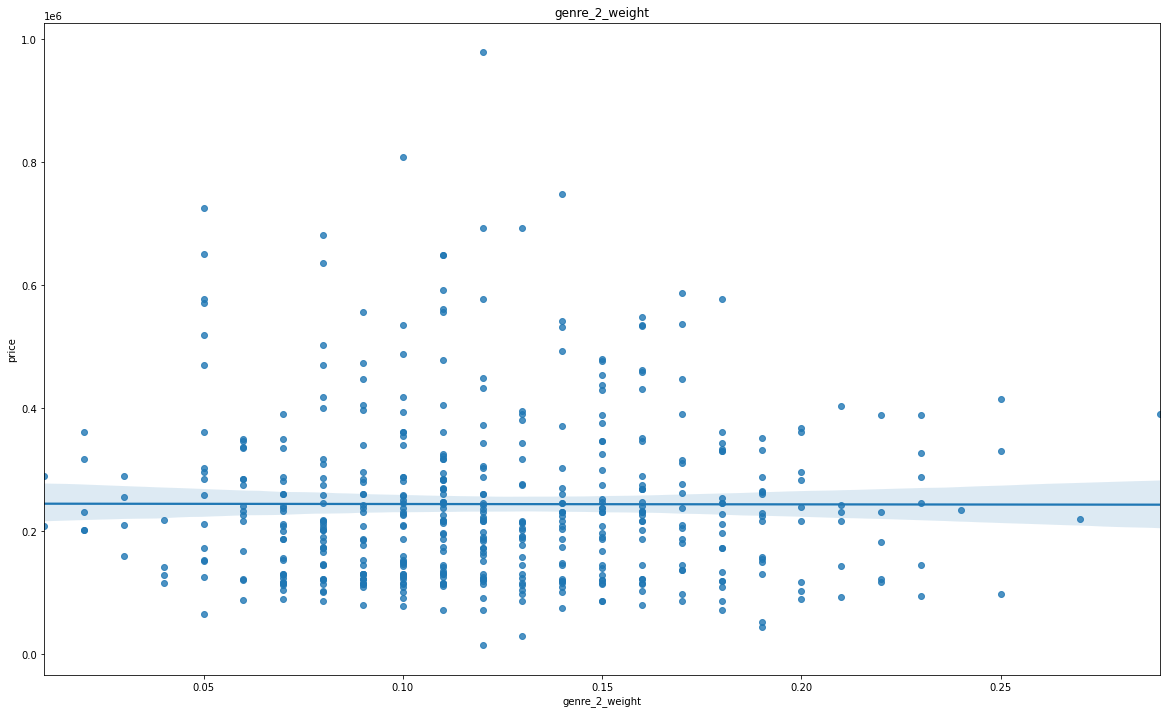

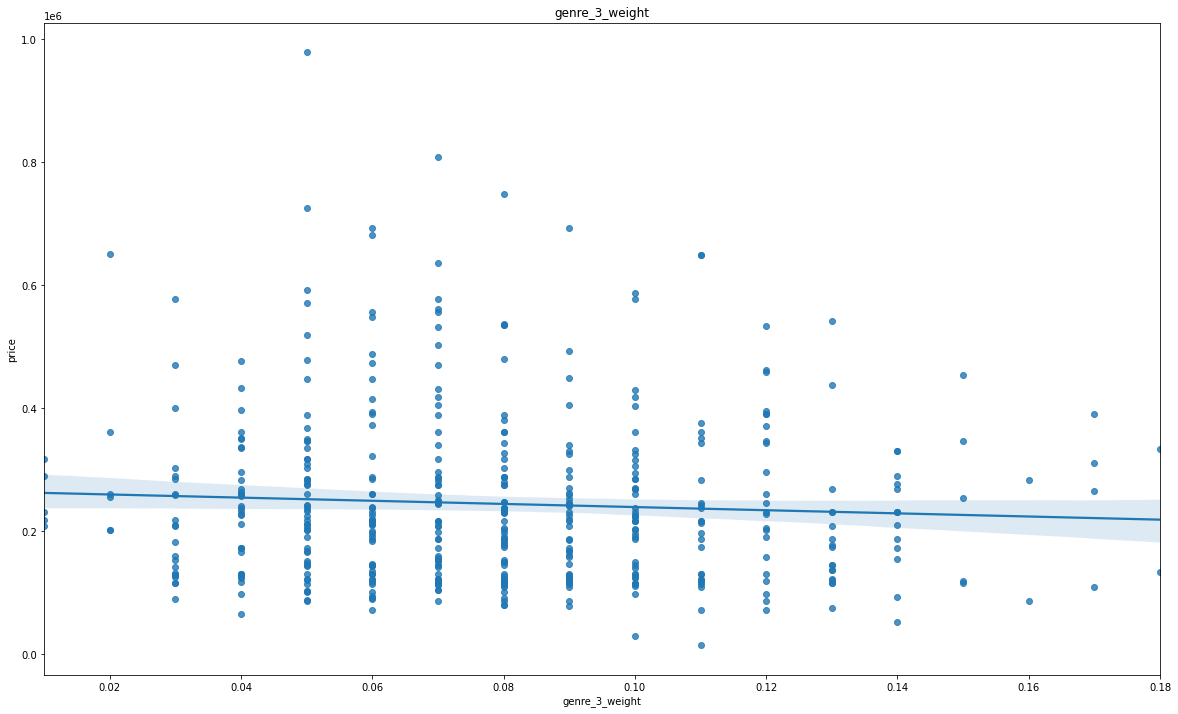

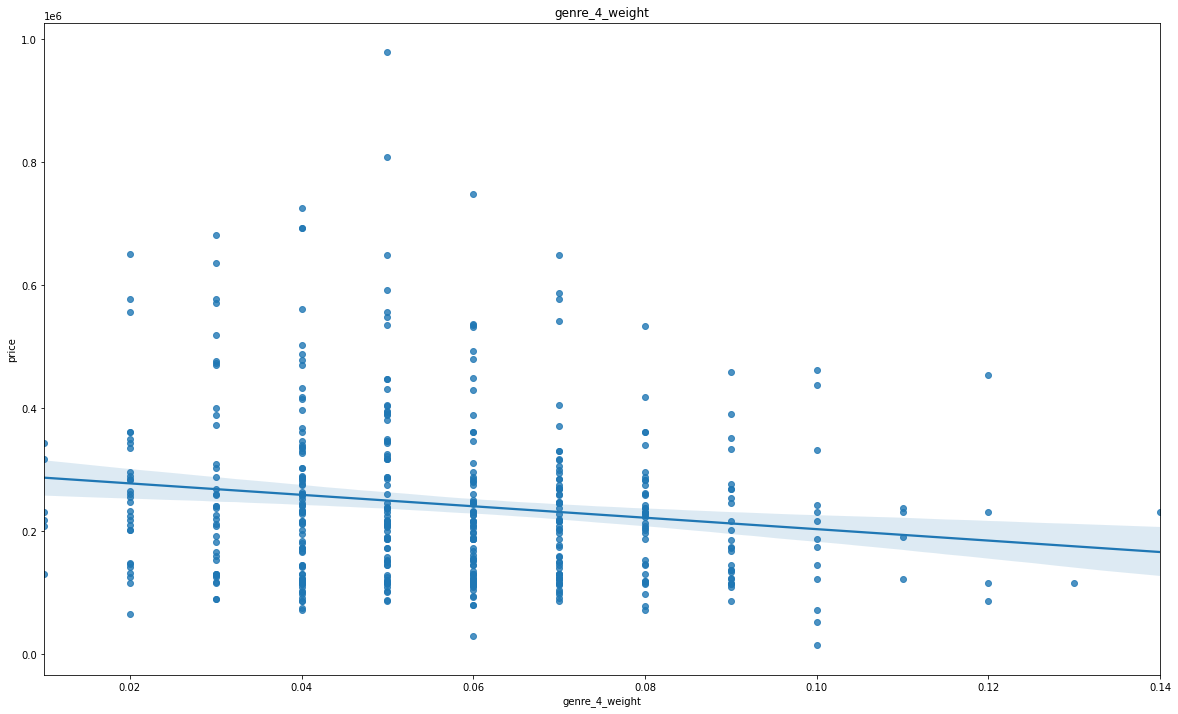

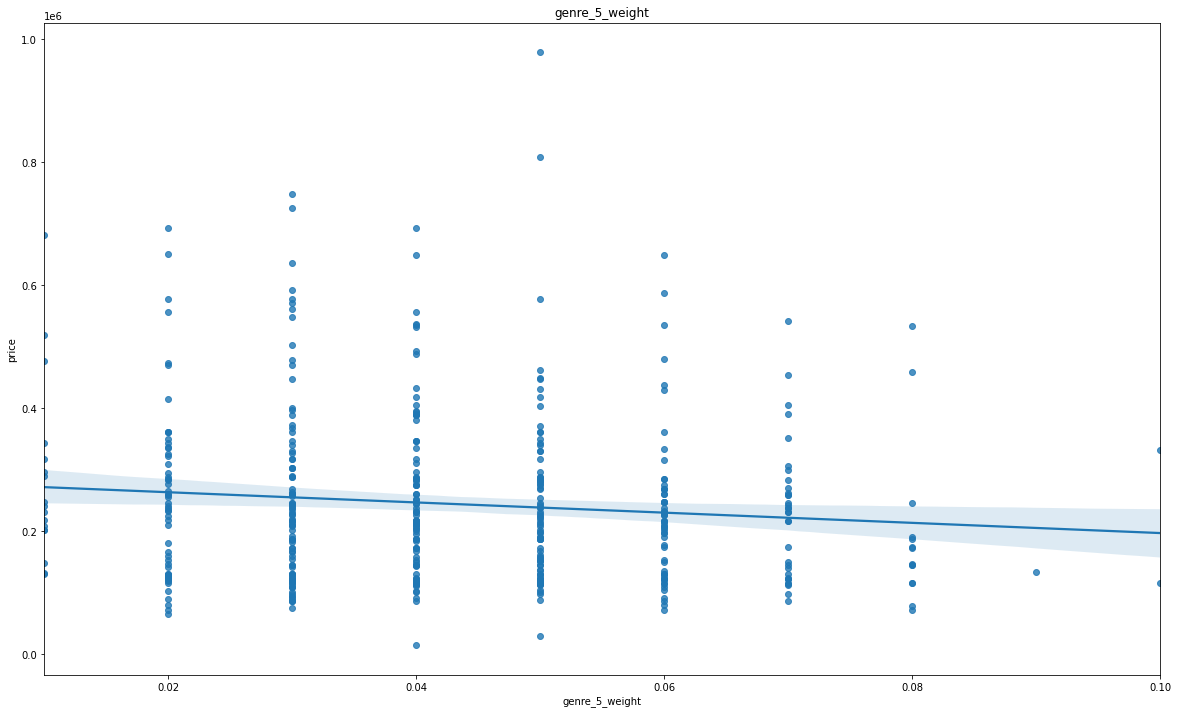

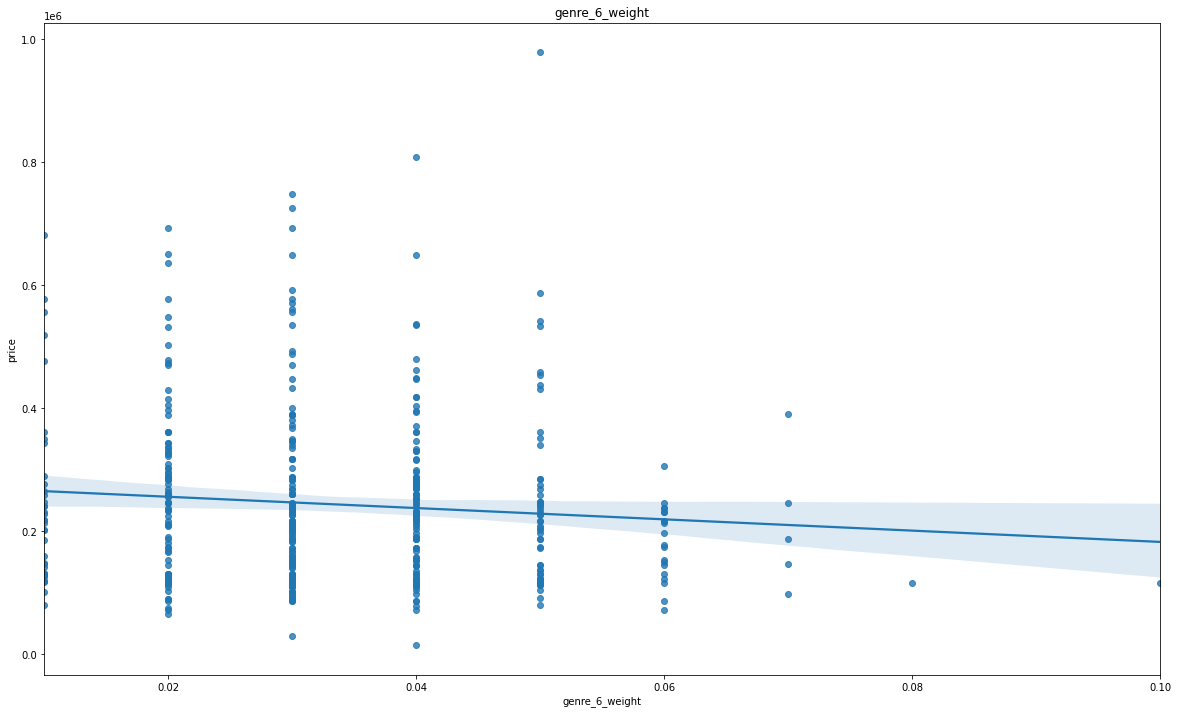

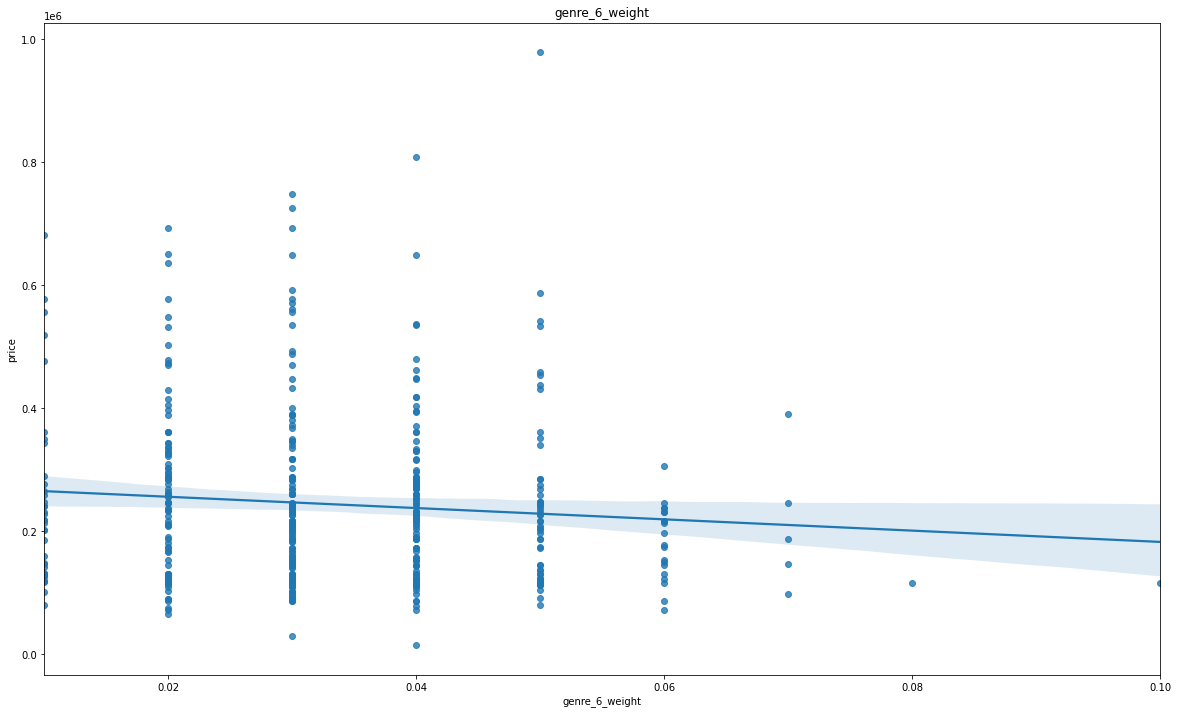

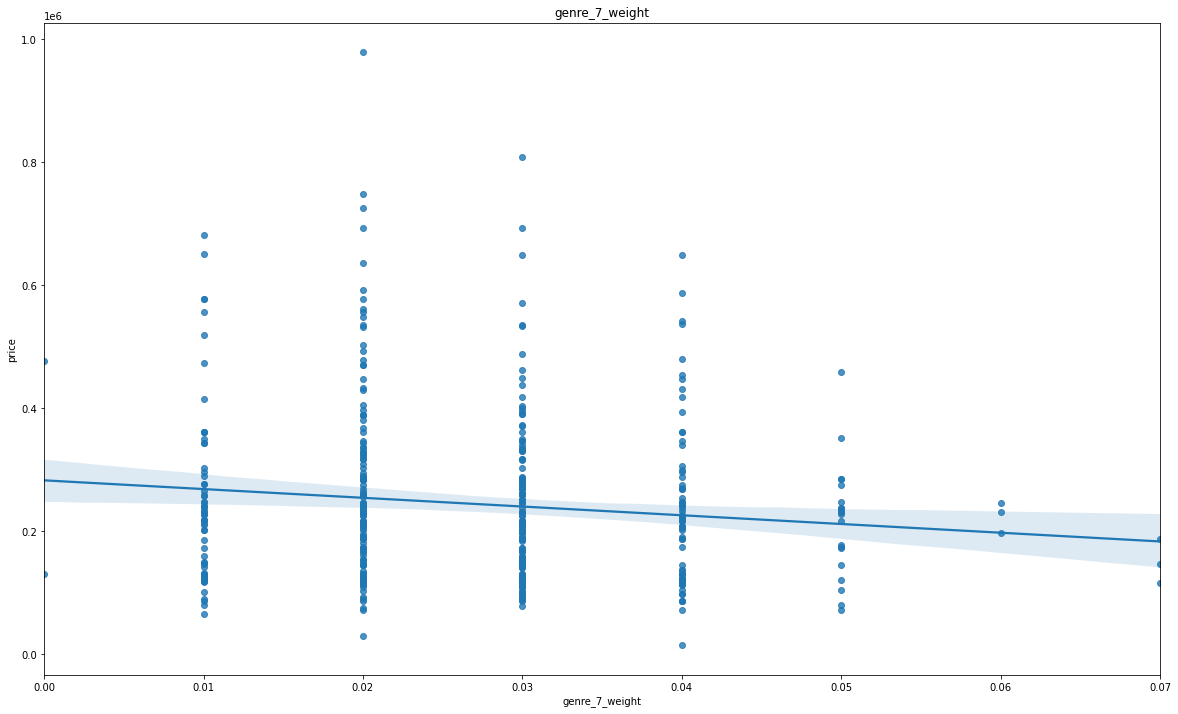

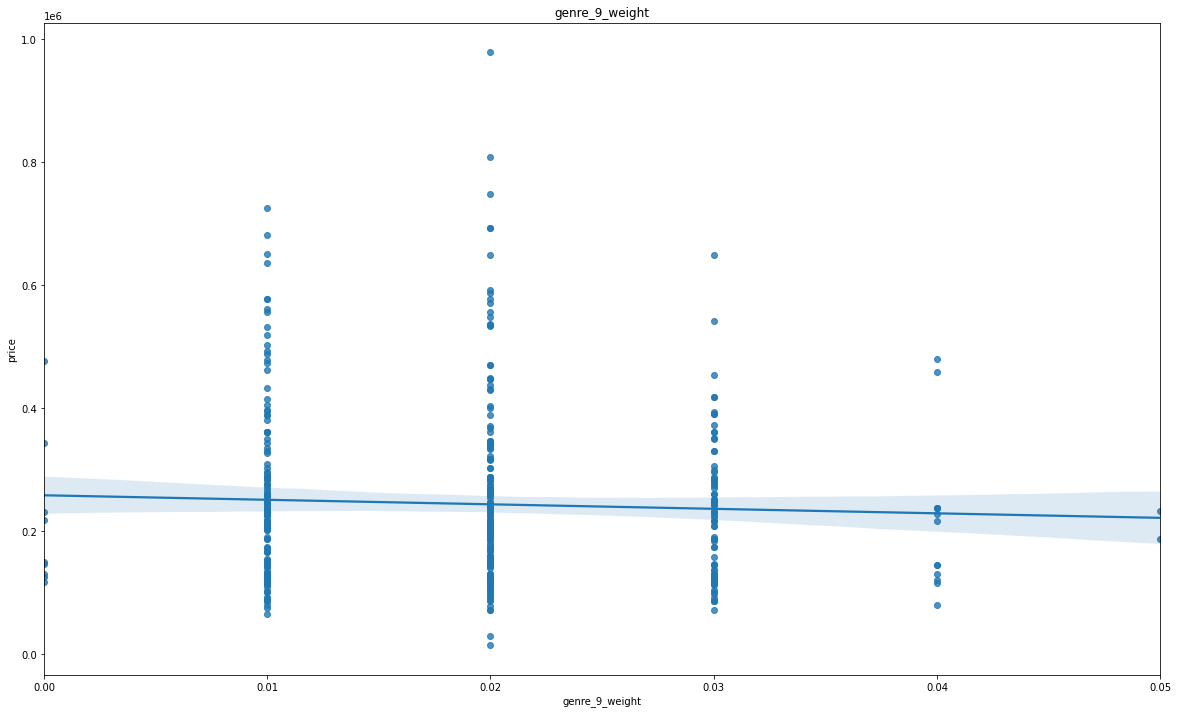

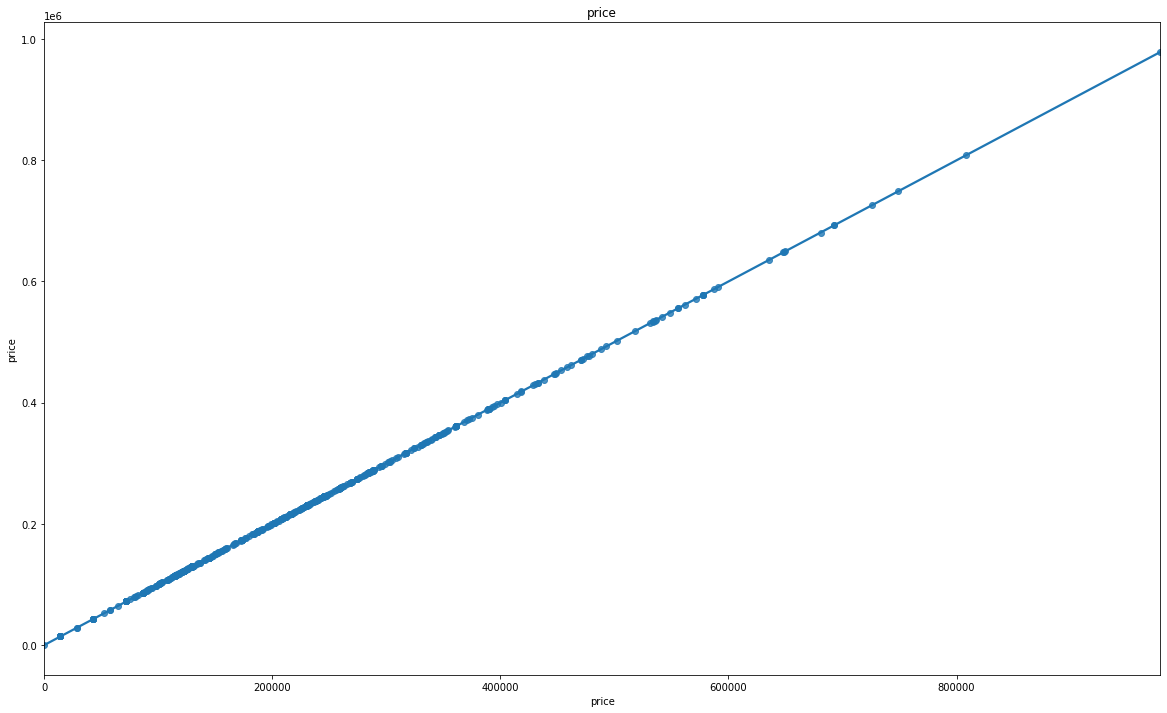

In [ ]:
for i in numerics:
    plt.figure(figsize=(20,12))
    sns.regplot(x = traincp[i],y = traincp['price'])
    plt.title(i)
    plt.show()

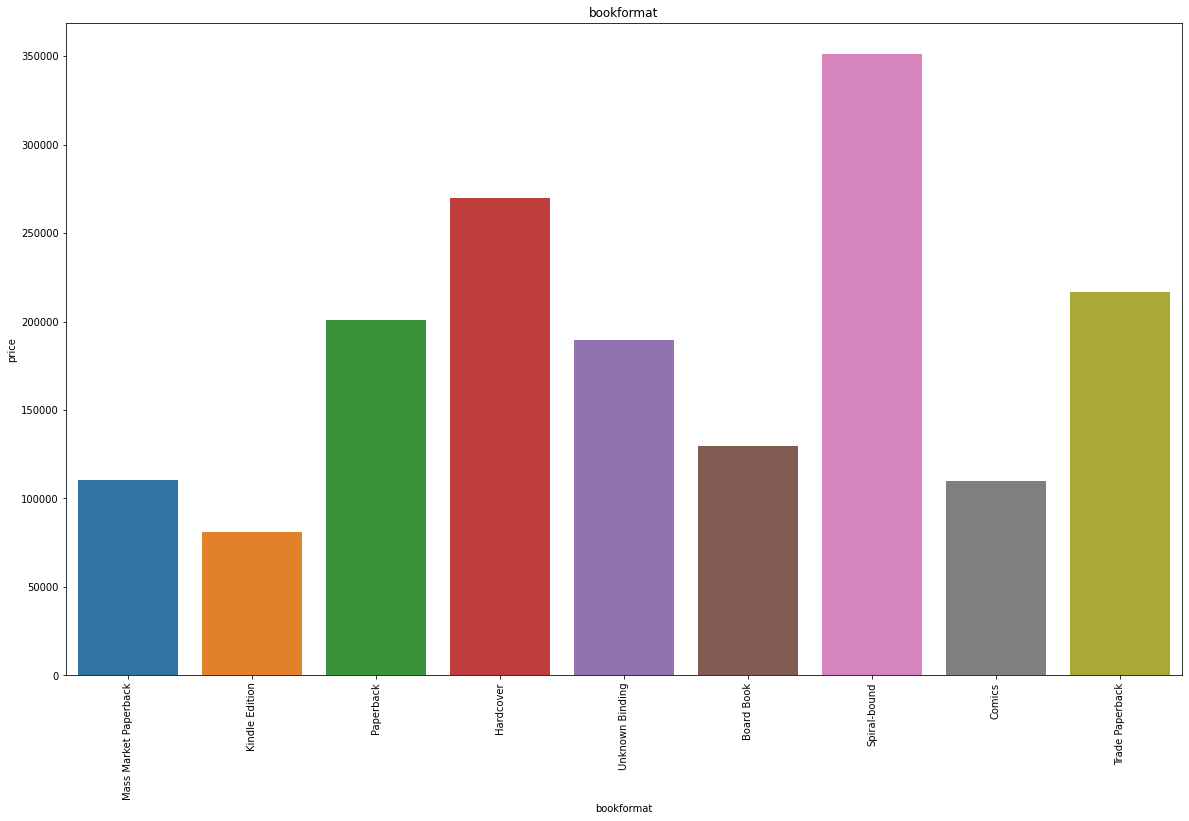

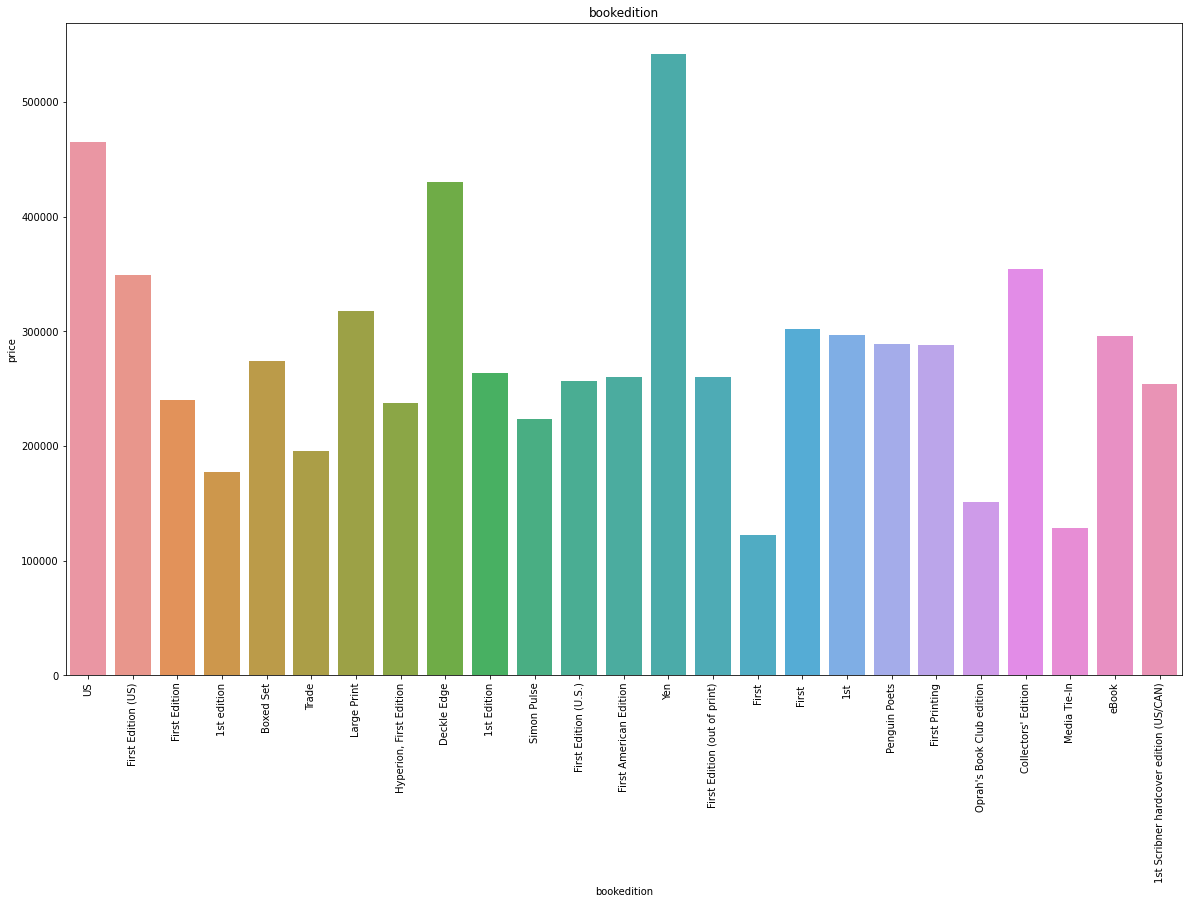

In [ ]:
for i in categorical:
    plt.figure(figsize=(20,12))
    sns.barplot(x = traincp[i],y = traincp['price'],ci=None)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
traincp

author_id  ...     price
9     author0932  ...   98172.0
17    author2279  ...   57604.0
29    author2386  ...  103658.0
33    author2769  ...  649665.0
44    author0473  ...  247883.0
...          ...  ...       ...
3518  author1012  ...  262176.0
3522  author0083  ...  216411.0
3529  author0975  ...  152310.0
3538  author0034  ...  176853.0
3541  author1187  ...  216555.0

[543 rows x 39 columns]

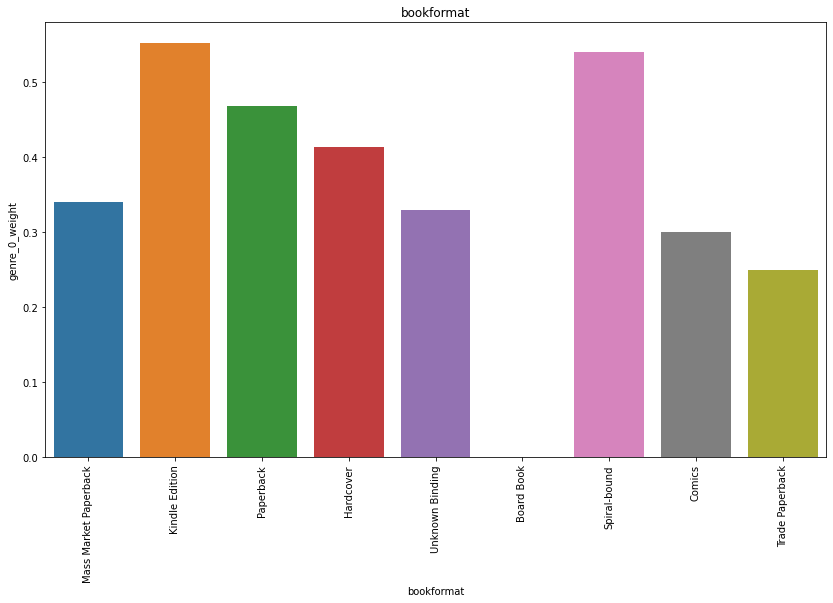

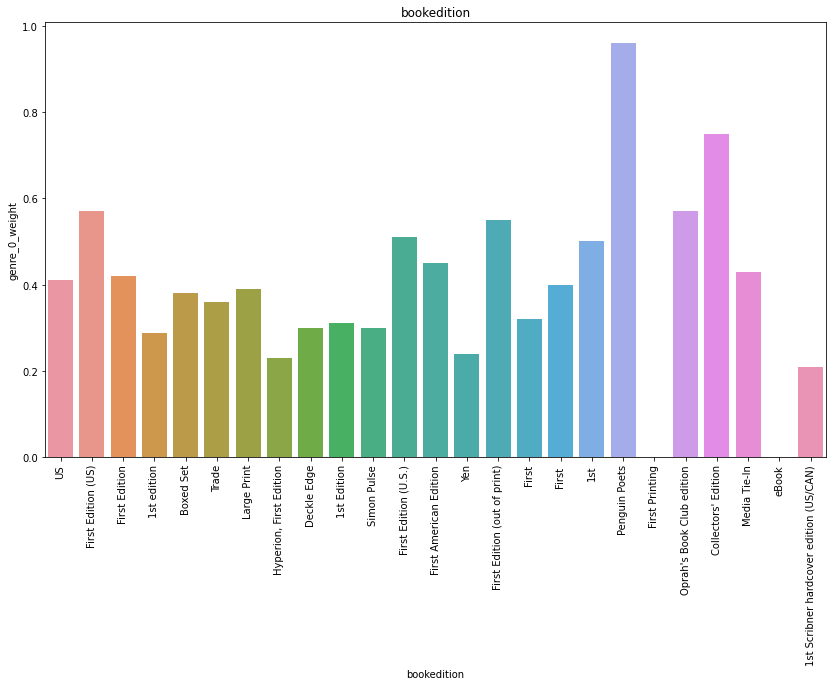

In [ ]:
# By its weight_0
for i in categorical:
    plt.figure(figsize=(14,8))
    sns.barplot(x = traincp[i],y = traincp['genre_0_weight'],ci=None)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

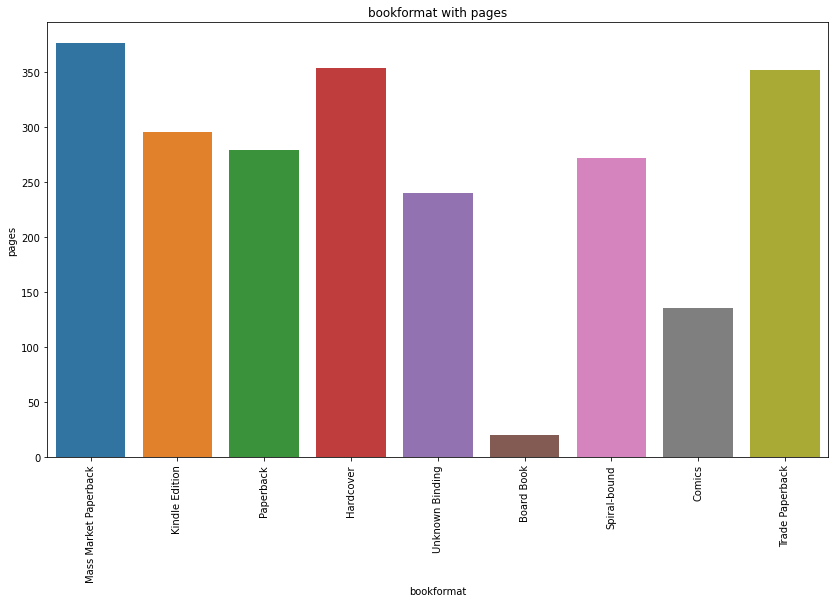

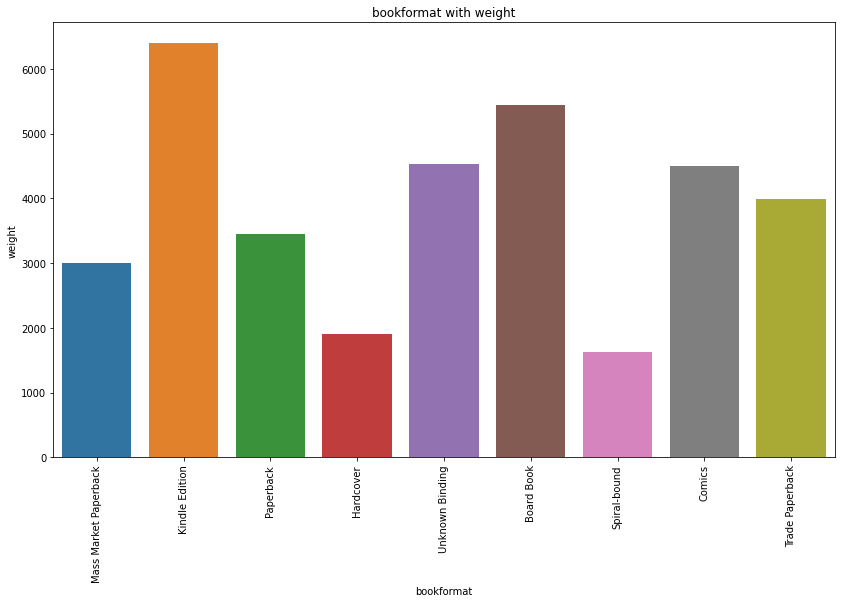

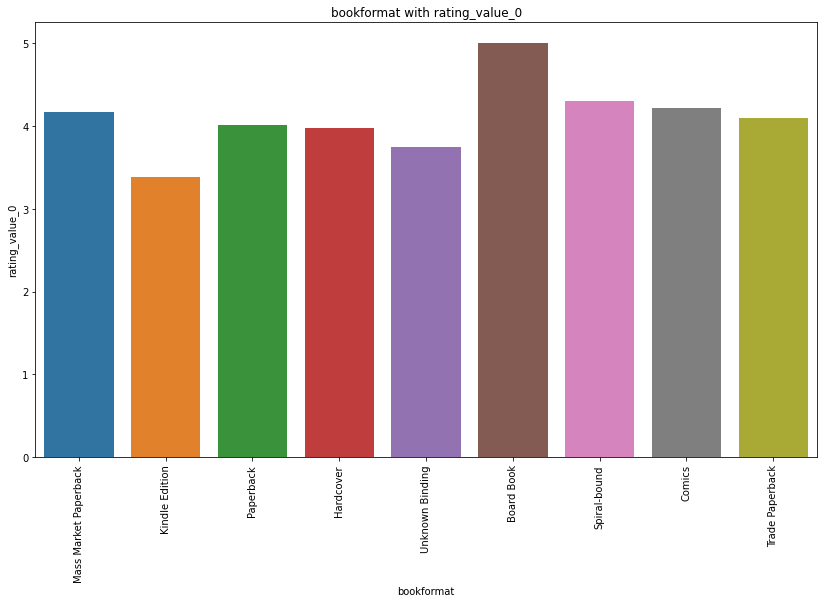

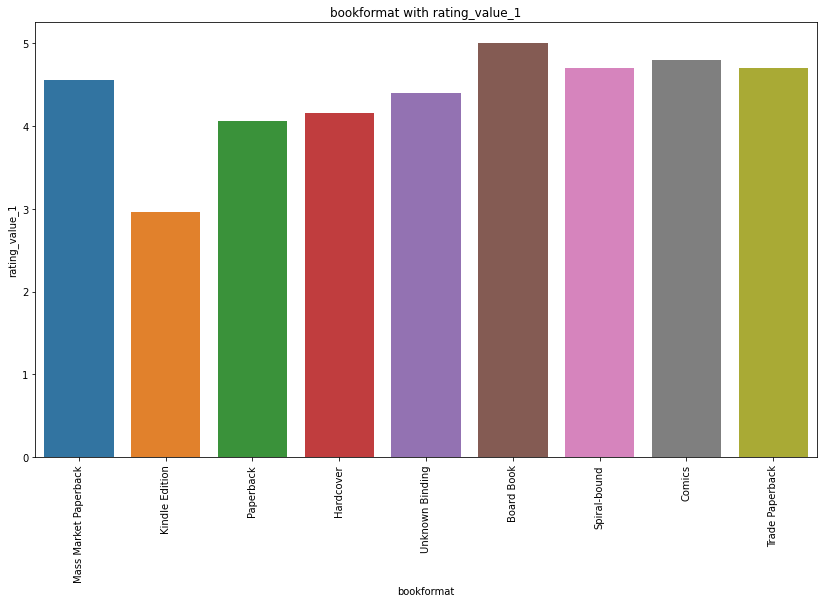

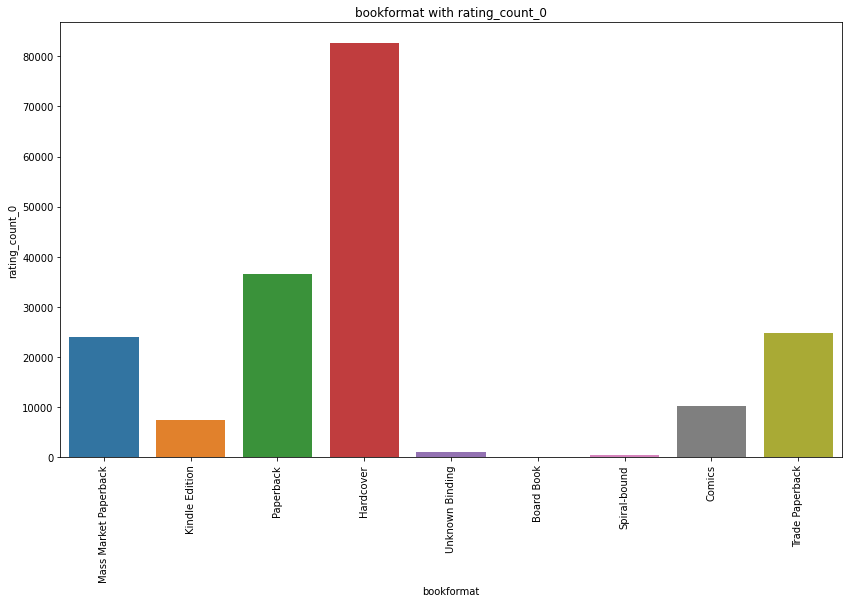

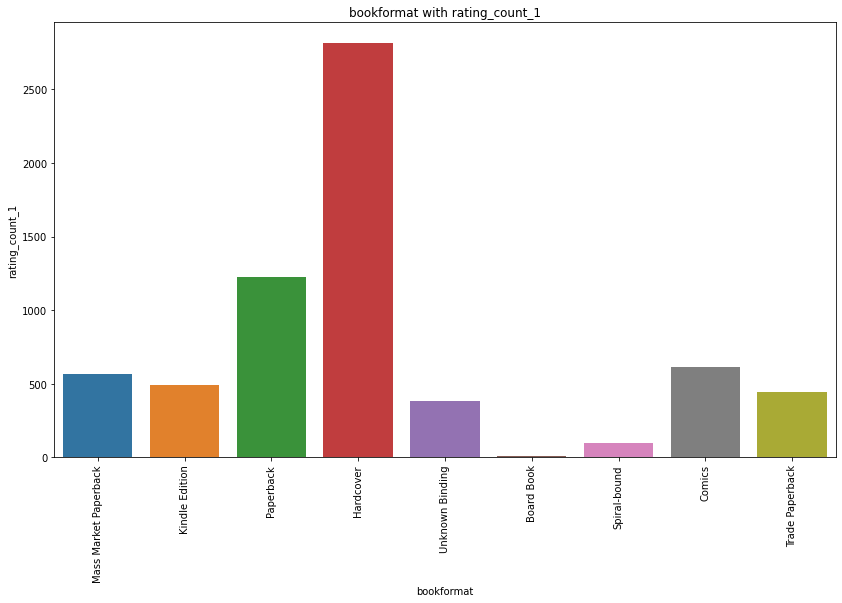

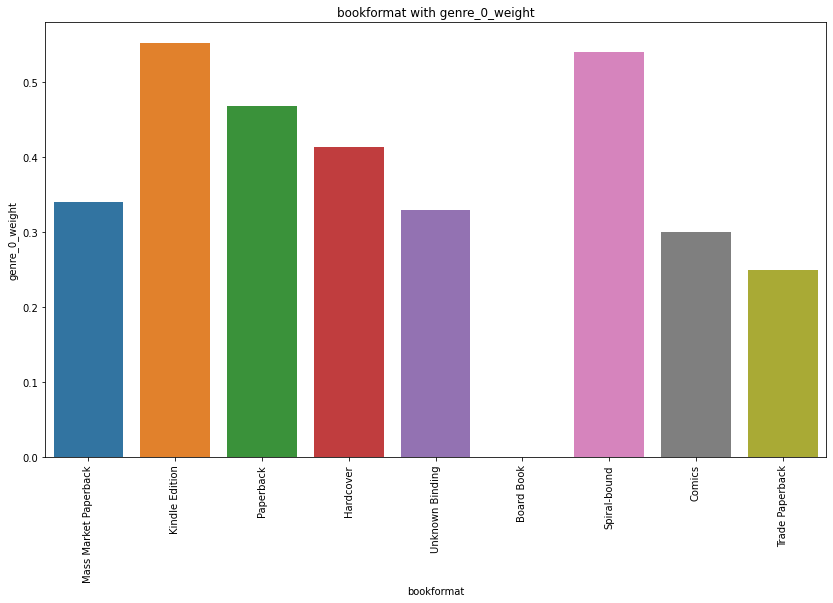

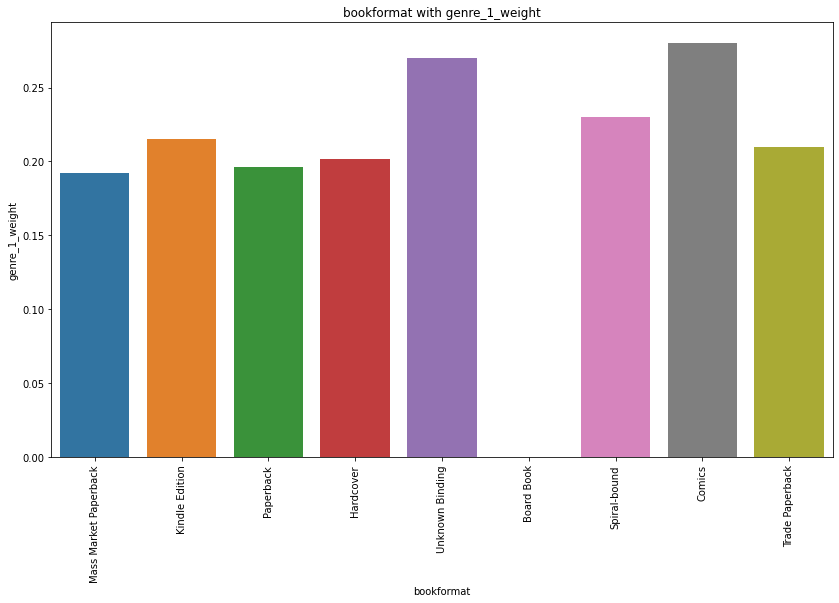

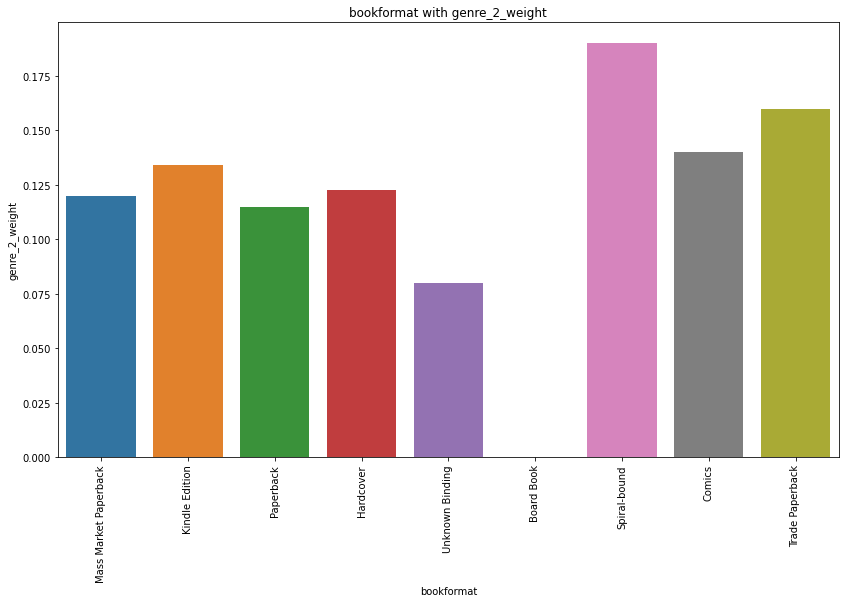

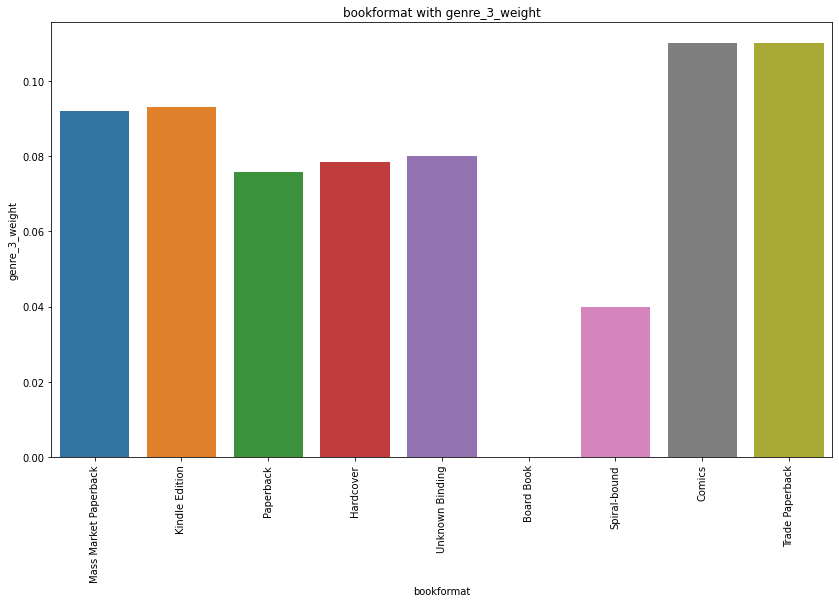

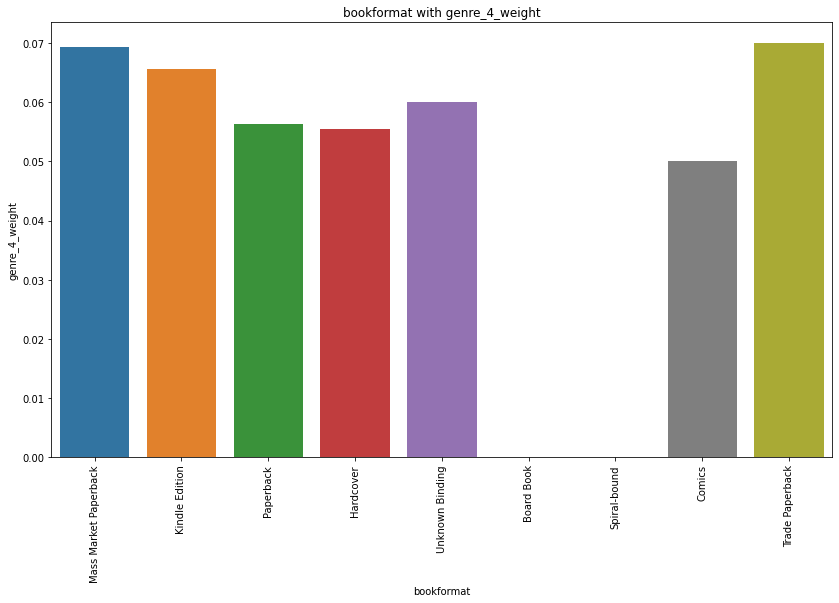

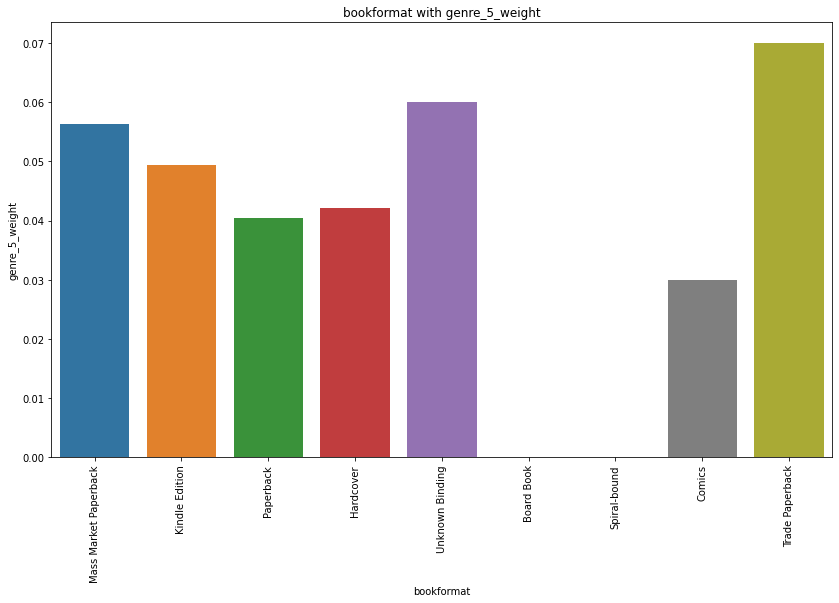

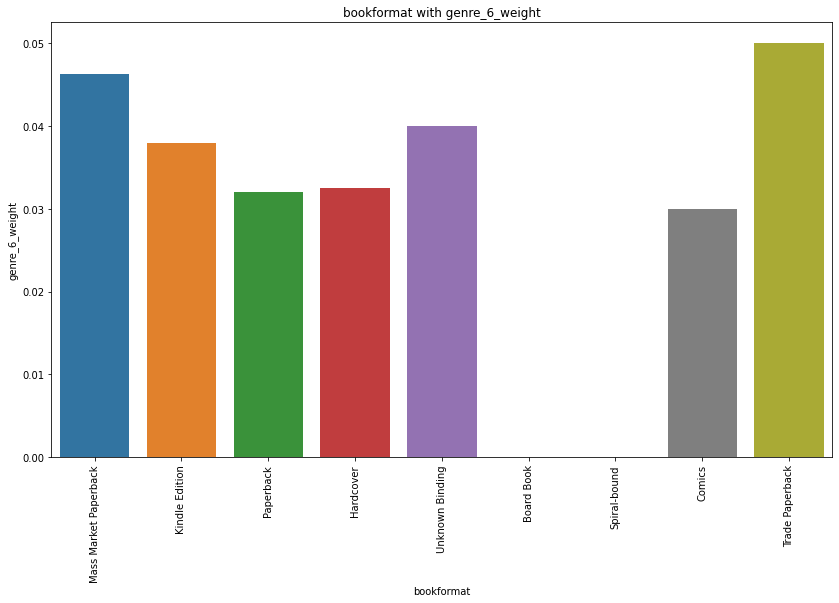

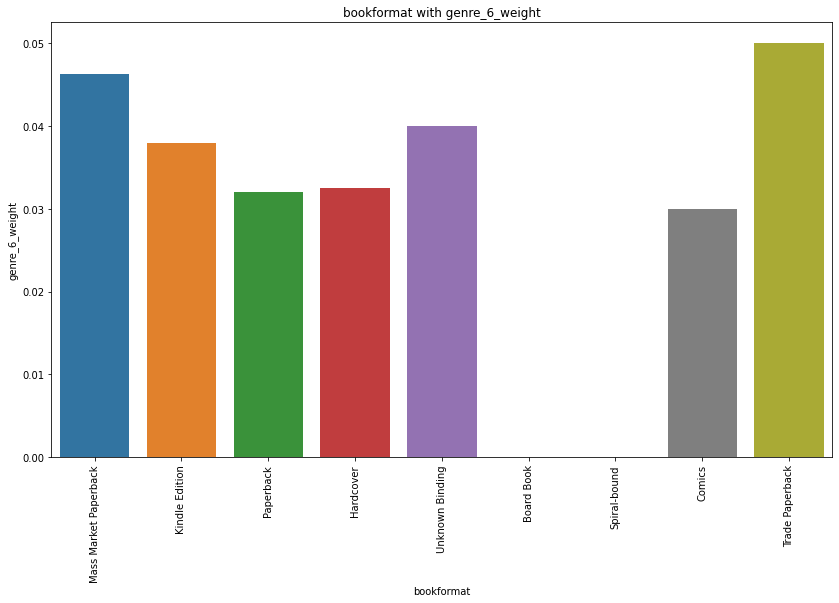

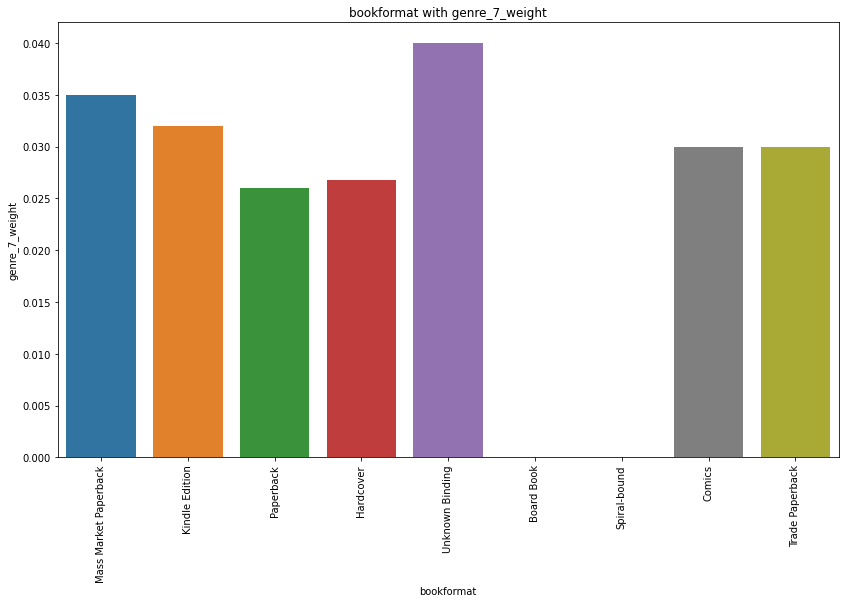

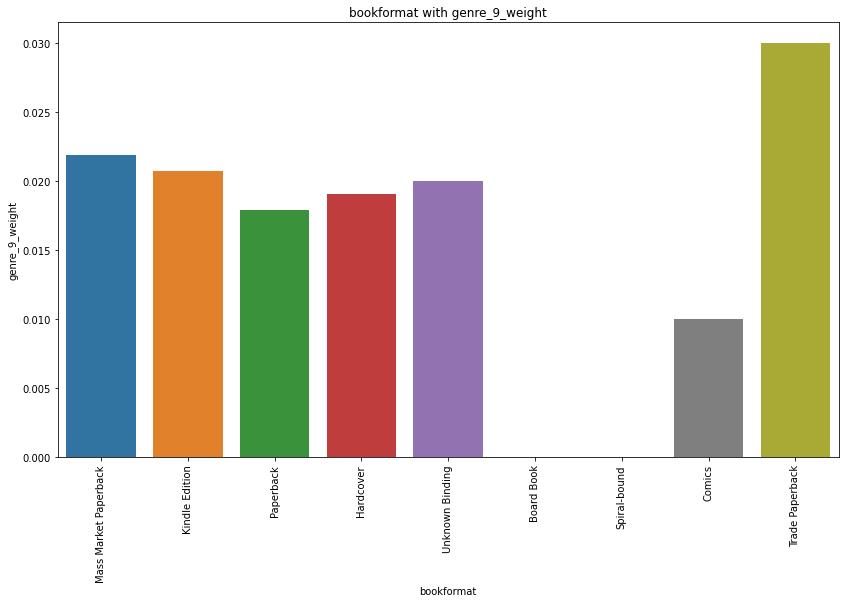

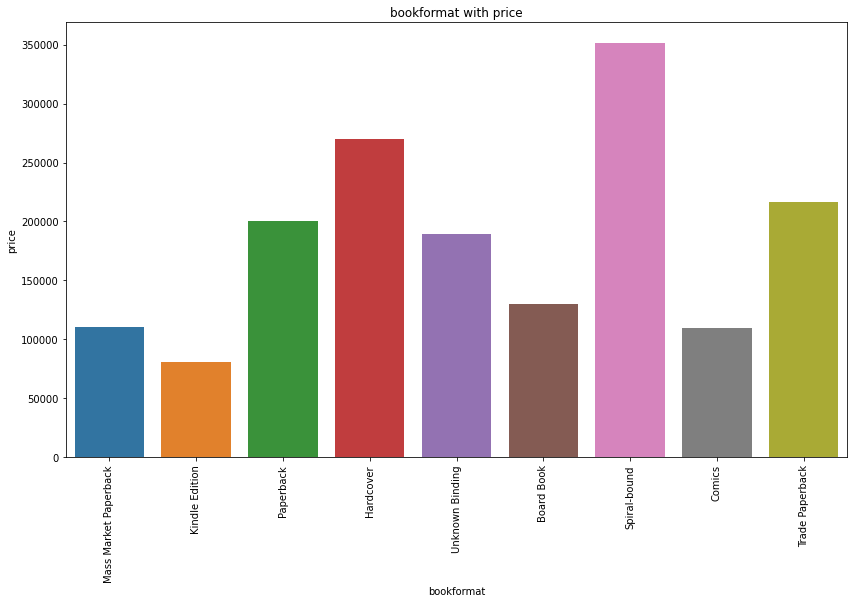

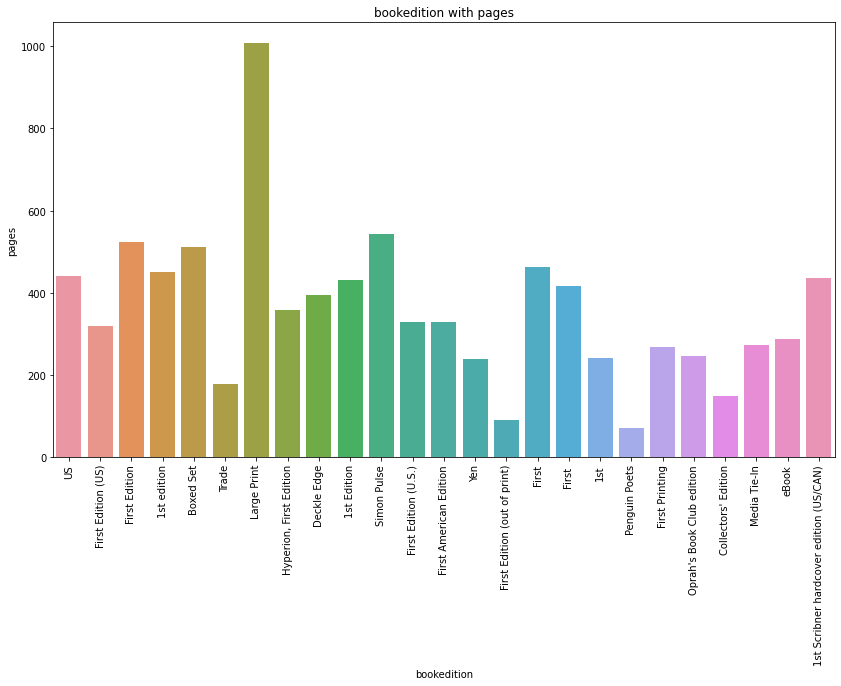

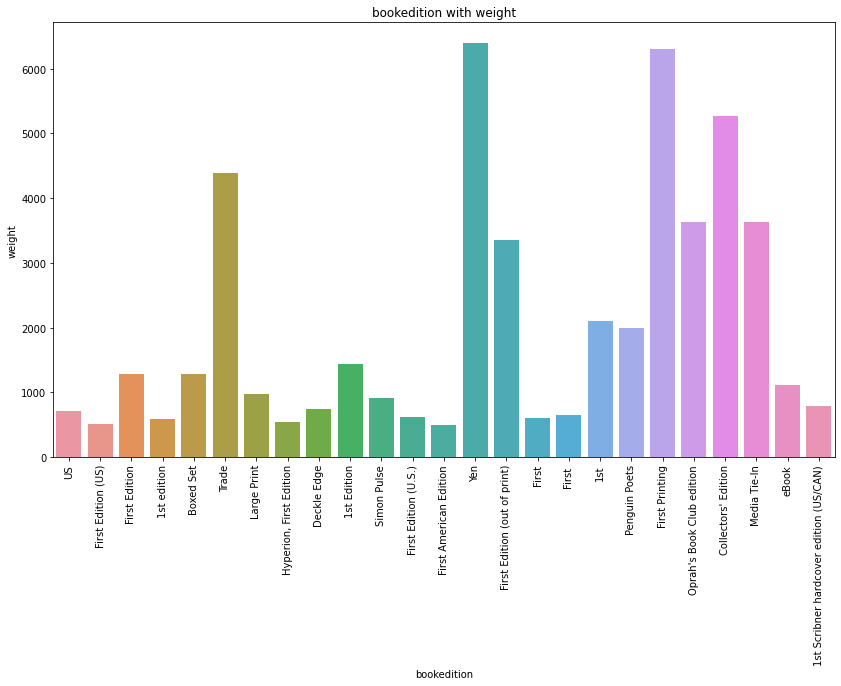

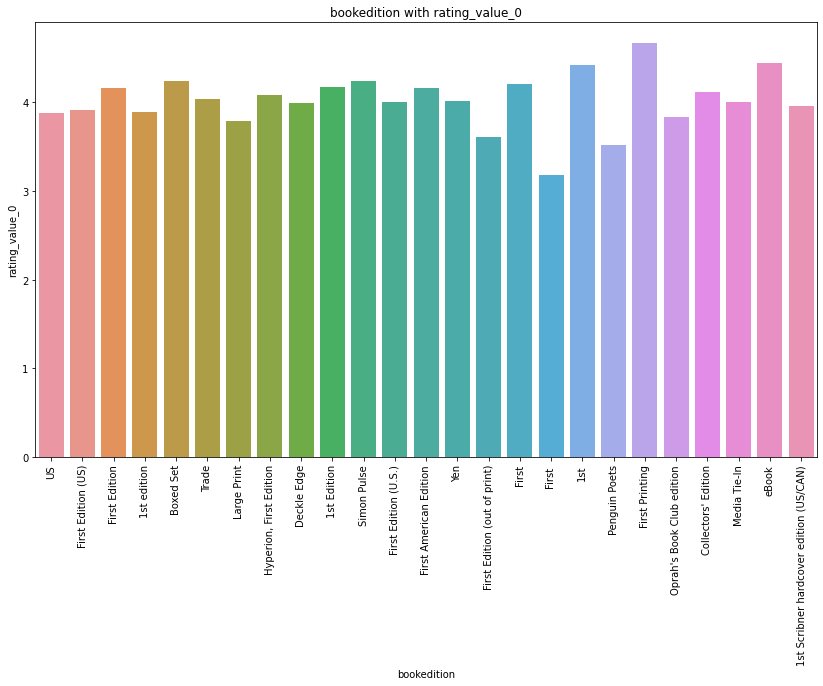

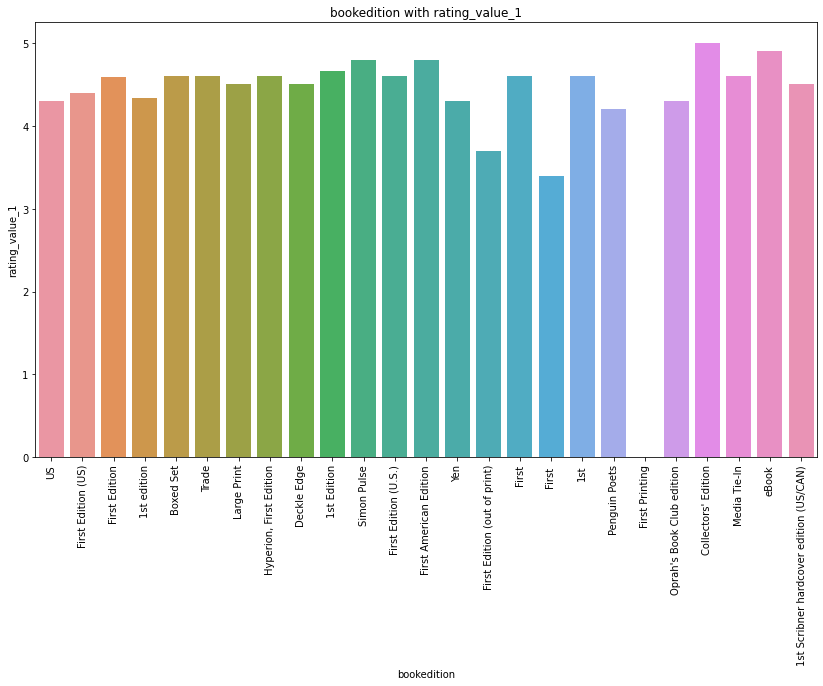

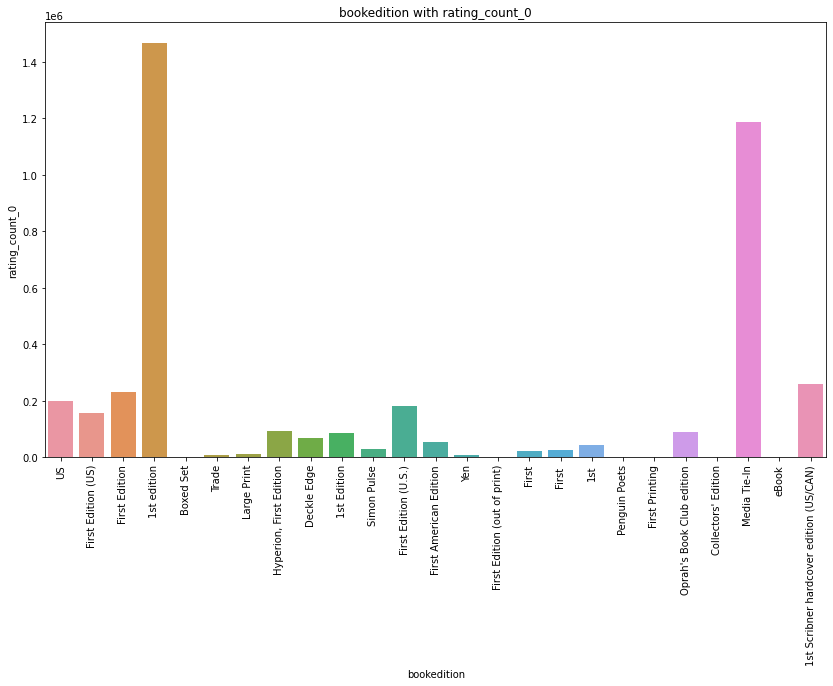

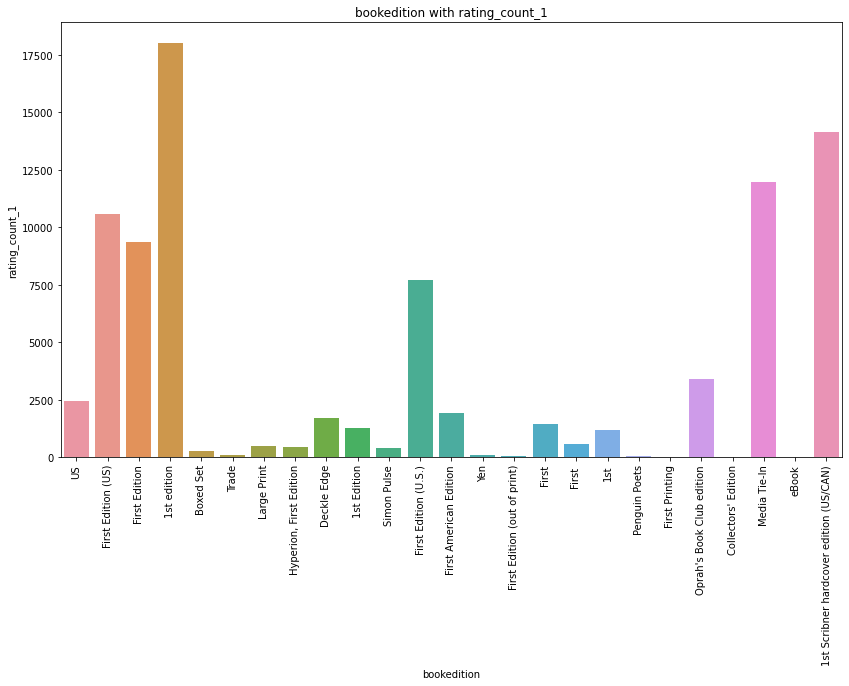

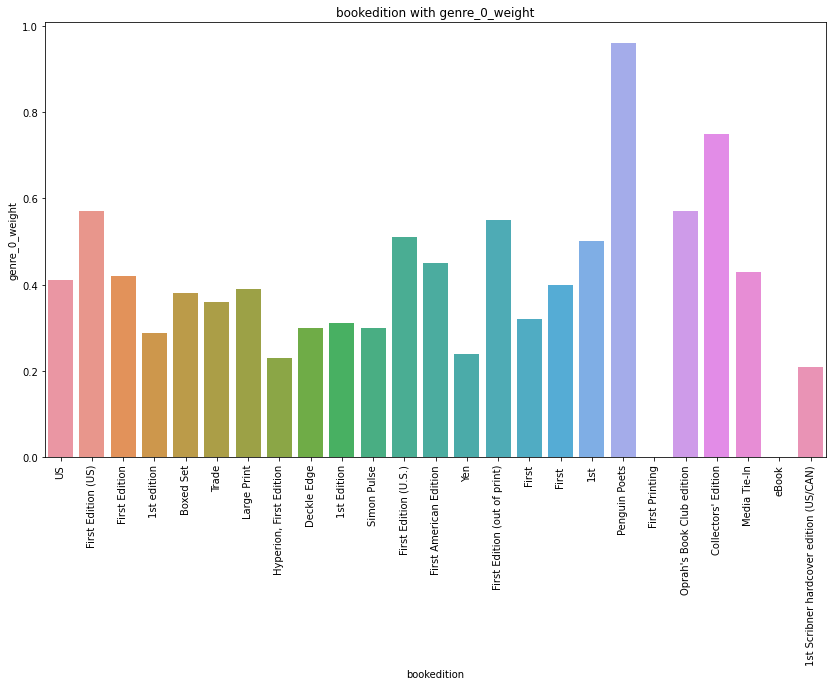

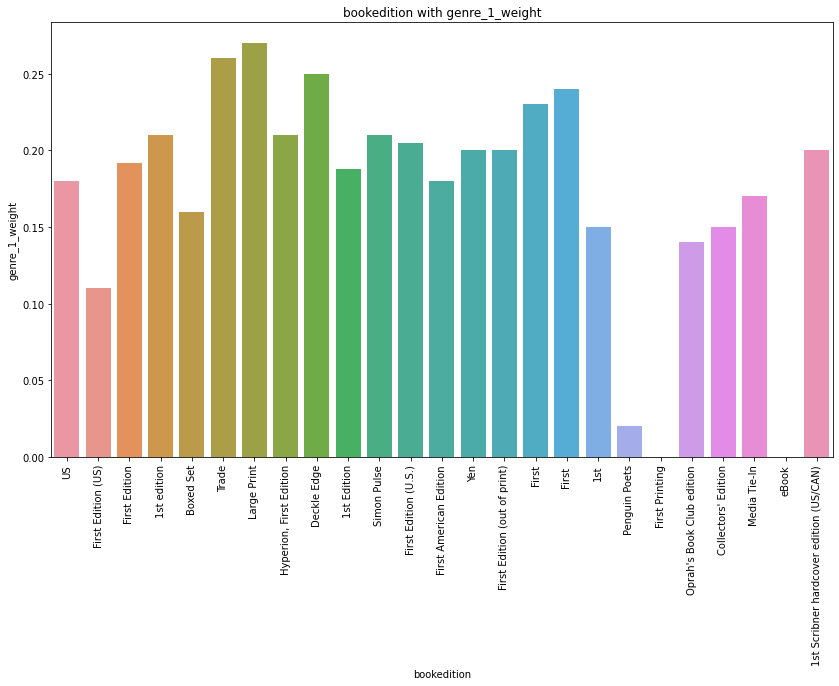

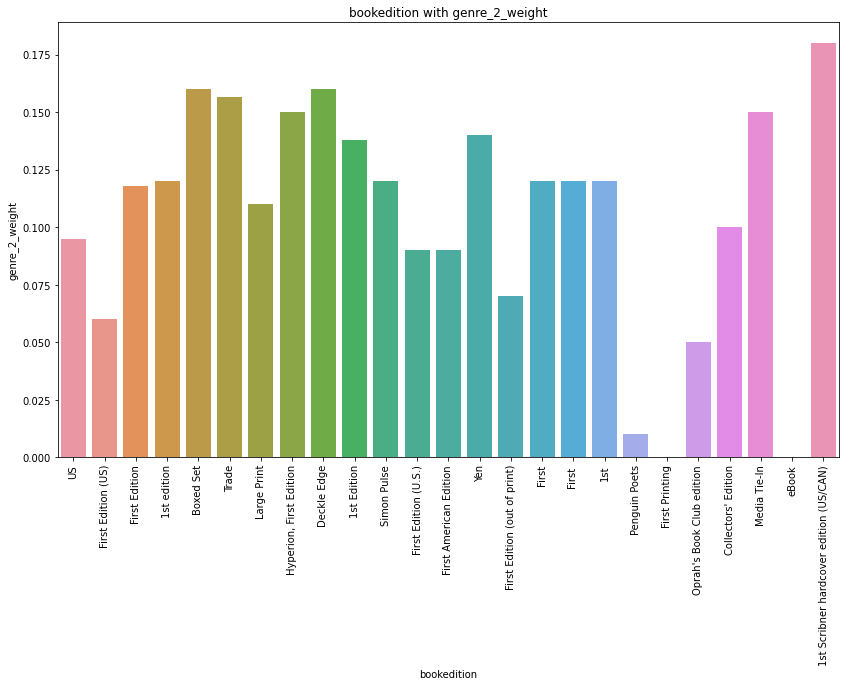

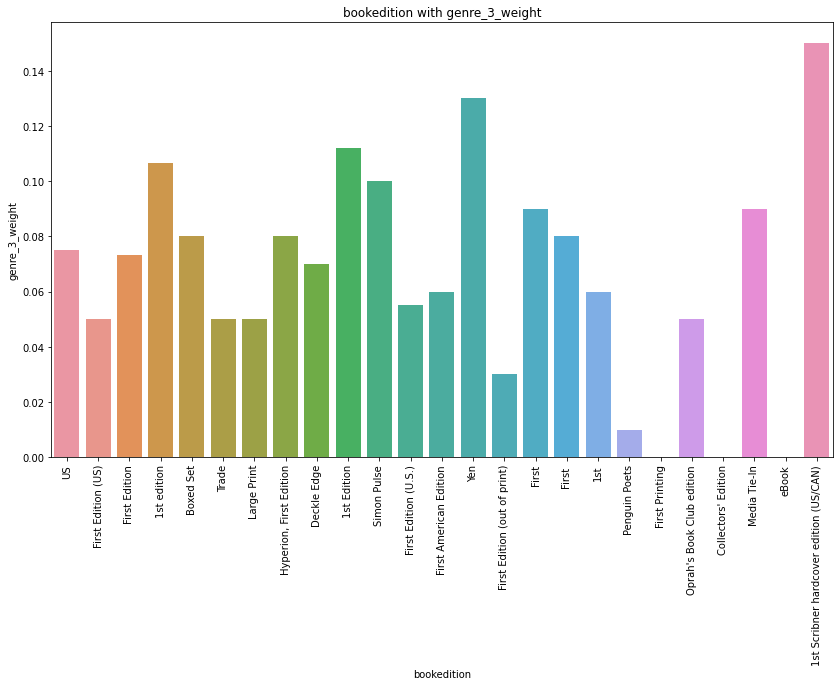

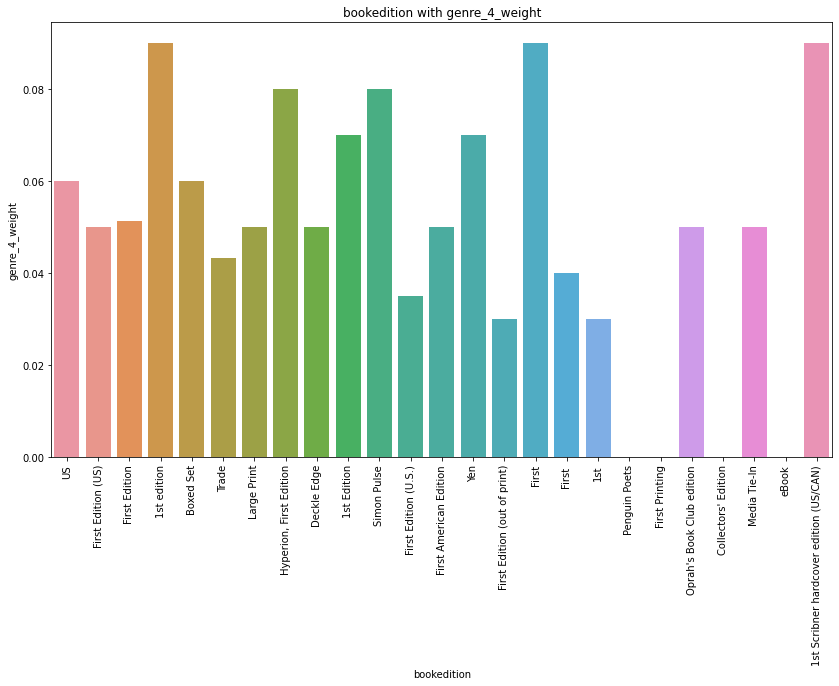

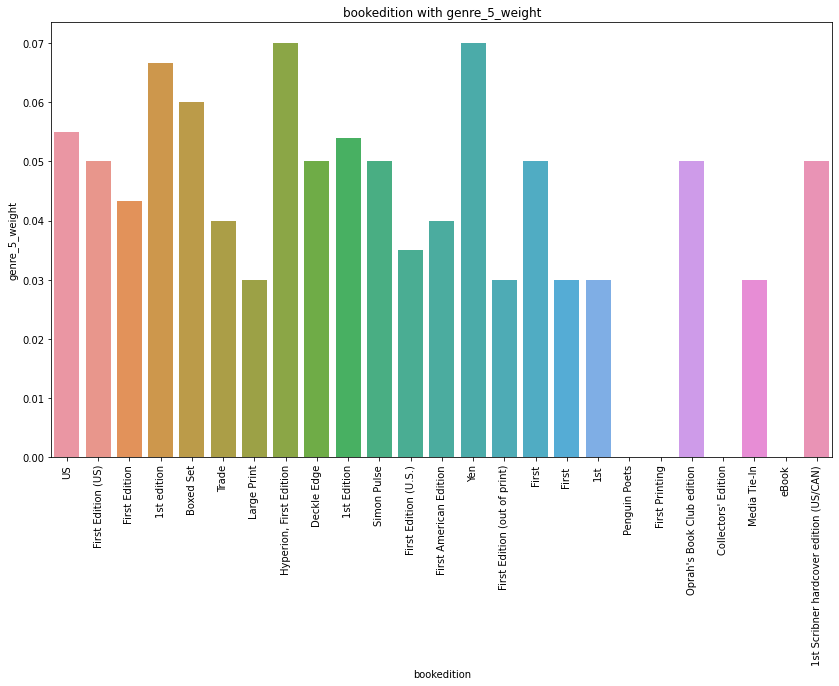

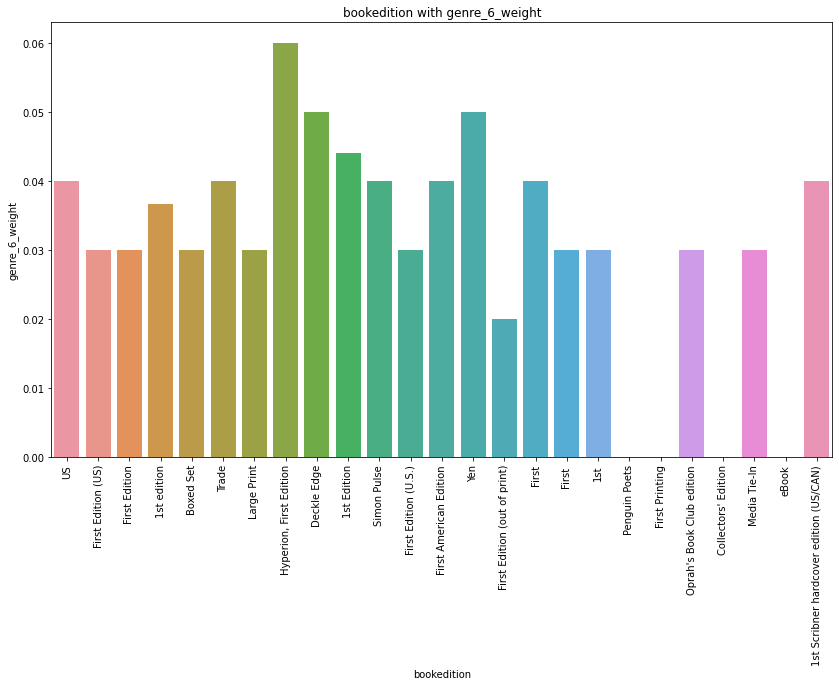

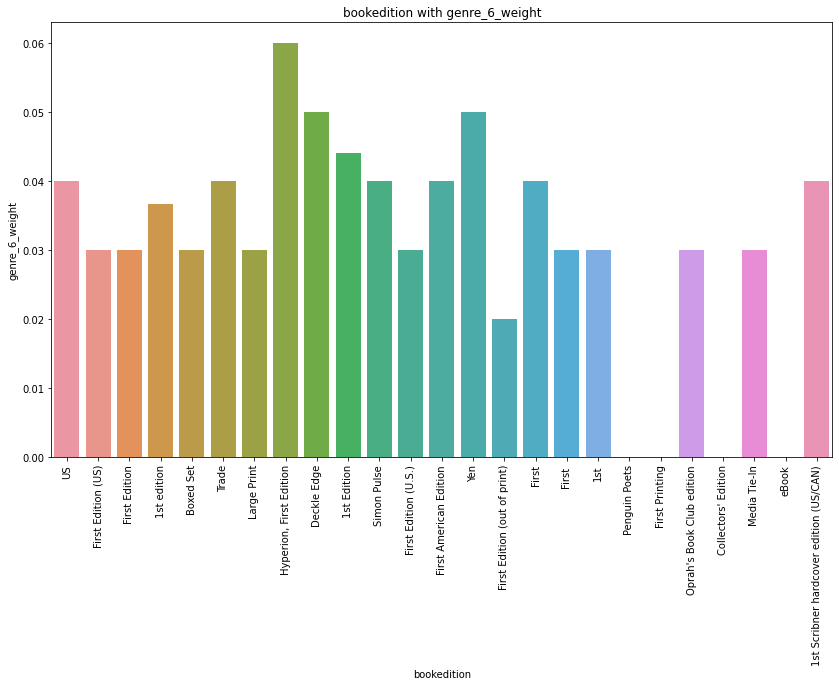

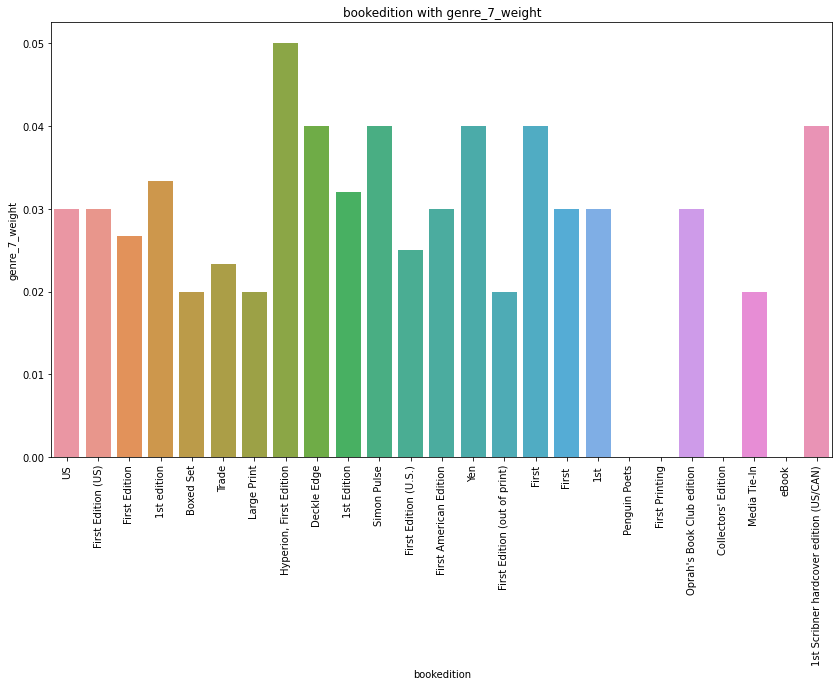

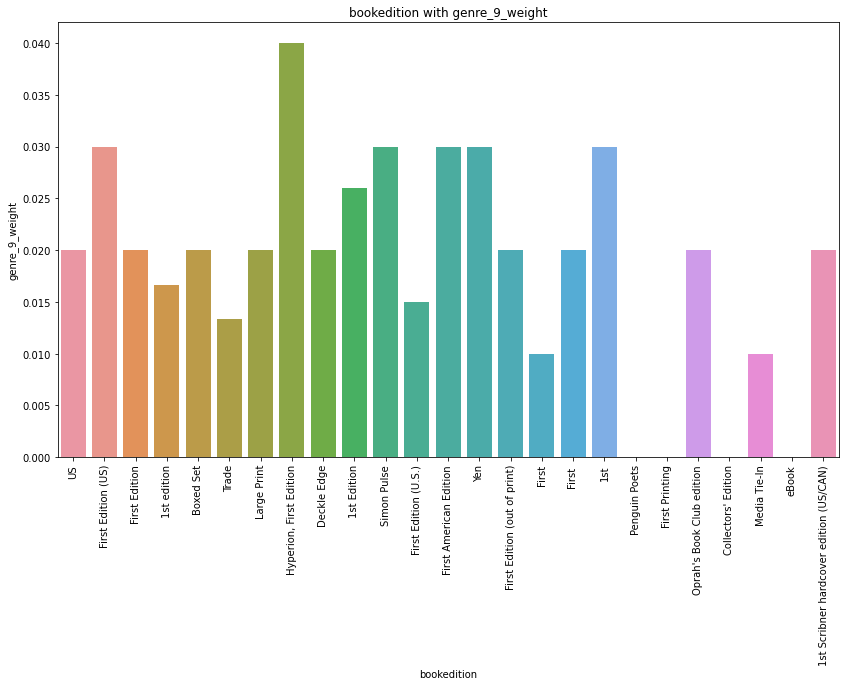

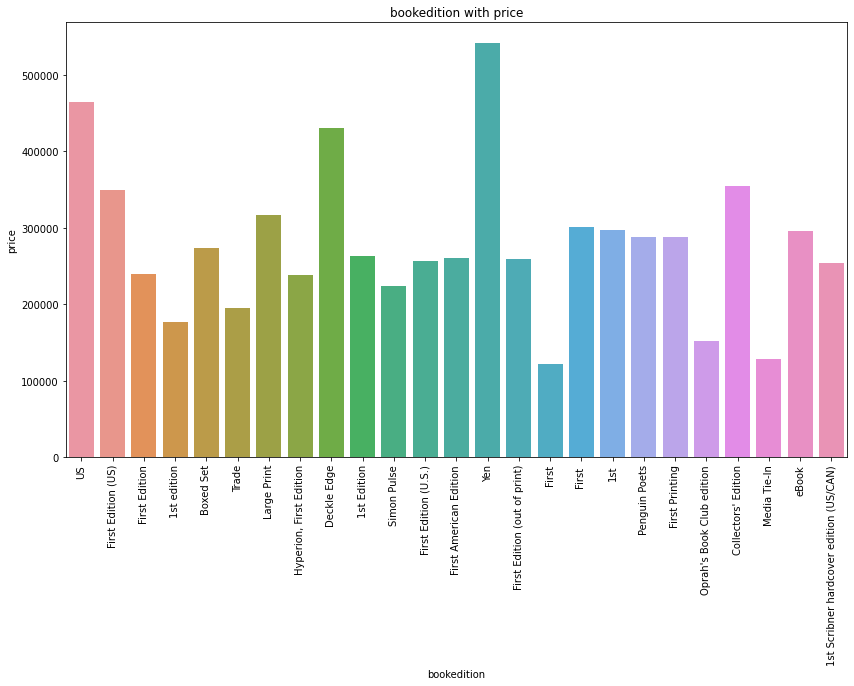

In [ ]:
# By its weight_0
for i in categorical:
    for j in numerics:
        plt.figure(figsize=(14,8))
        sns.barplot(x = traincp[i],y = traincp[j],ci=None)
        plt.title(i + " with " + j)
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
np.mean(traincp[traincp["bookformat"] =="Kindle Edition"]["weight"])

6395.65

In [ ]:
np.mean(traincp[traincp["bookformat"] =="Spiral-bound"]["genre_0_weight"])

0.54

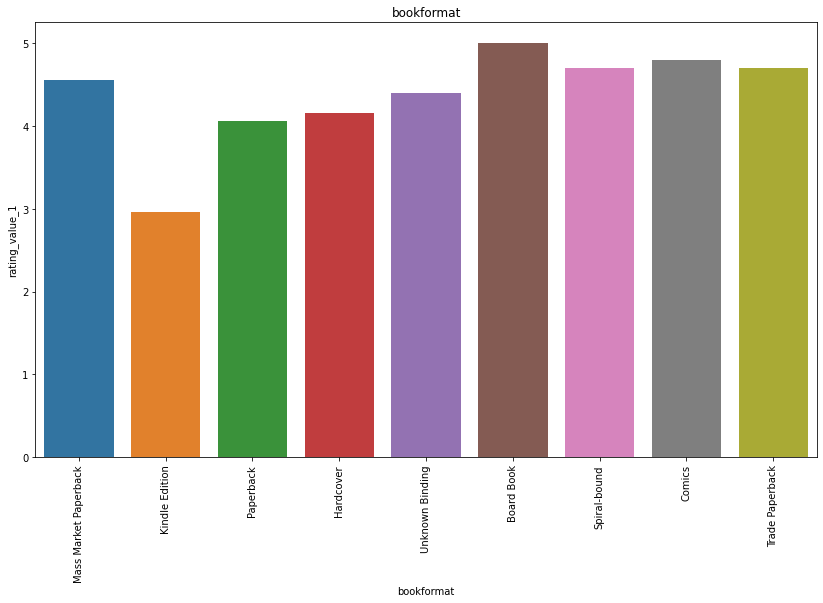

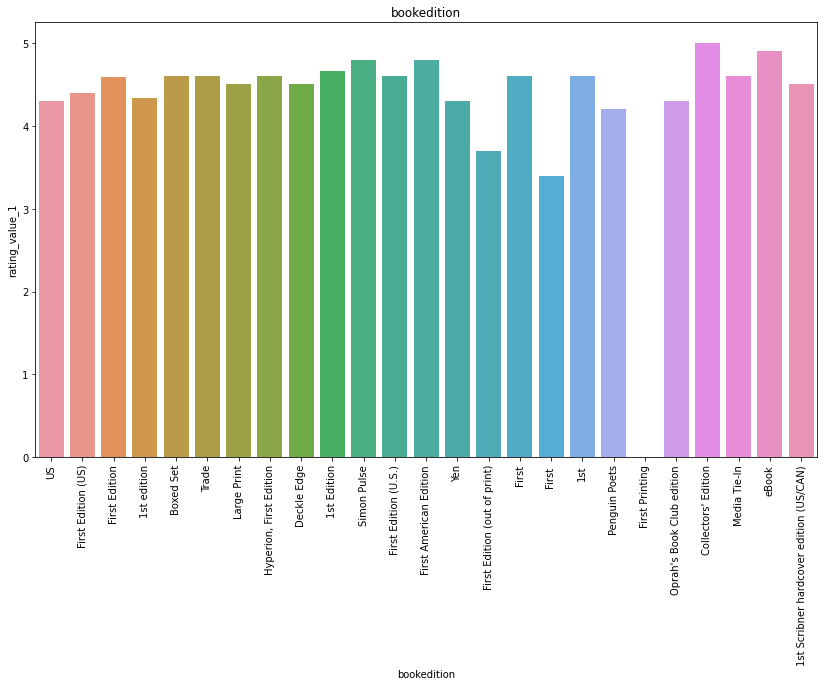

In [ ]:
for i in categorical:
    plt.figure(figsize=(14,8))
    sns.barplot(x = traincp[i],y = traincp['rating_value_1'],ci=None)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

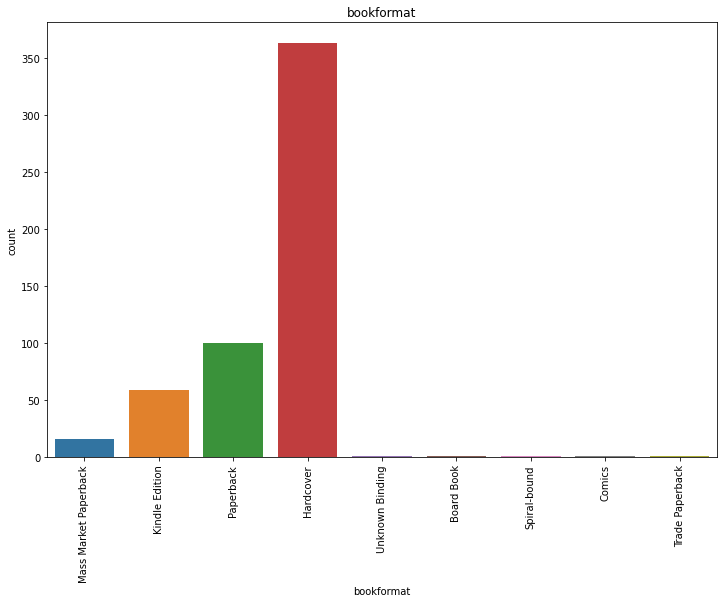

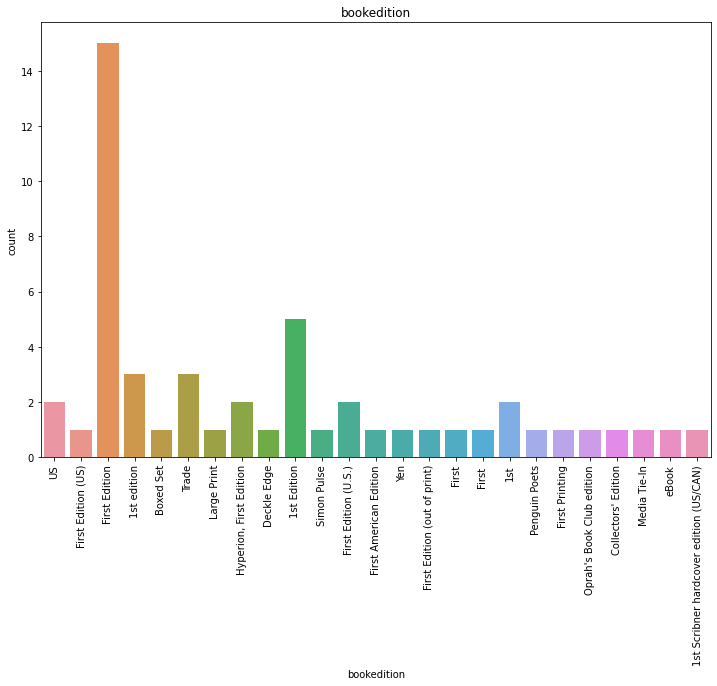

In [ ]:
for i in categorical:
    plt.figure(figsize=(12,8))
    sns.countplot(x = traincp[i])
    plt.title(i )
    plt.xticks(rotation=90)
    plt.show()

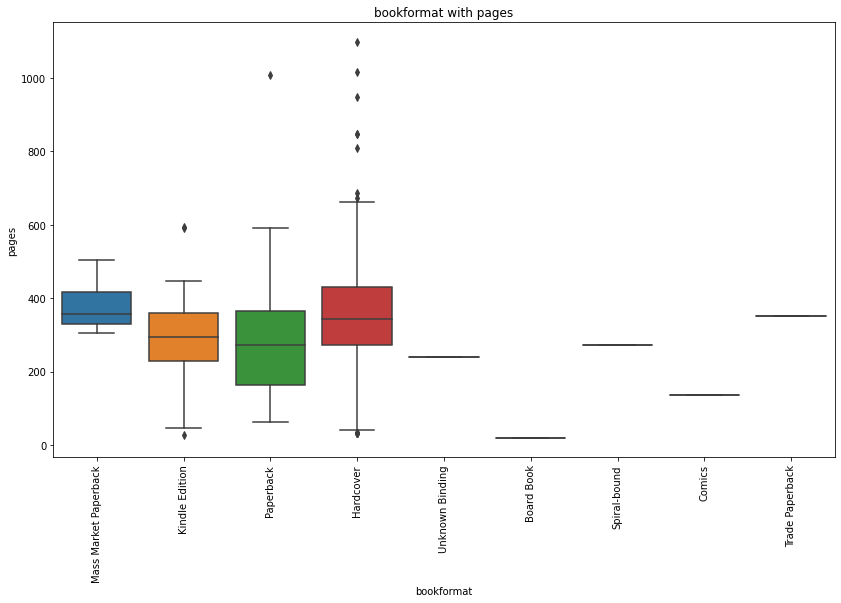

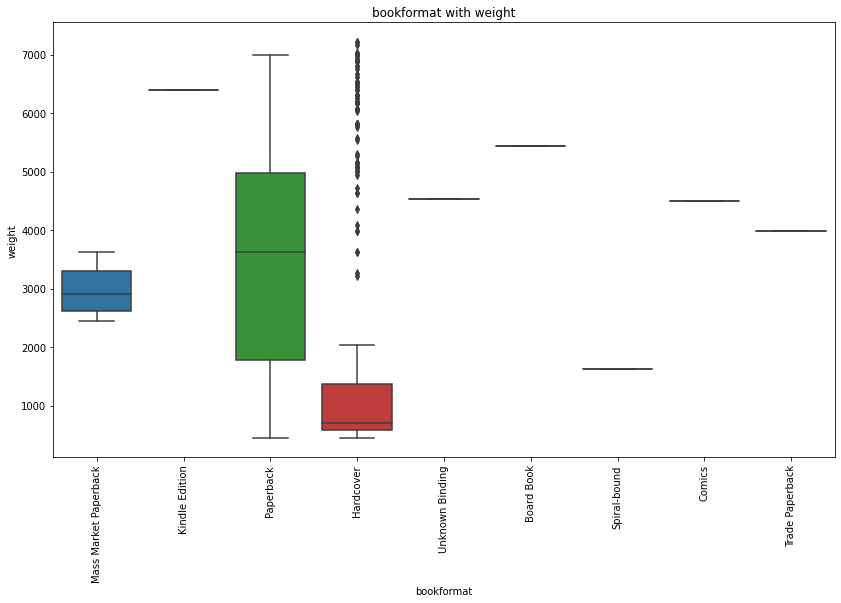

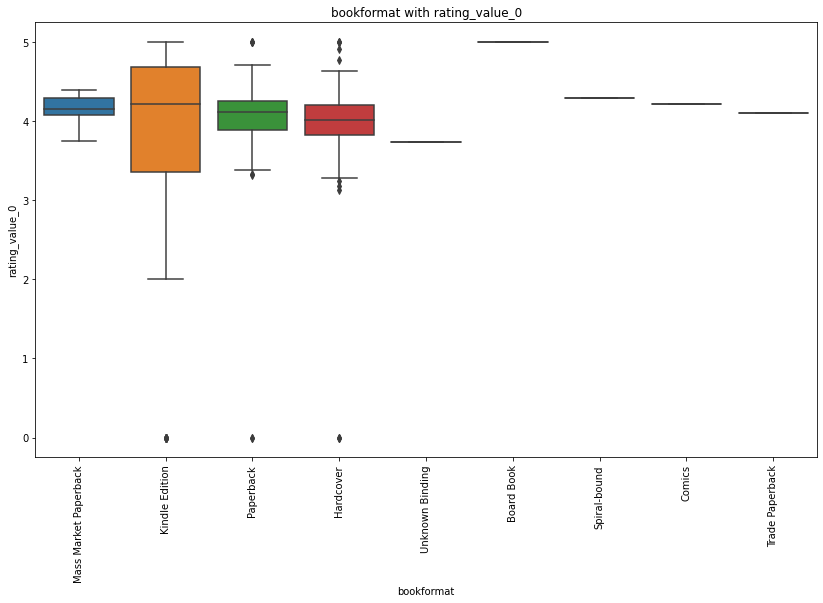

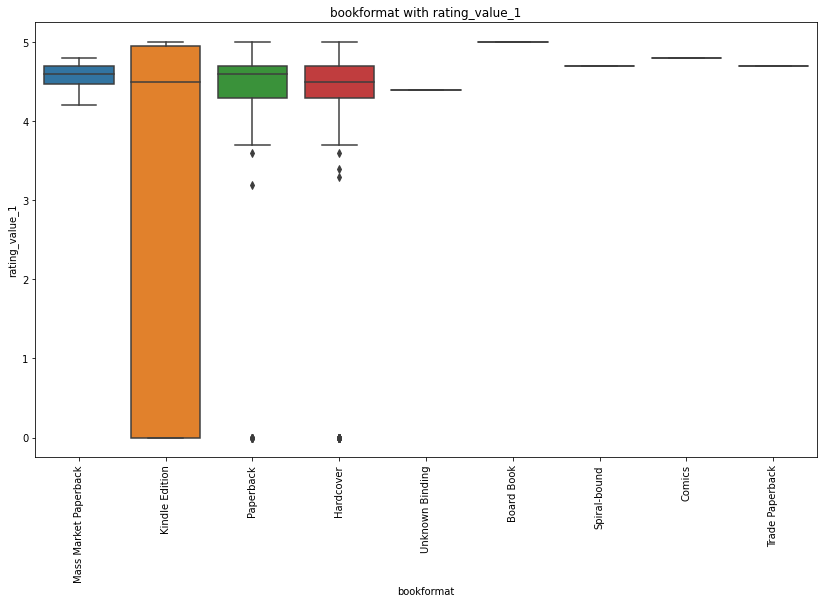

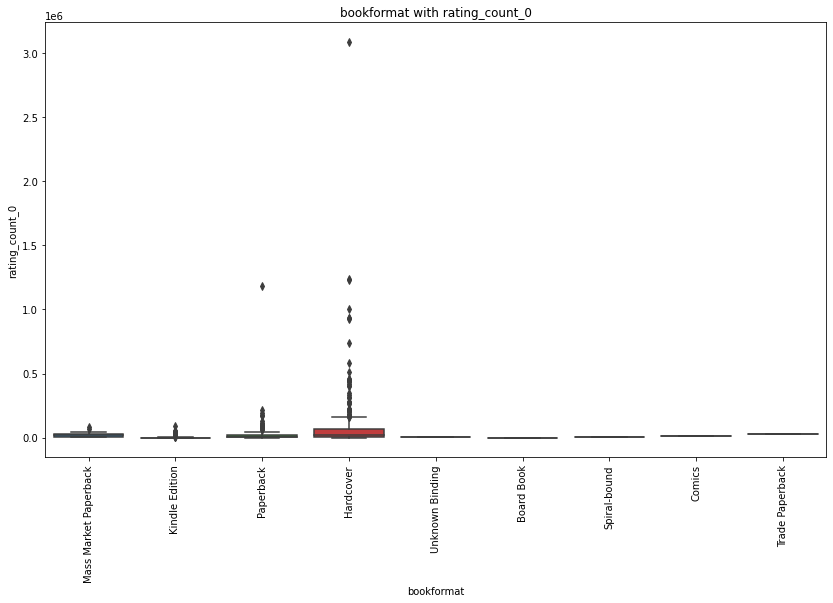

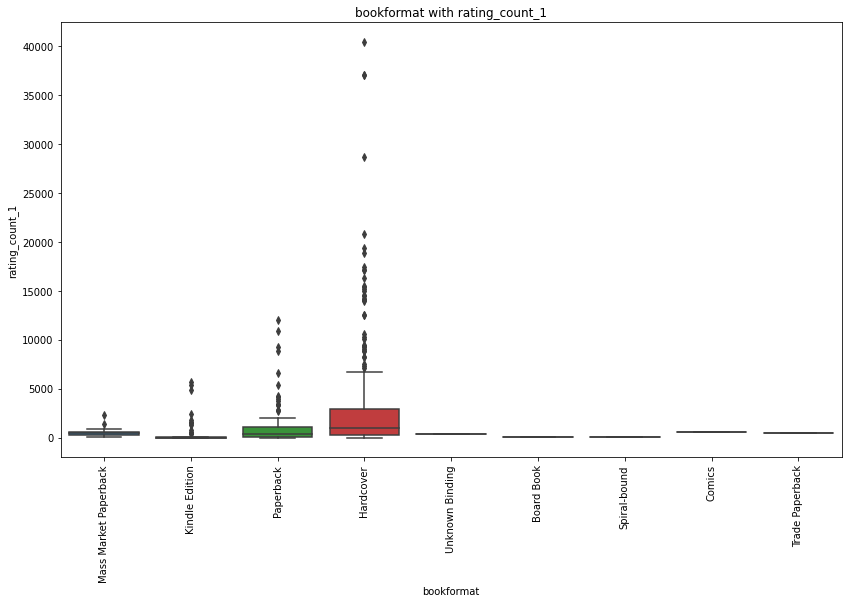

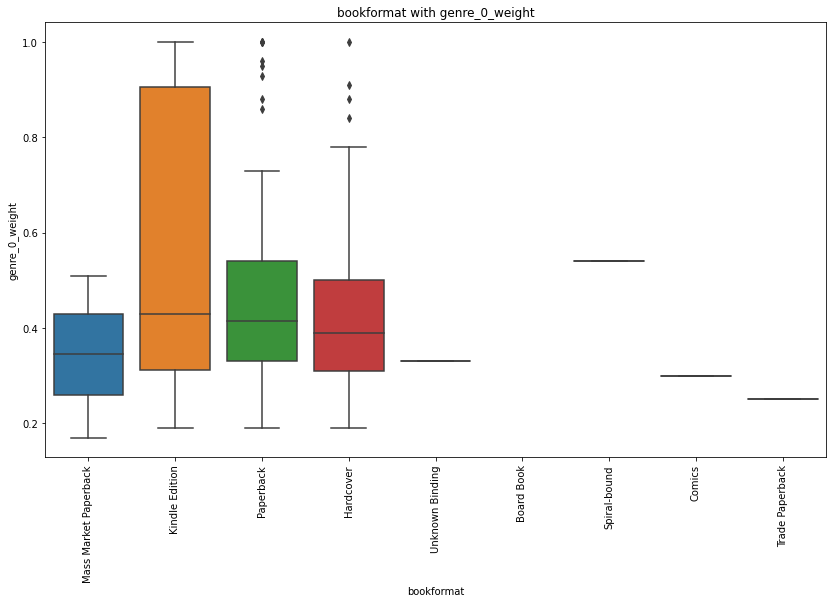

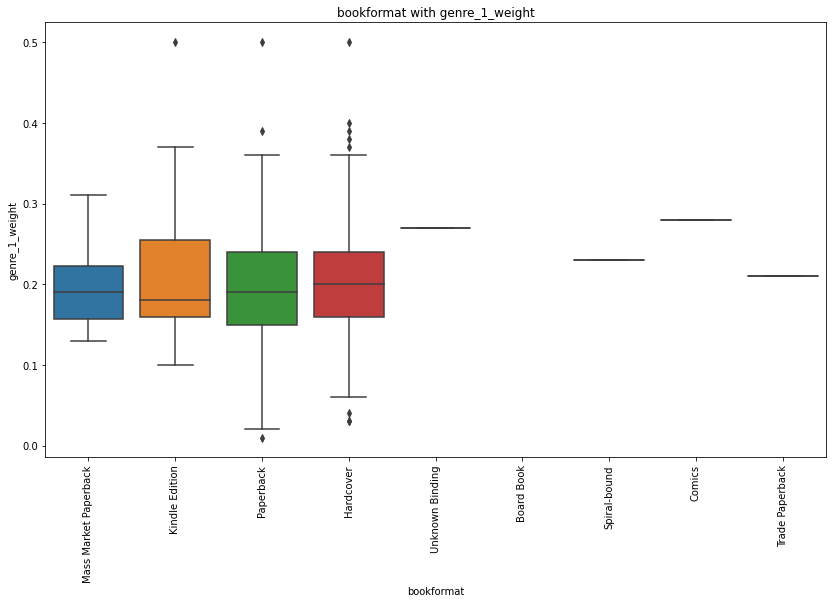

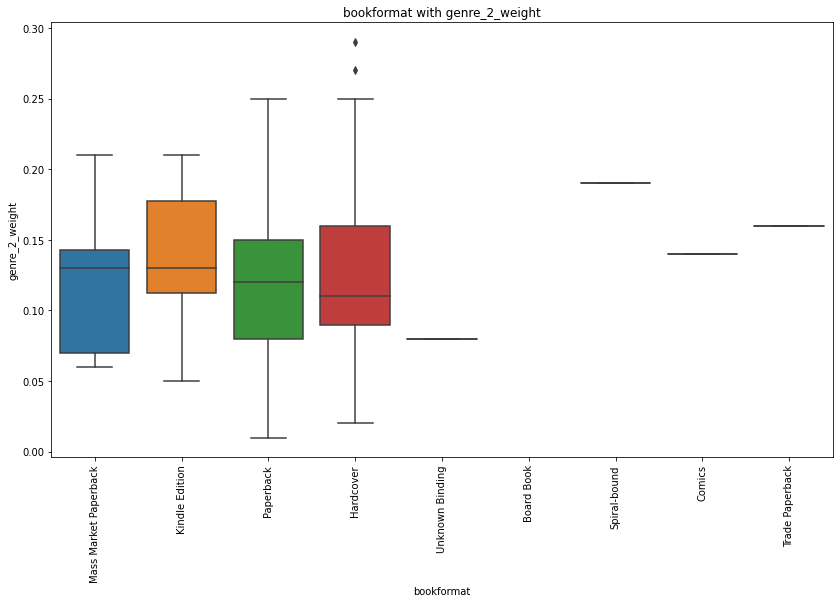

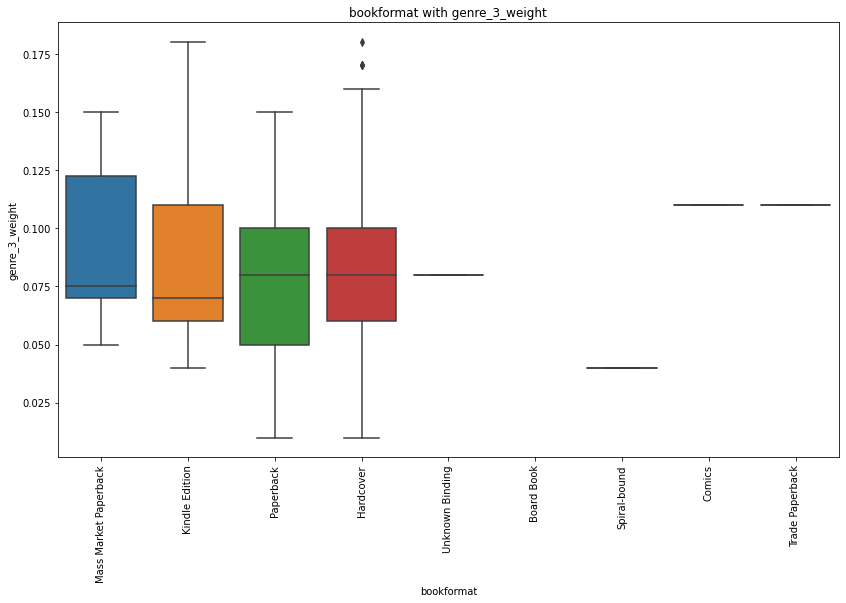

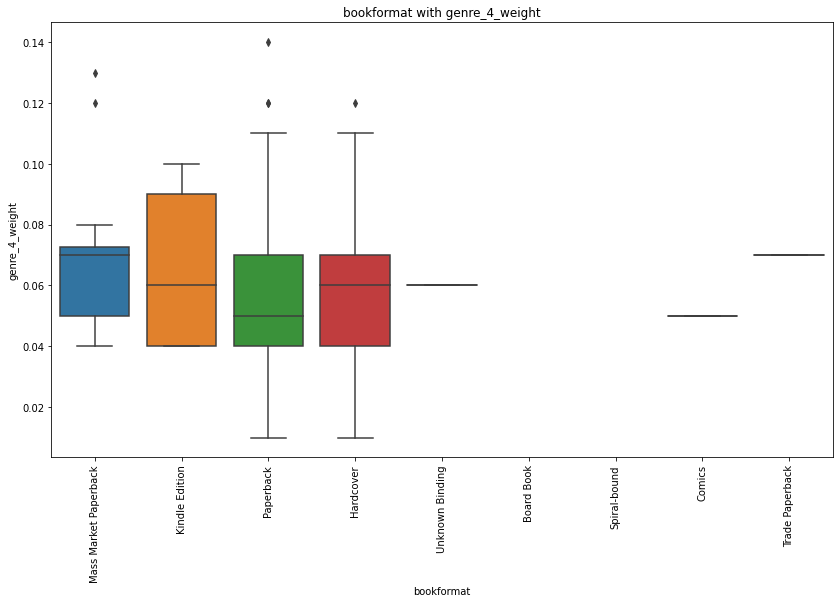

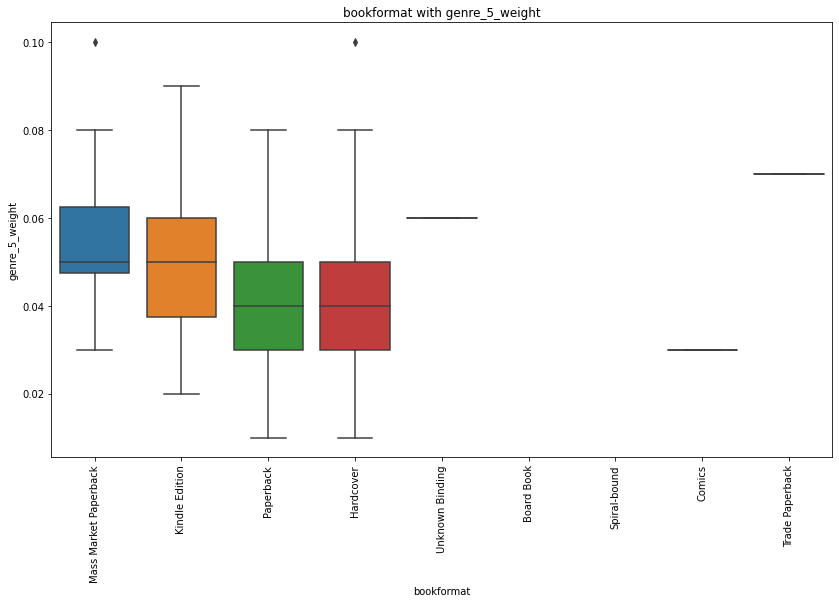

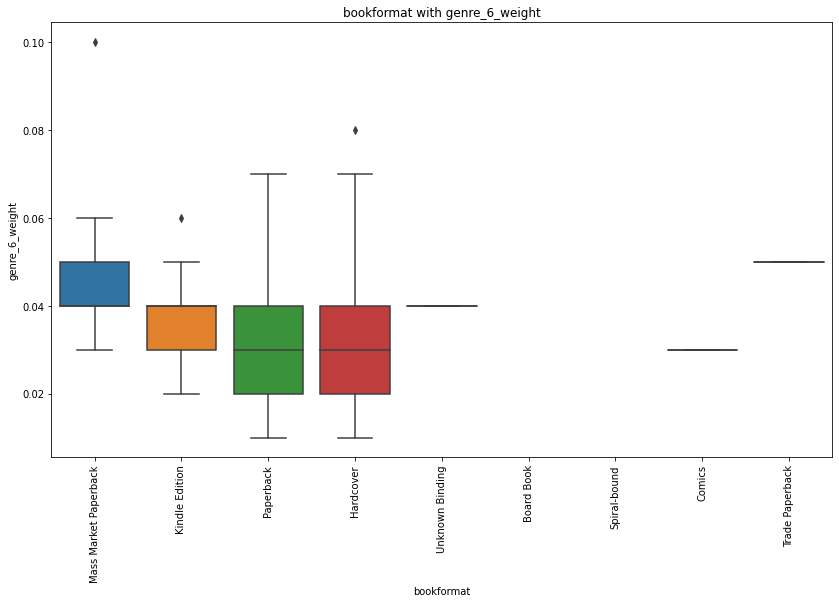

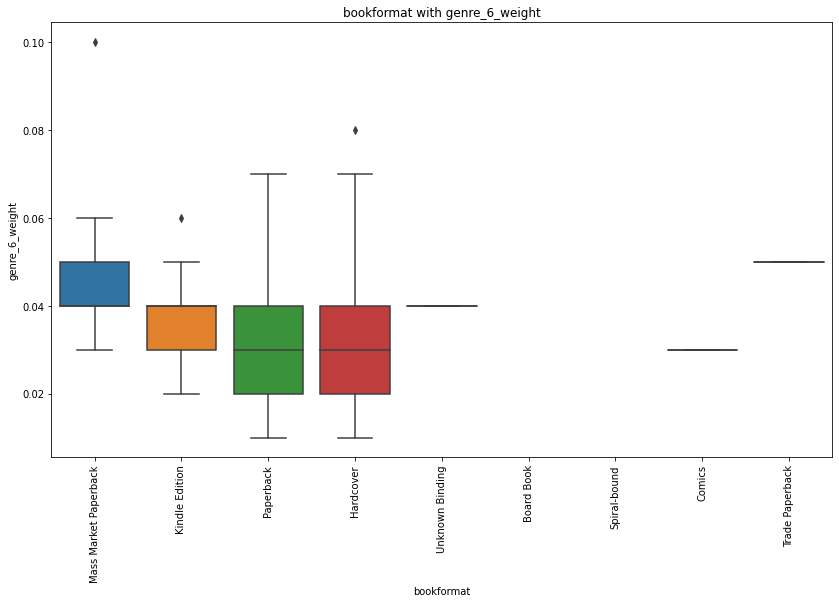

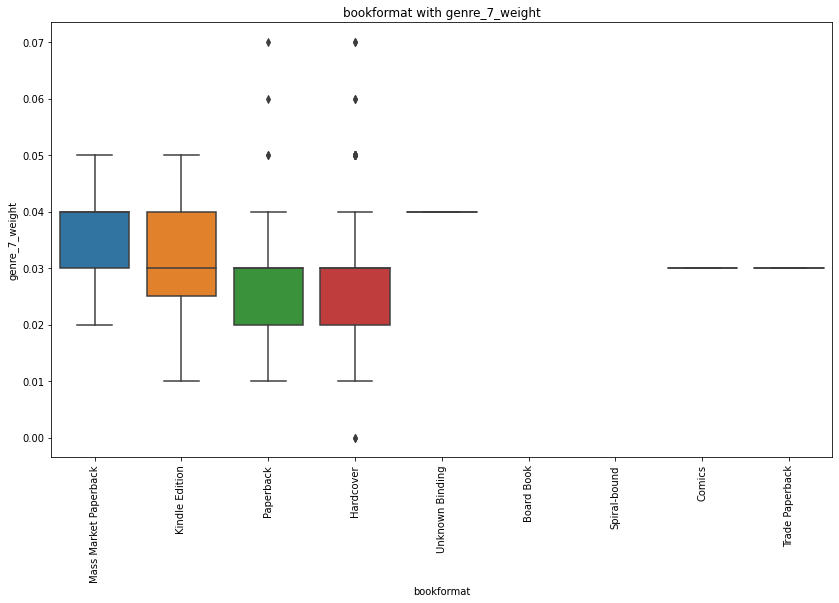

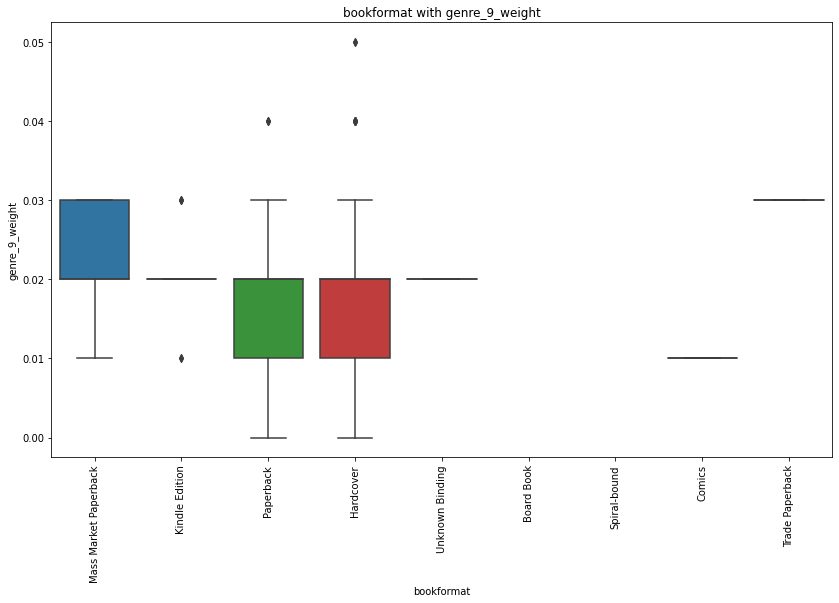

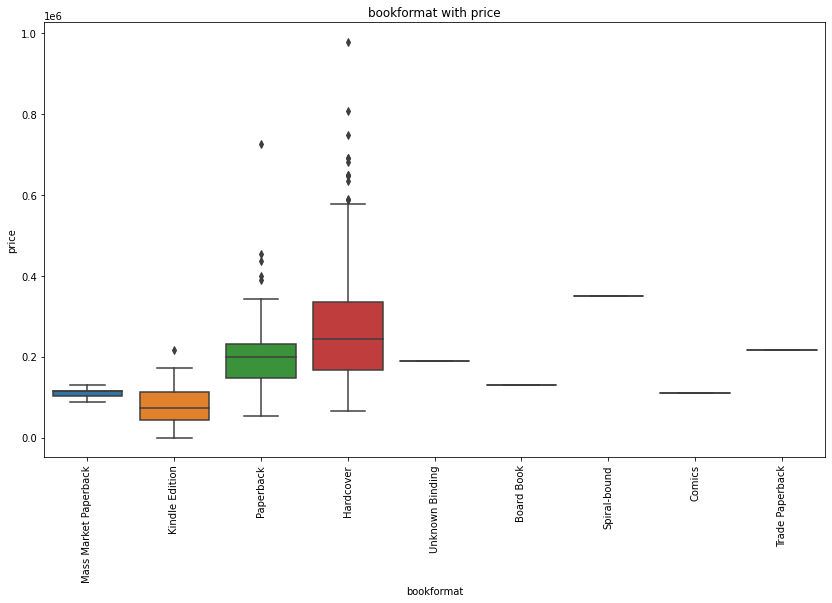

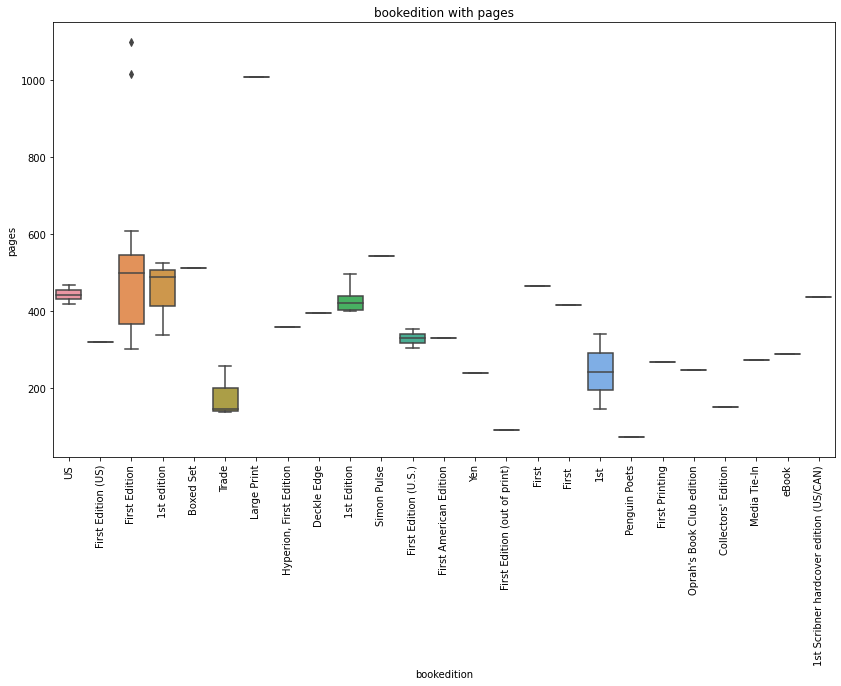

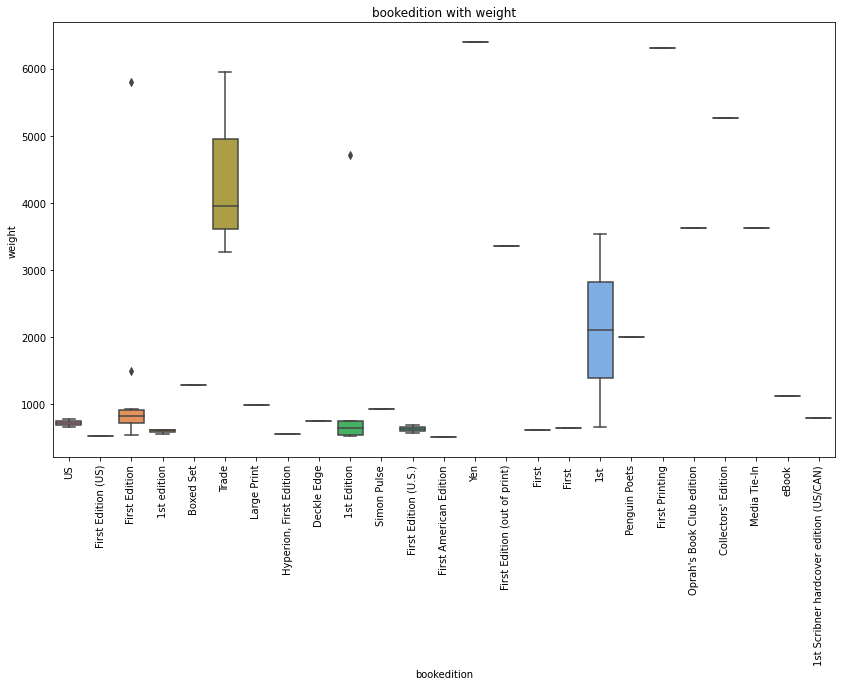

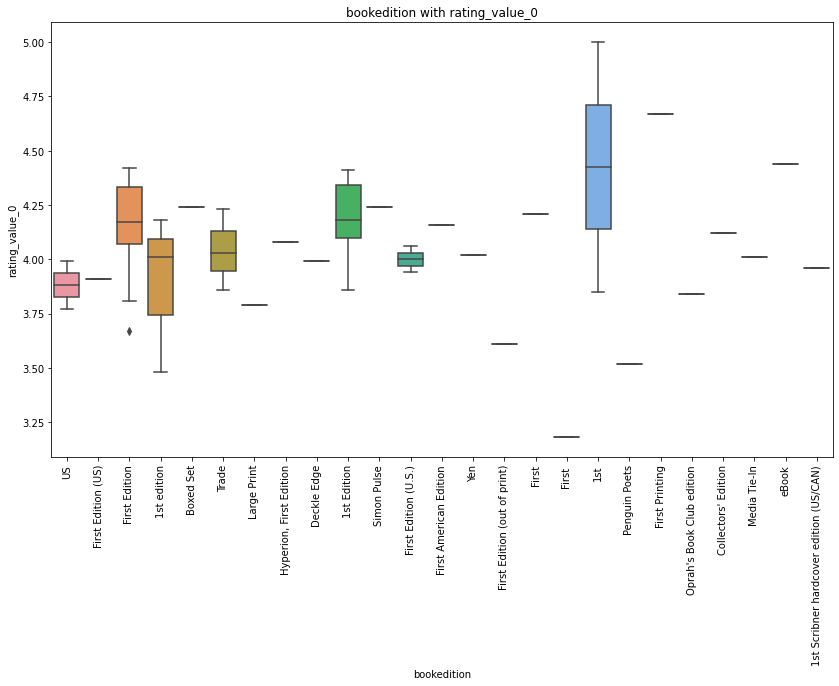

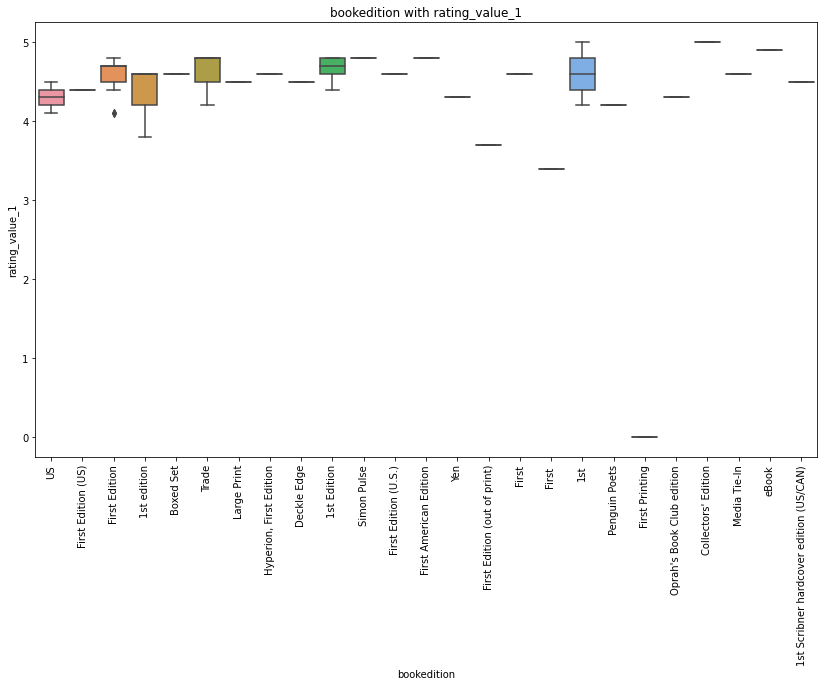

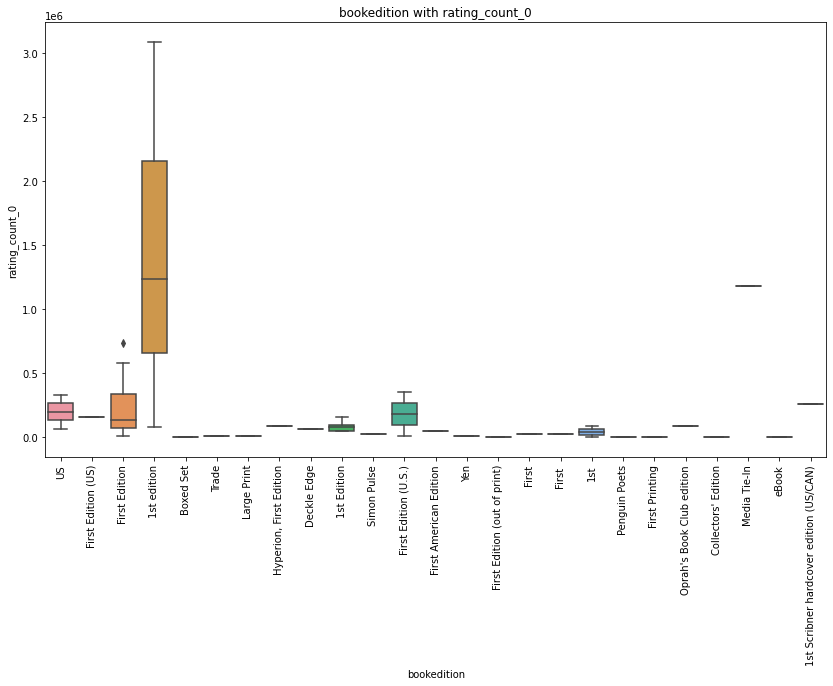

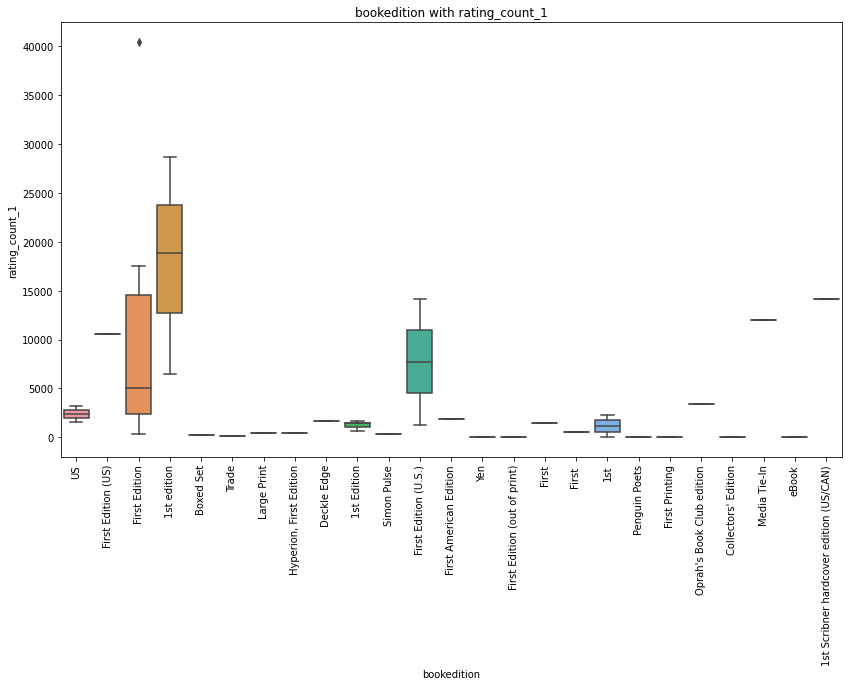

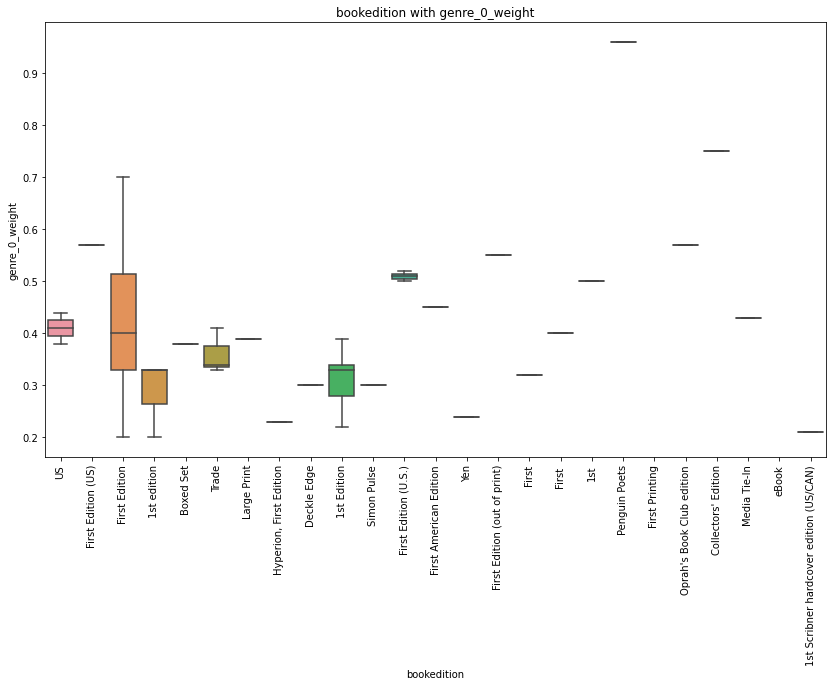

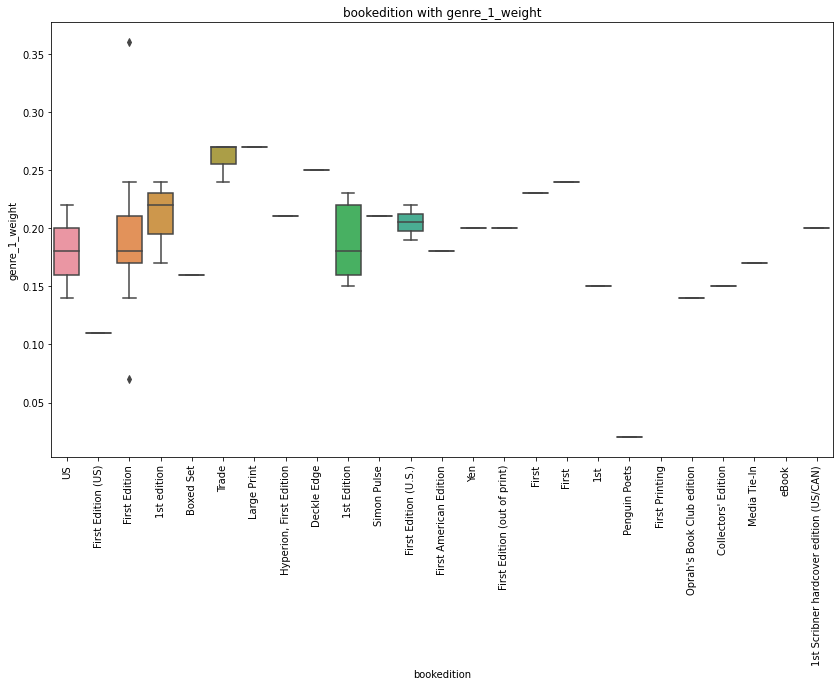

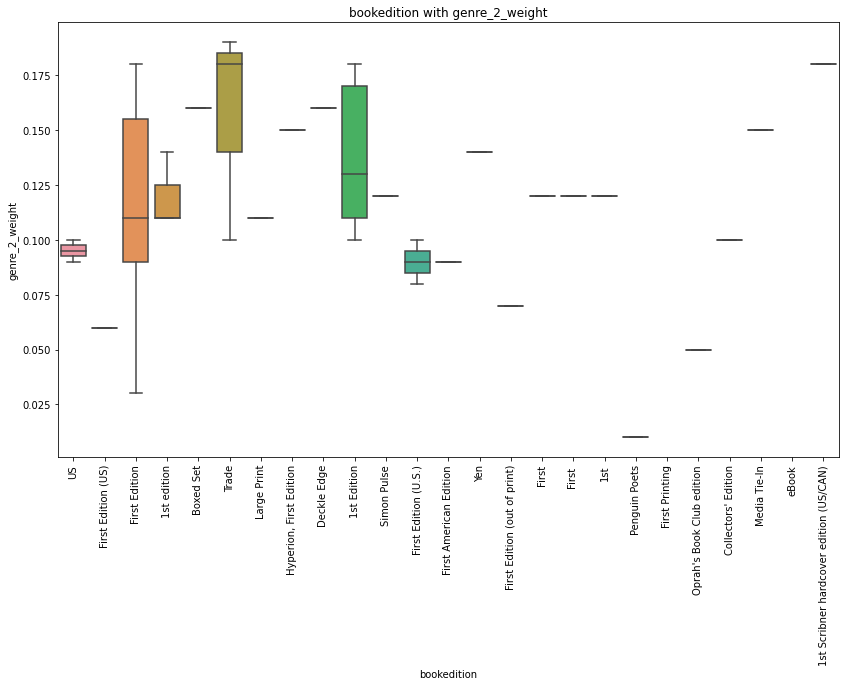

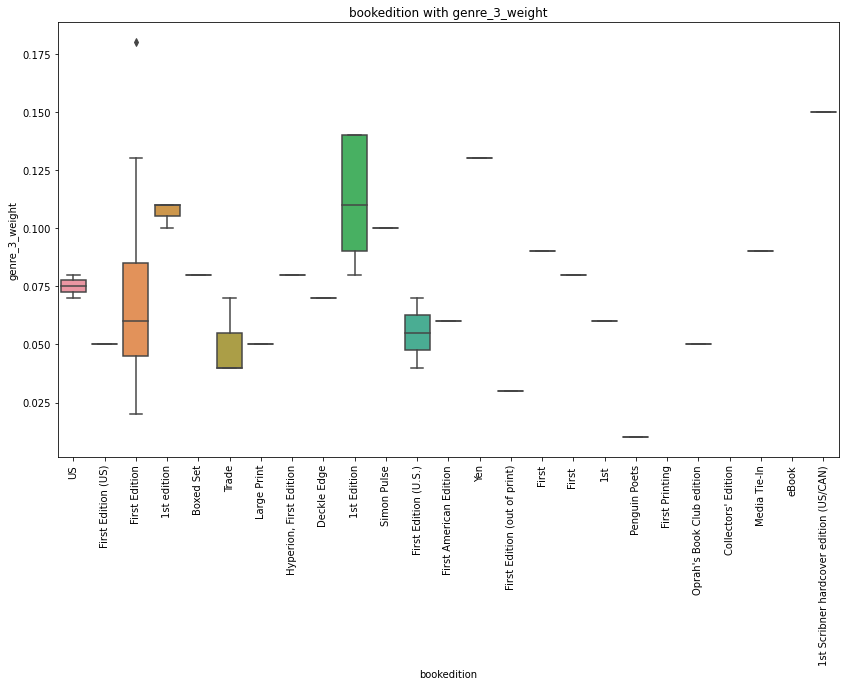

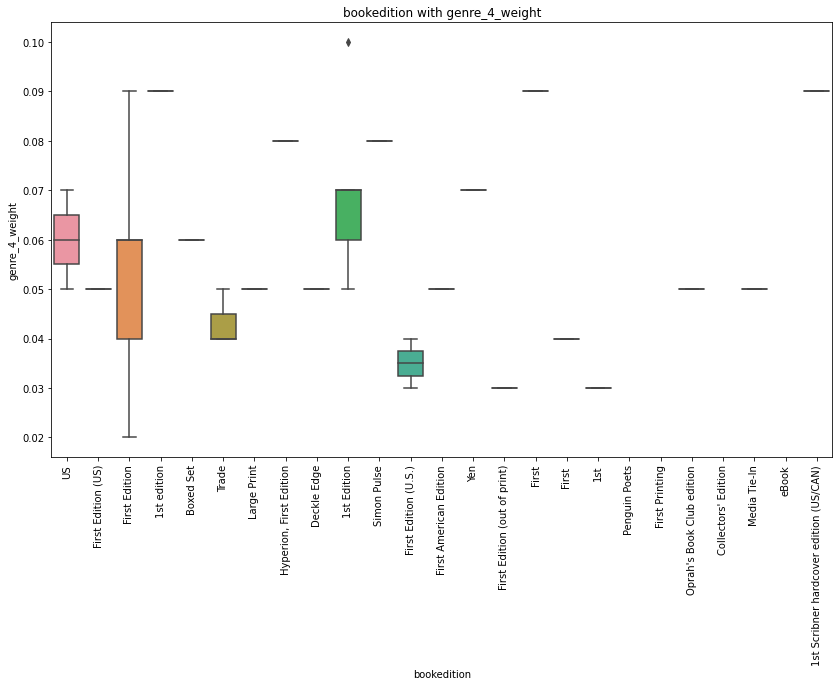

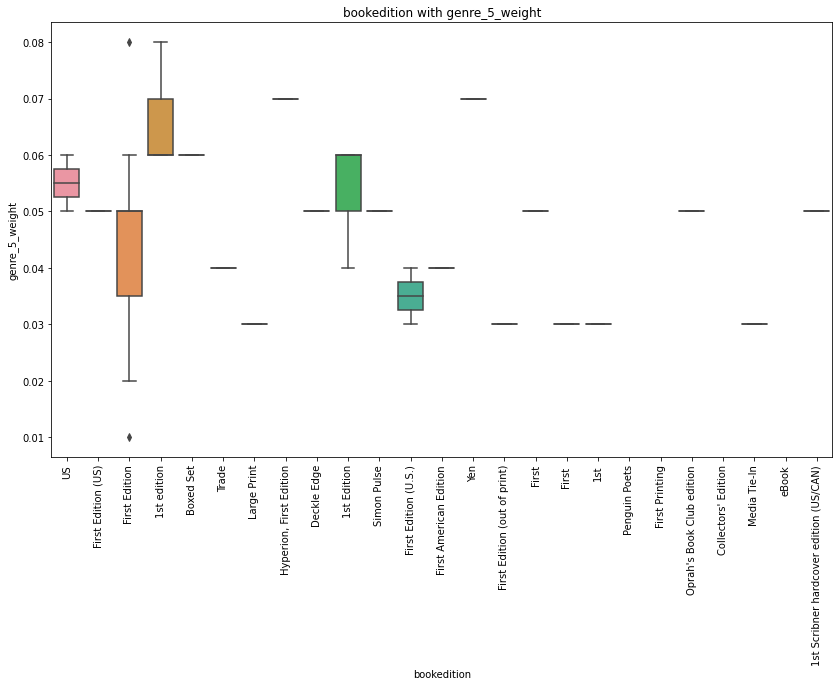

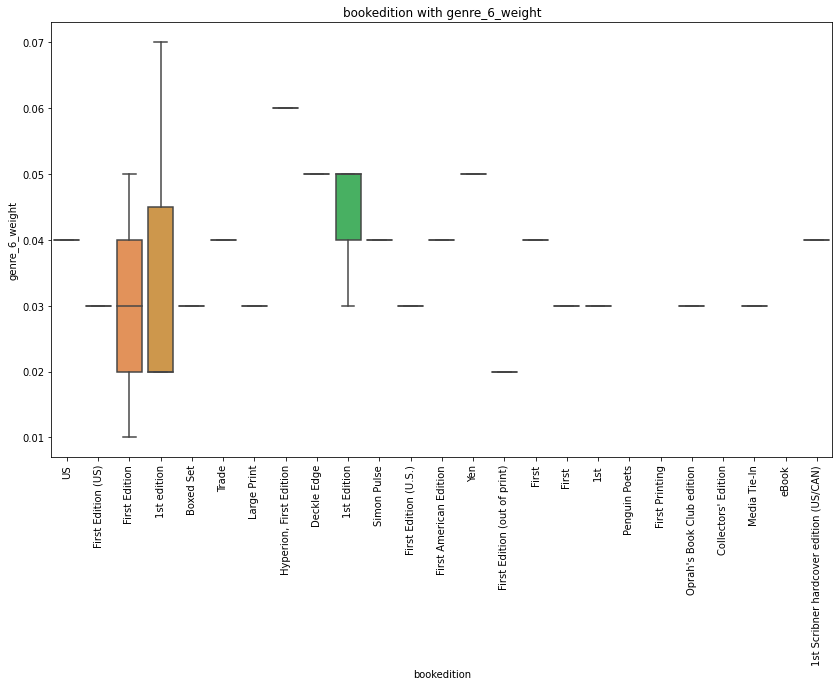

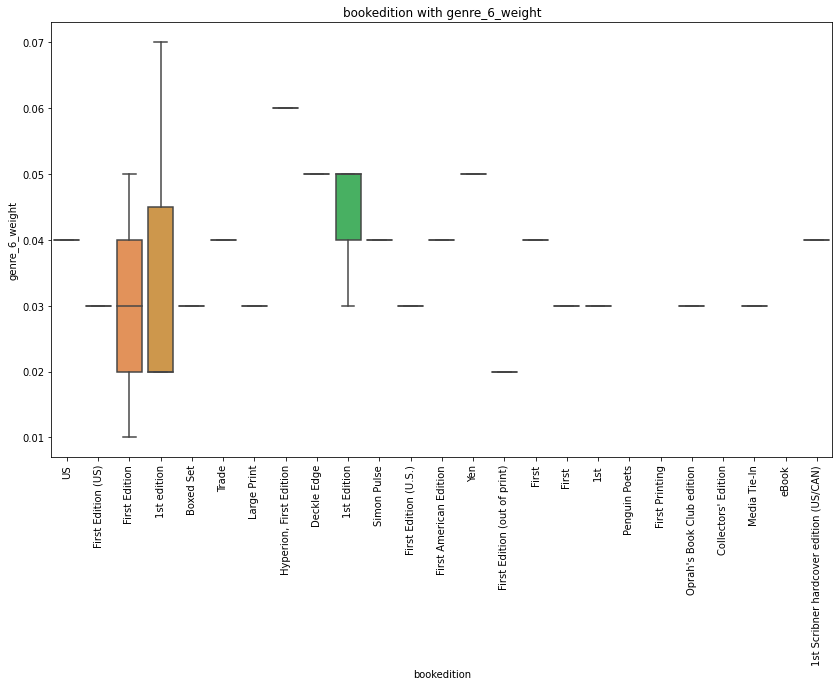

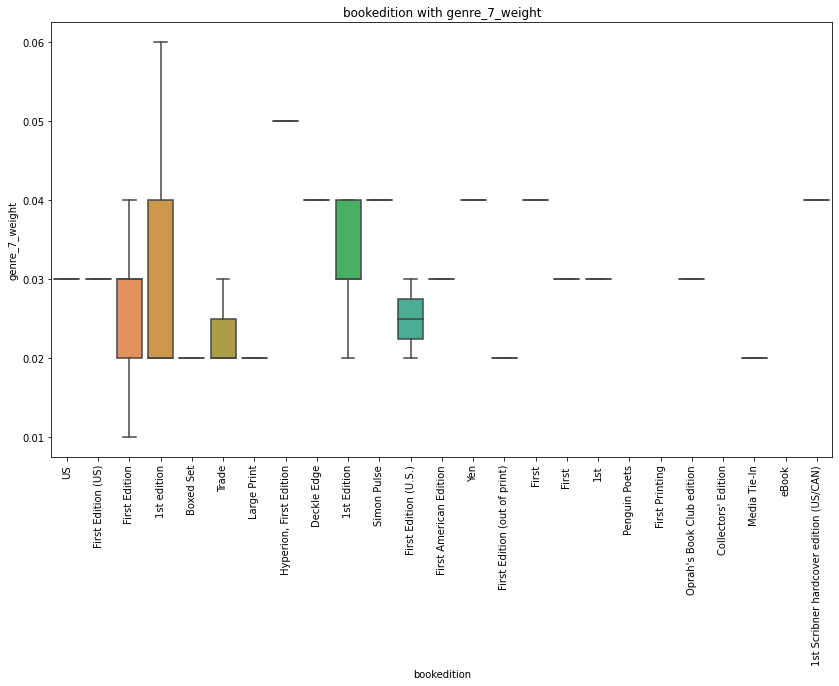

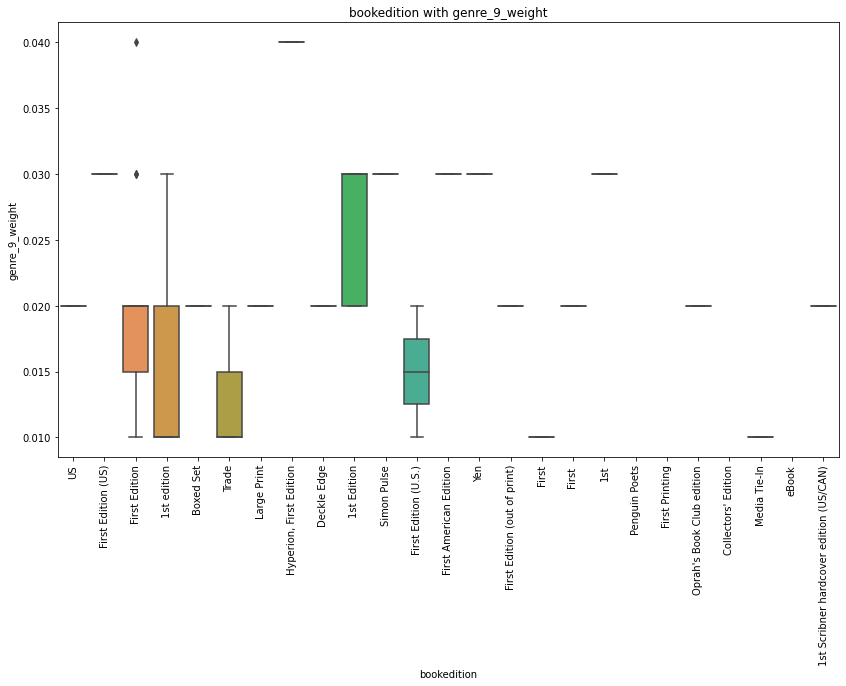

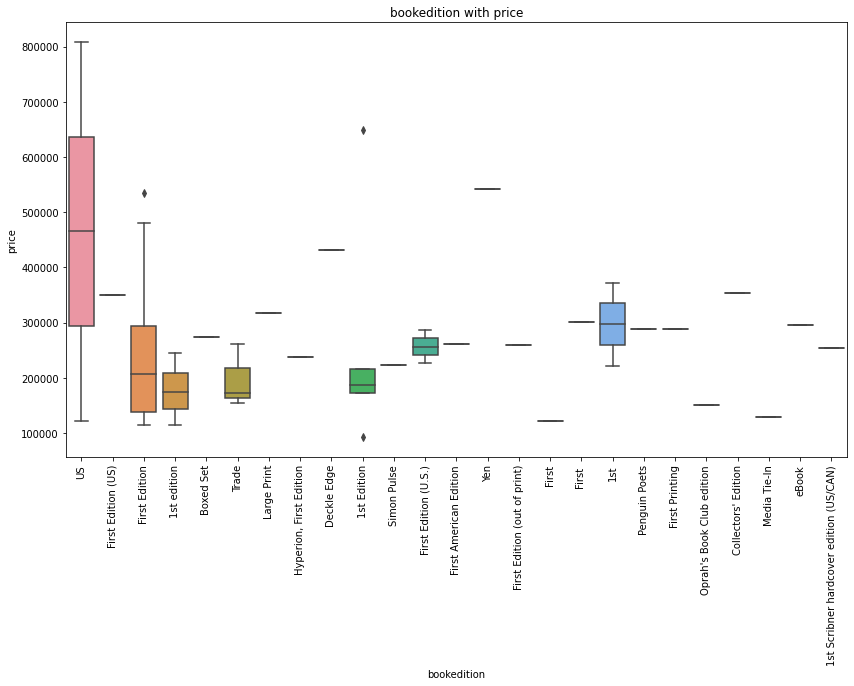

In [ ]:
for i in categorical:
    for j in numerics:
        plt.figure(figsize=(14,8))
        sns.boxplot(x = traincp[i],y = traincp[j])
        plt.title(i + " with " + j)
        plt.xticks(rotation=90)
        plt.show()

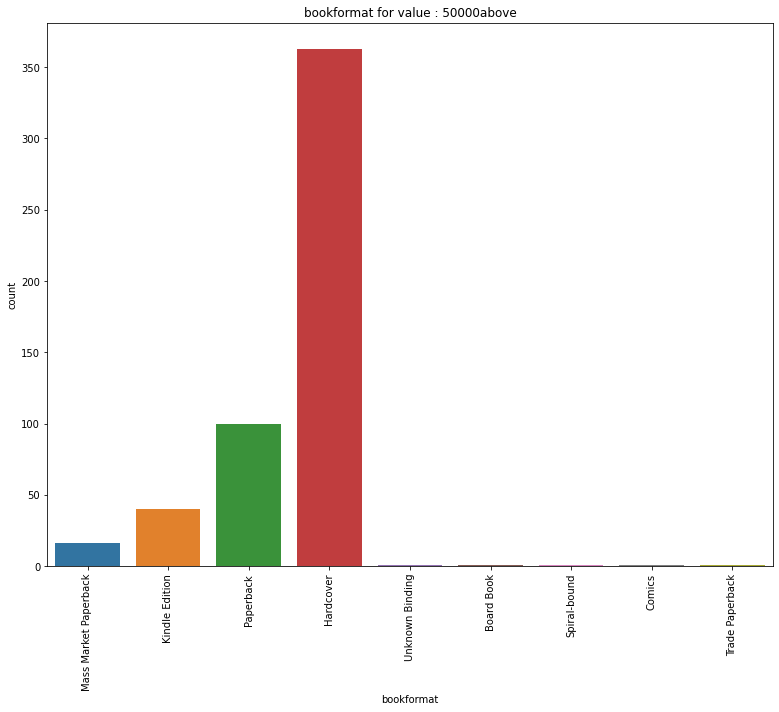

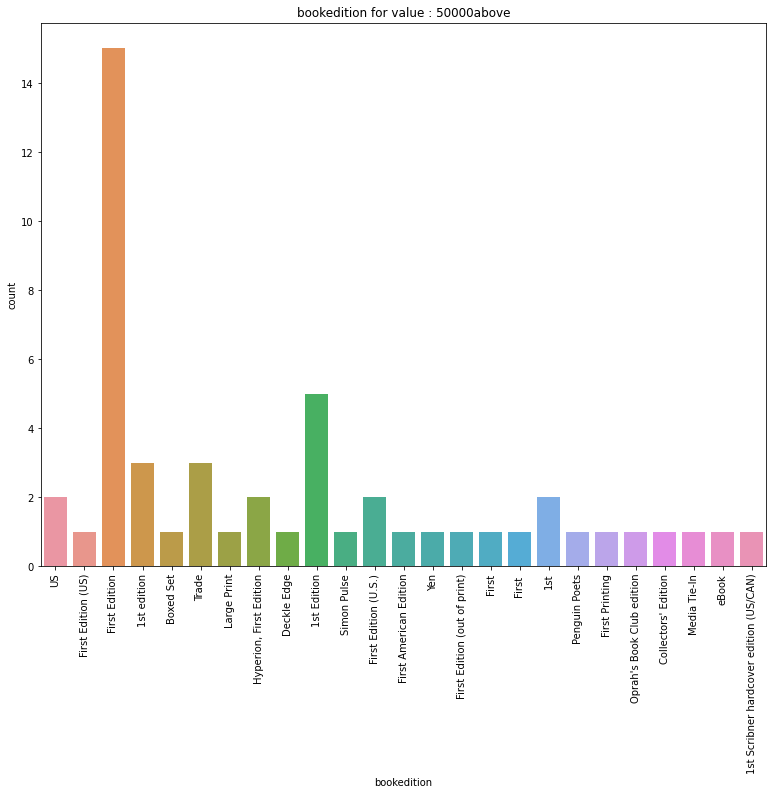

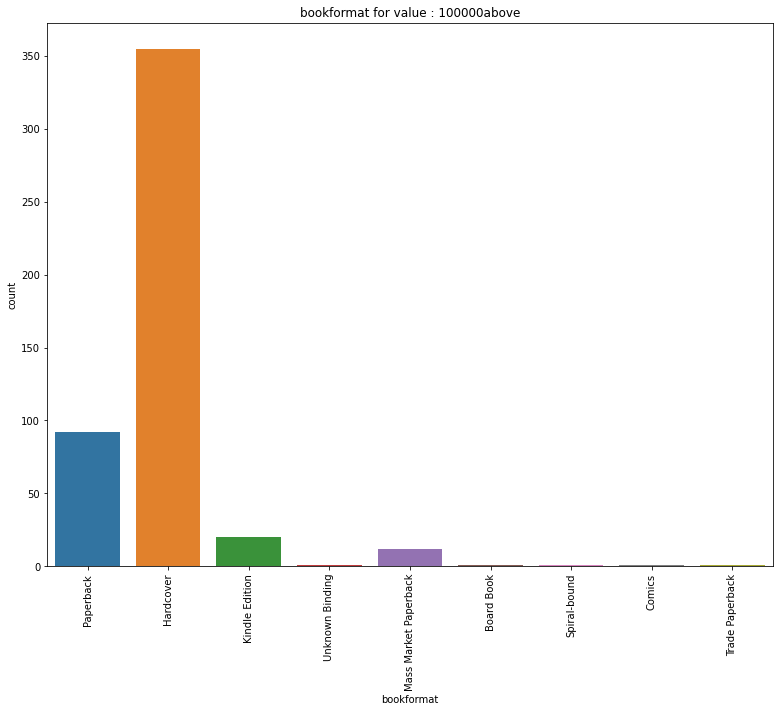

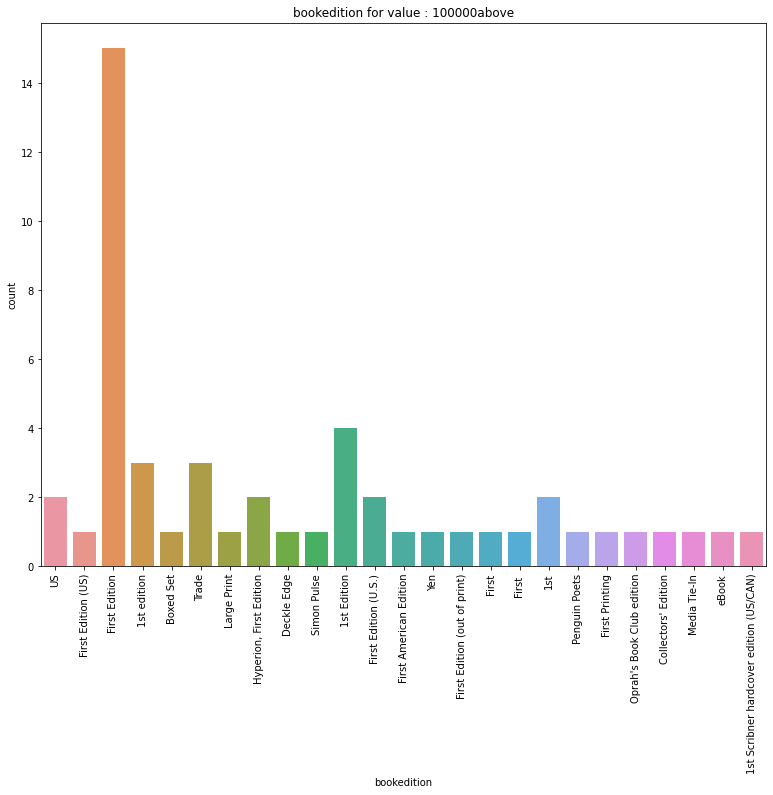

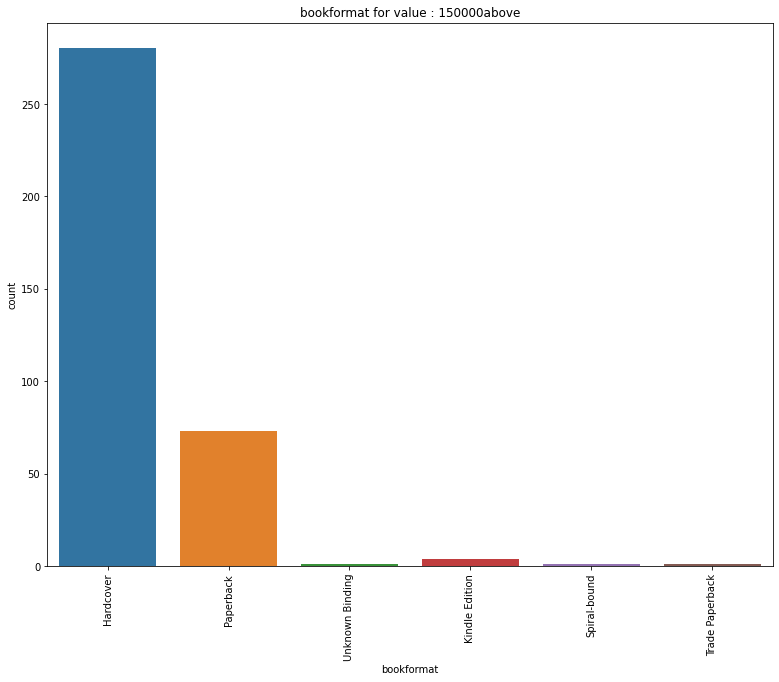

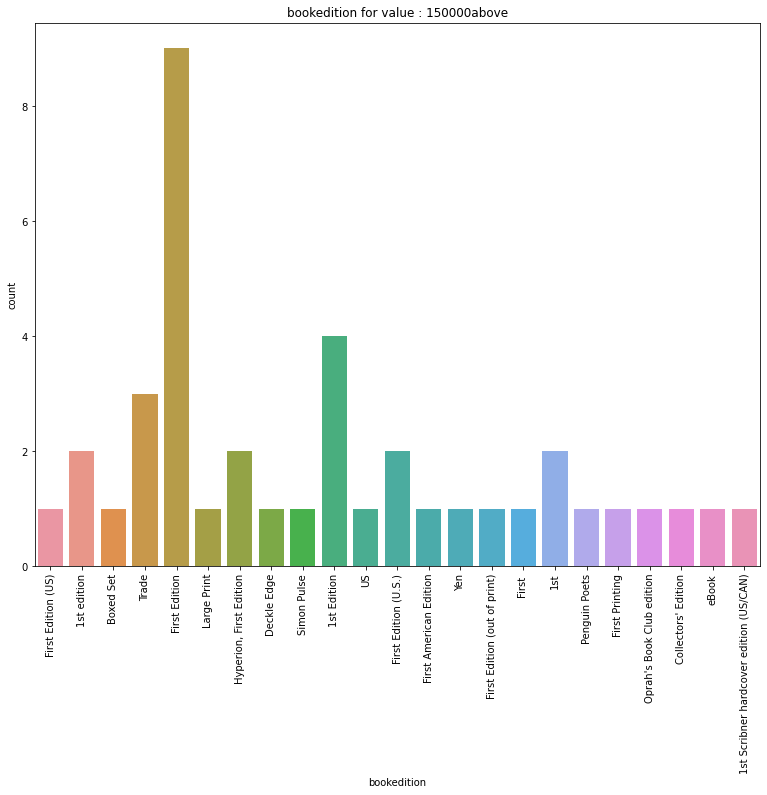

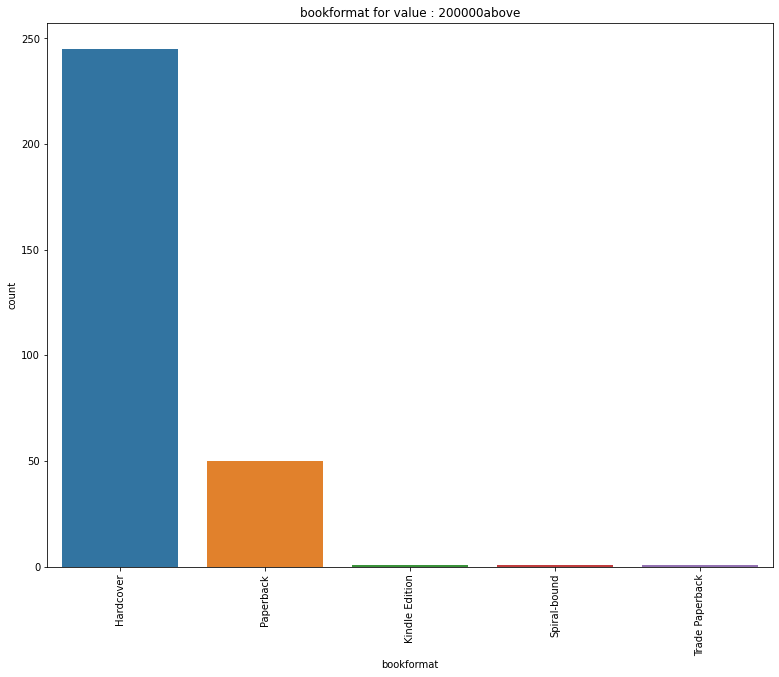

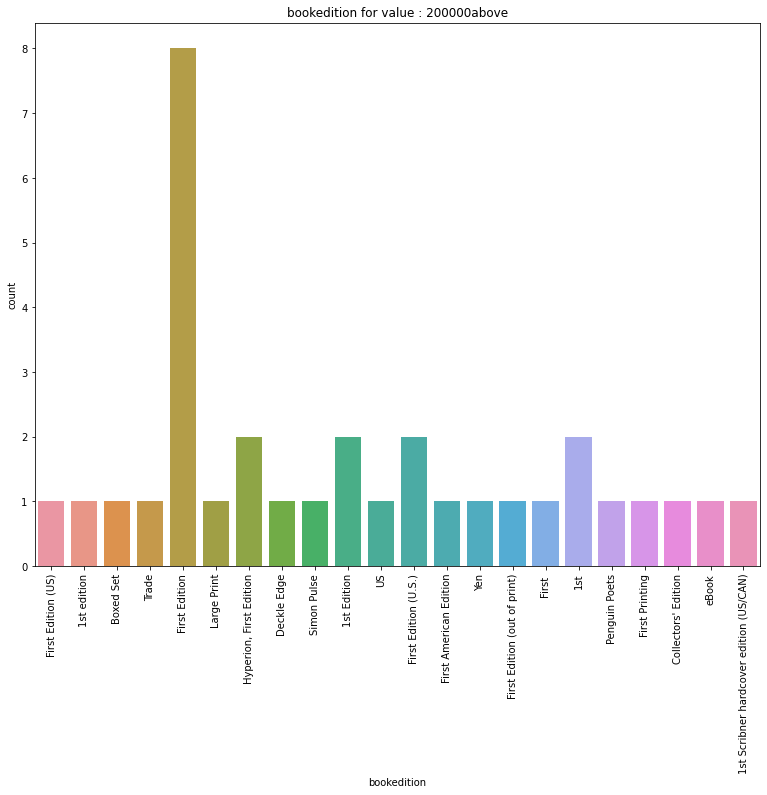

In [ ]:
val = [50000,100000,150000,200000]
for v in val:
    above = traincp[traincp["price"] > v]
    for i in categorical:
        plt.figure(figsize=(13,10))
        sns.countplot(x = above[i])
        plt.title(i + " for value : " + str(v) + "above" )
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
traincp['genre_0_weight'].unique()

array([0.26,  nan, 0.45, 0.77, 0.35, 0.34, 0.44, 0.32, 0.57, 0.33, 0.39,
       0.25, 0.48, 0.37, 0.38, 0.51, 0.41, 0.53, 1.  , 0.61, 0.29, 0.19,
       0.23, 0.36, 0.52, 0.2 , 0.21, 0.31, 0.17, 0.56, 0.43, 0.27, 0.55,
       0.76, 0.22, 0.24, 0.49, 0.54, 0.28, 0.47, 0.42, 0.4 , 0.5 , 0.62,
       0.64, 0.78, 0.6 , 0.3 , 0.46, 0.75, 0.63, 0.88, 0.95, 0.66, 0.59,
       0.65, 0.74, 0.68, 0.96, 0.86, 0.91, 0.84, 0.7 , 0.73, 0.93, 0.71])

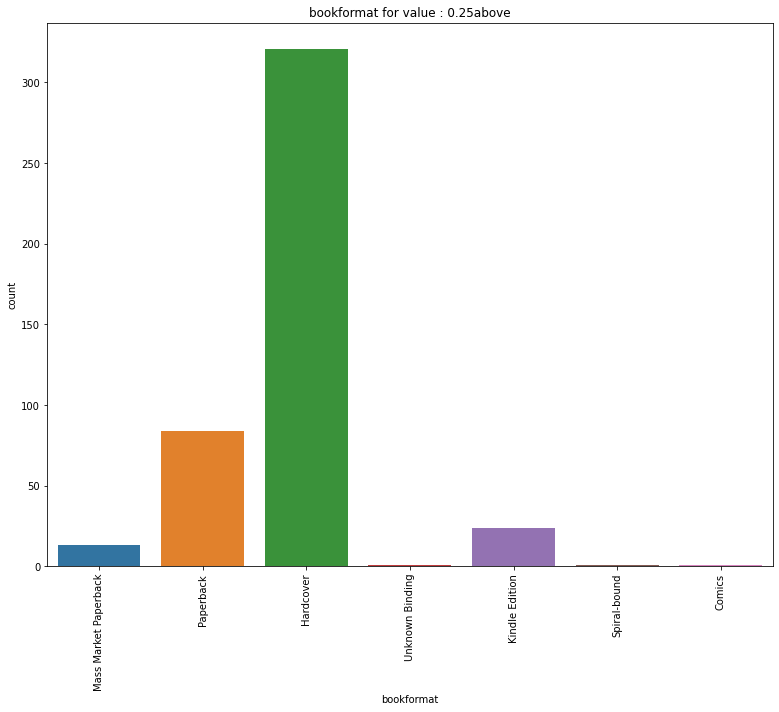

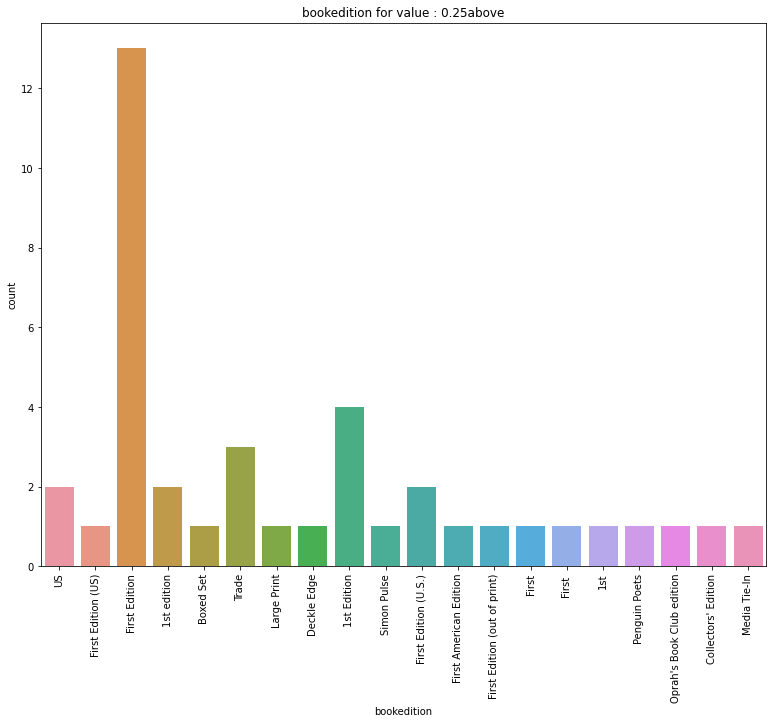

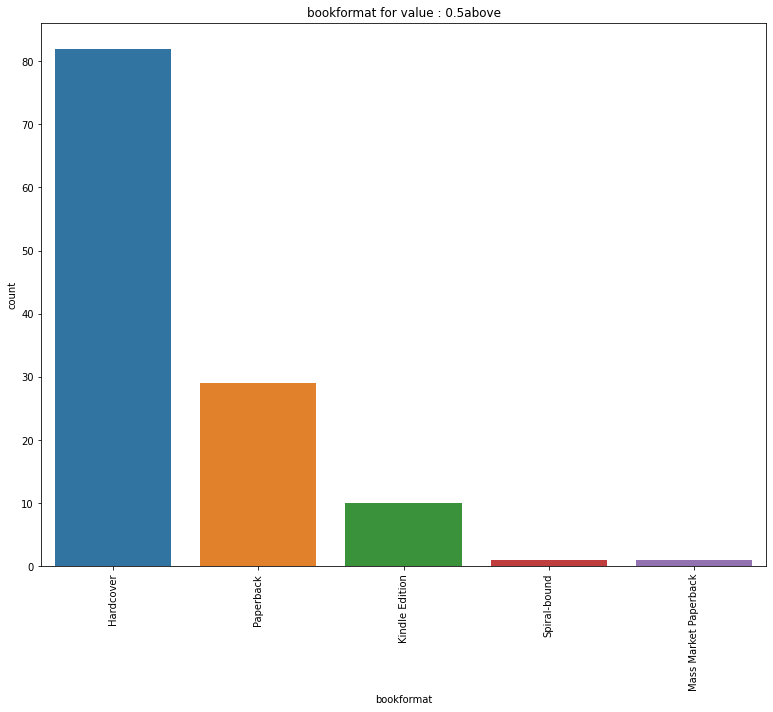

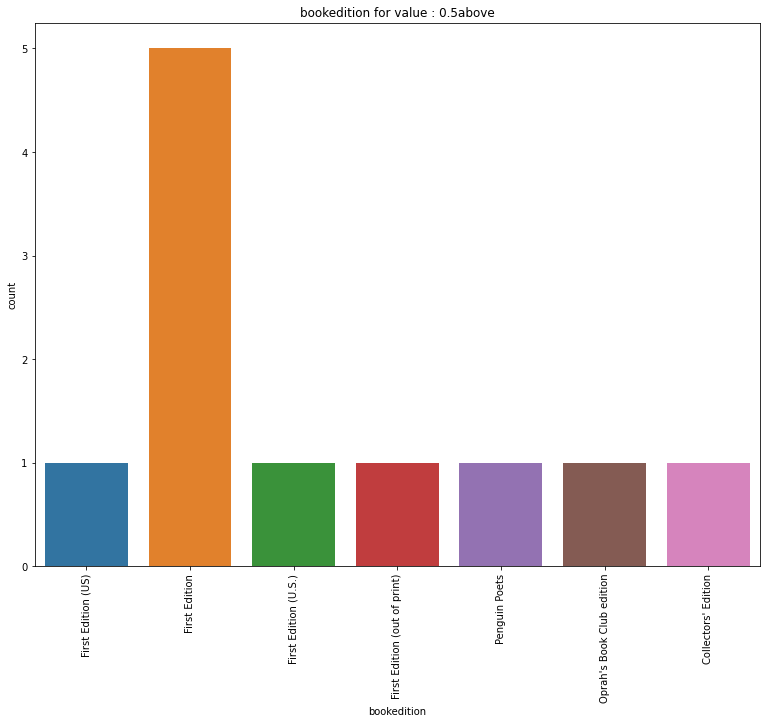

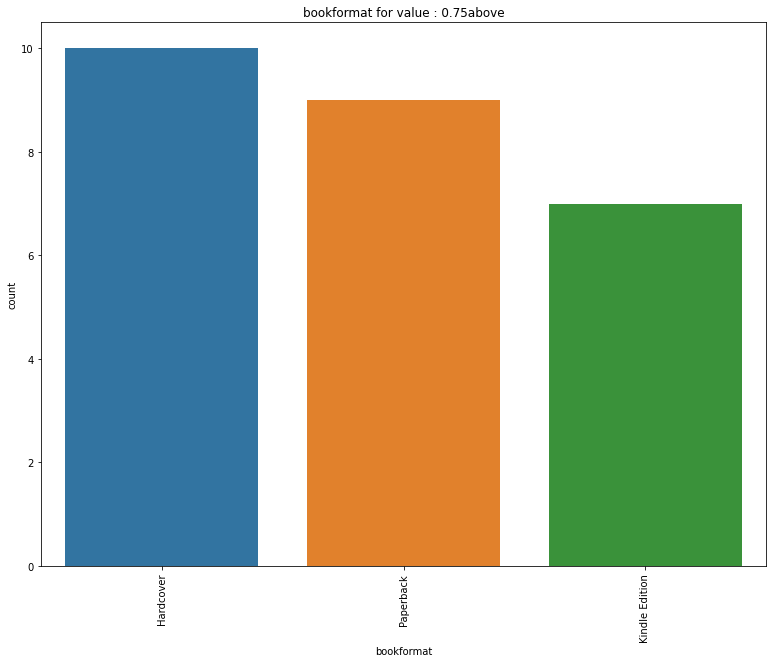

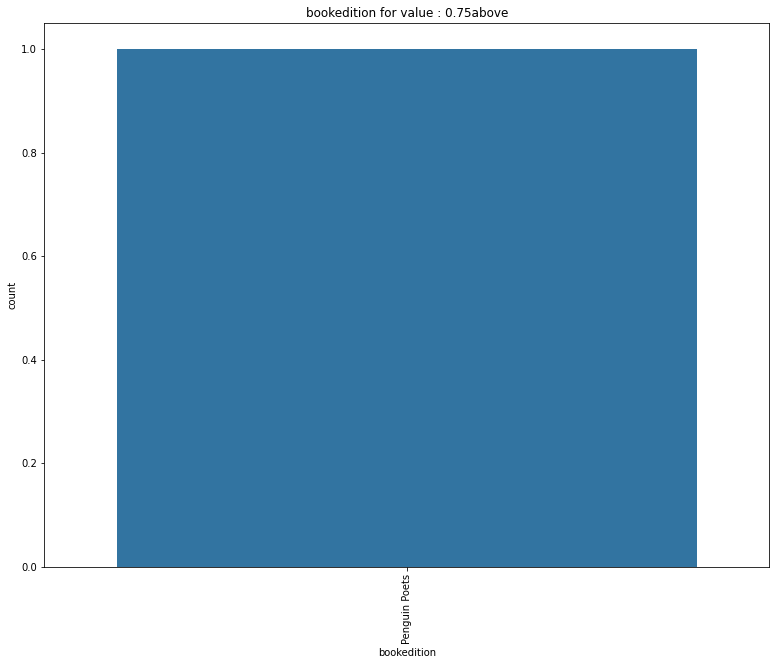

In [ ]:
val = [0.25,0.5,0.75]
for v in val:
    above = traincp[traincp["genre_0_weight"] > v]
    for i in categorical:
        plt.figure(figsize=(13,10))
        sns.countplot(x = above[i])
        plt.title(i + " for value : " + str(v) + "above" )
        plt.xticks(rotation=90)
        plt.show()